In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import chi2_contingency


#### Project Overview:
- Our aim with this project is to develop a comprehensive framework for multi-predictive modeling using various statistical and machine learning techniques. The primary objective is to build and compare multiple prediction models, each tailored to understand different aspects of the dataset. We will conduct a detailed exploratory data analysis (EDA) to uncover patterns, detect anomalies, and gain insights that will inform model development. The project seeks to enhance forecasting accuracy and provide robust decision-making tools across different scenarios through the integration of diverse modeling approaches.

#### Project Title: Predictive Analytics for Enhanced Customer Experience and Risk Management in Insurance

##### First Objective Enhanced Customer Experience:
- The purpose of this project is to determine which policyholders, based on their policy interaction history, policy details and claim history are likely to have a favorable experience.The goal is be able to make a model that can actively proactively provide individualized services.

##### Second Objective Dynamic Risk Management:
- The second objective of this project to use predictive analytics to predict total claims.
#### Third Objective : Predict Insurance Fraud;
- The reason we are doing this to see explore different insight to fraud mechanism

In [8]:
insurance_claimsdf = pd.read_csv('C:/Users/chimi/Desktop/Python Data Science Projects/insurance_claim/data/insurance_claims.csv')

In [9]:
# Shape of the dataset
insurance_claimsdf.shape

(1000, 40)

In [10]:
# Display the first few rows and summary information about the dataset
display_info = {
    'head' : insurance_claimsdf.head(),
    'info' : insurance_claimsdf.info()  
    
}
display_info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

{'head':    months_as_customer  age  policy_number policy_bind_date policy_state  \
 0                 328   48         521585       2014-10-17           OH   
 1                 228   42         342868       2006-06-27           IN   
 2                 134   29         687698       2000-09-06           OH   
 3                 256   41         227811       1990-05-25           IL   
 4                 228   44         367455       2014-06-06           IL   
 
   policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
 0    250/500               1000                1406.91               0   
 1    250/500               2000                1197.22         5000000   
 2    100/300               2000                1413.14         5000000   
 3    250/500               2000                1415.74         6000000   
 4   500/1000               1000                1583.91         6000000   
 
    insured_zip  ... police_report_available total_claim_amount injury_claim  \
 0

In [11]:
# Columns of the dataframe
insurance_claimsdf.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

In [12]:
# Looking at number of unique policies
# All the policies are unique.
# Trying to see if they were any duplicate policies
insurance_claimsdf['policy_number'].nunique()

1000

In [13]:
# Check for duplicates

duplicate_rows = insurance_claimsdf.duplicated().sum()

duplicate_rows

0

In [14]:
# Check for missing values
insurance_claimsdf.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted            91
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [15]:
# Check for missing values in each column
missing_values = insurance_claimsdf.isnull().sum()

missing_values[missing_values > 0]


authorities_contacted      91
_c39                     1000
dtype: int64

In [16]:
# The only column that has missing value is c39-all the 1000 rows are missing in this column
# Drop the column
insurance_claimsdf.drop('_c39', axis=1, inplace=True)

In [17]:
# Data Type correction
insurance_claimsdf['policy_bind_date'] = pd.to_datetime(insurance_claimsdf['policy_bind_date'])
insurance_claimsdf['incident_date'] = pd.to_datetime(insurance_claimsdf['incident_date'])


In [18]:
# Check to see if the categorical variables are correctly identified as categorical datatypes
insurance_claimsdf['insured_zip'] = insurance_claimsdf['insured_zip'].astype(str)
insurance_claimsdf['auto_year'] = insurance_claimsdf['auto_year'].astype(str)

insurance_claimsdf[['insured_zip','auto_year']].dtypes

insured_zip    object
auto_year      object
dtype: object

### EDA

In [19]:
# Summary statistics 
summary_statistics_no_datetime = insurance_claimsdf.describe(include='all')

# Display the revised summary statistics
summary_statistics_no_datetime

months_as_customer          age  policy_number  \
count          1000.000000  1000.000000    1000.000000   
unique                 NaN          NaN            NaN   
top                    NaN          NaN            NaN   
freq                   NaN          NaN            NaN   
mean            203.954000    38.948000  546238.648000   
min               0.000000    19.000000  100804.000000   
25%             115.750000    32.000000  335980.250000   
50%             199.500000    38.000000  533135.000000   
75%             276.250000    44.000000  759099.750000   
max             479.000000    64.000000  999435.000000   
std             115.113174     9.140287  257063.005276   

                     policy_bind_date policy_state policy_csl  \
count                            1000         1000       1000   
unique                            NaN            3          3   
top                               NaN           OH    250/500   
freq                              NaN          352        351   
mean    2002-02-08 04:40:47.999999872          NaN        NaN   
min               1990-01-08 00:00:00          NaN        NaN   
25%               1995-09-19 00:00:00          NaN        NaN   
50%               2002-04-01 12:00:00          NaN        NaN   
75%               2008-04-21 12:00:00          NaN        NaN   
max               2015-02-22 00:00:00          NaN        NaN   
std                               NaN          NaN        NaN   

        policy_deductable  policy_annual_premium  umbrella_limit insured_zip  \
count         1000.000000            1000.000000    1.000000e+03        1000   
unique                NaN                    NaN             NaN         995   
top                   NaN                    NaN             NaN      477695   
freq                  NaN                    NaN             NaN           2   
mean          1136.000000            1256.406150    1.101000e+06         NaN   
min            500.000000             433.330000   -1.000000e+06         NaN   
25%            500.000000            1089.607500    0.000000e+00         NaN   
50%           1000.000000            1257.200000    0.000000e+00         NaN   
75%           2000.000000            1415.695000    0.000000e+00         NaN   
max           2000.000000            2047.590000    1.000000e+07         NaN   
std            611.864673             244.167395    2.297407e+06         NaN   

        ...    witnesses police_report_available total_claim_amount  \
count   ...  1000.000000                    1000         1000.00000   
unique  ...          NaN                       3                NaN   
top     ...          NaN                       ?                NaN   
freq    ...          NaN                     343                NaN   
mean    ...     1.487000                     NaN        52761.94000   
min     ...     0.000000                     NaN          100.00000   
25%     ...     1.000000                     NaN        41812.50000   
50%     ...     1.000000                     NaN        58055.00000   
75%     ...     2.000000                     NaN        70592.50000   
max     ...     3.000000                     NaN       114920.00000   
std     ...     1.111335                     NaN        26401.53319   

        injury_claim property_claim  vehicle_claim  auto_make auto_model  \
count    1000.000000    1000.000000    1000.000000       1000       1000   
unique           NaN            NaN            NaN         14         39   
top              NaN            NaN            NaN       Saab        RAM   
freq             NaN            NaN            NaN         80         43   
mean     7433.420000    7399.570000   37928.950000        NaN        NaN   
min         0.000000       0.000000      70.000000        NaN        NaN   
25%      4295.000000    4445.000000   30292.500000        NaN        NaN   
50%      6775.000000    6750.000000   42100.000000        NaN        NaN   
75%     11305.000000   10885.000

### EDA Summary for Customers:

- Insured Sex: The gender distribution of policyholders indicates a balance representation that might impact risk assessments and preferences.
- Insured Education Level: The diverse educational backgrounds of policyholders give us insight into individual risk profiles and insurance needs.
- Occupation: The wide spectrum of professions are represented among PolicyHolders, giving us a glimpse into variety of requirements and risk exposure related to their line of work.
- Hobbies: The hobbies of insured individuals vary, with some indicating high risks, and it could influence frequencies and amounts.
- Insured_relationship:
- policy_state : The policy holders are geographically concentrated in the Midwest-Region of the United States.

C:\Users\chimi\AppData\Local\Temp\ipykernel_4288\2428241341.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=insurance_claimsdf, x=var, ax=axes[i], order=order, palette='viridis')
C:\Users\chimi\AppData\Local\Temp\ipykernel_4288\2428241341.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=insurance_claimsdf, x=var, ax=axes[i], order=order, palette='viridis')
C:\Users\chimi\AppData\Local\Temp\ipykernel_4288\2428241341.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=insurance_claimsdf, x=var, ax=axes[i], order=

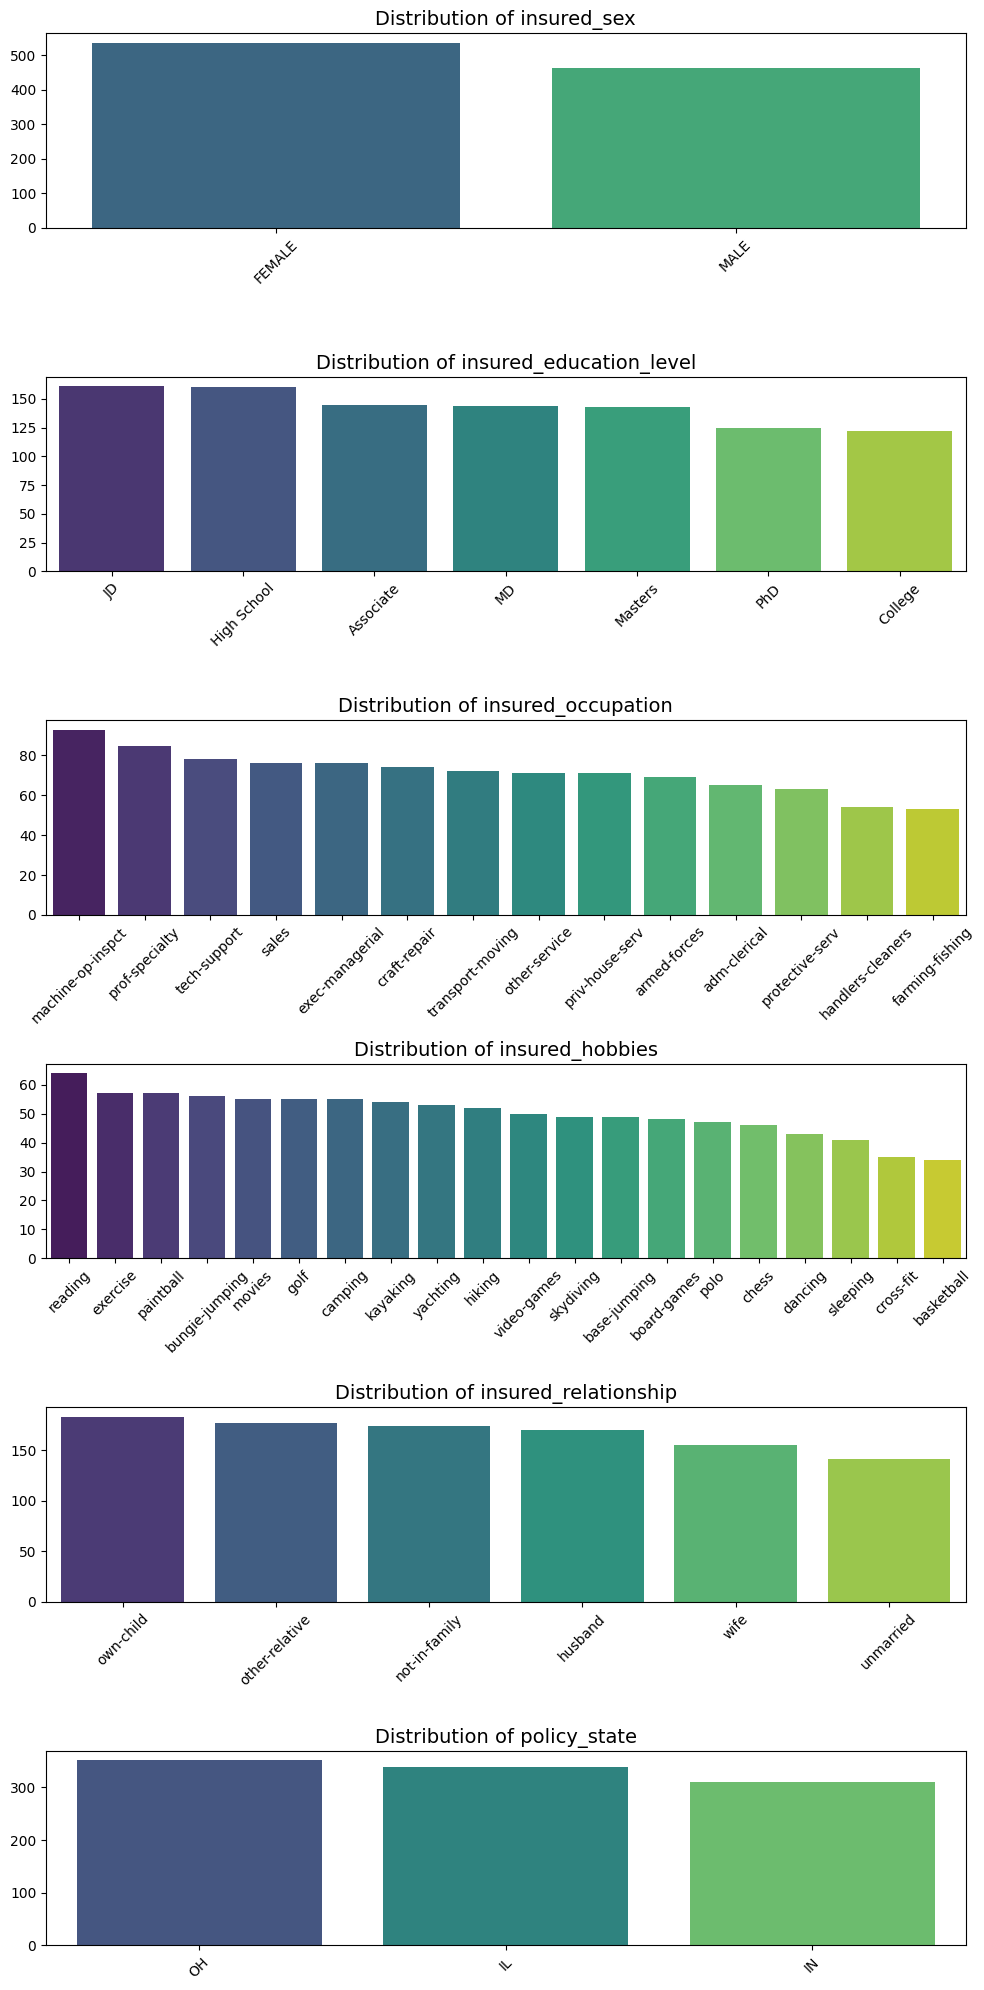

In [20]:
# Understanding the Customer profile distribution

demographic_variables = ['insured_sex', 'insured_education_level', 'insured_occupation', 'insured_hobbies', 'insured_relationship', 'policy_state']


#Plotting the distribution for demographic categorical variables
fig, axes = plt.subplots(nrows=len(demographic_variables), ncols=1, figsize=(10,20))


for i, var in enumerate(demographic_variables):
    order = insurance_claimsdf[var].value_counts().index
    sns.countplot(data=insurance_claimsdf, x=var, ax=axes[i], order=order, palette='viridis')
    axes[i].set_title(f'Distribution of {var}', fontsize=14)
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

plt.tight_layout()

#### EDA Summary for Median Age of policies


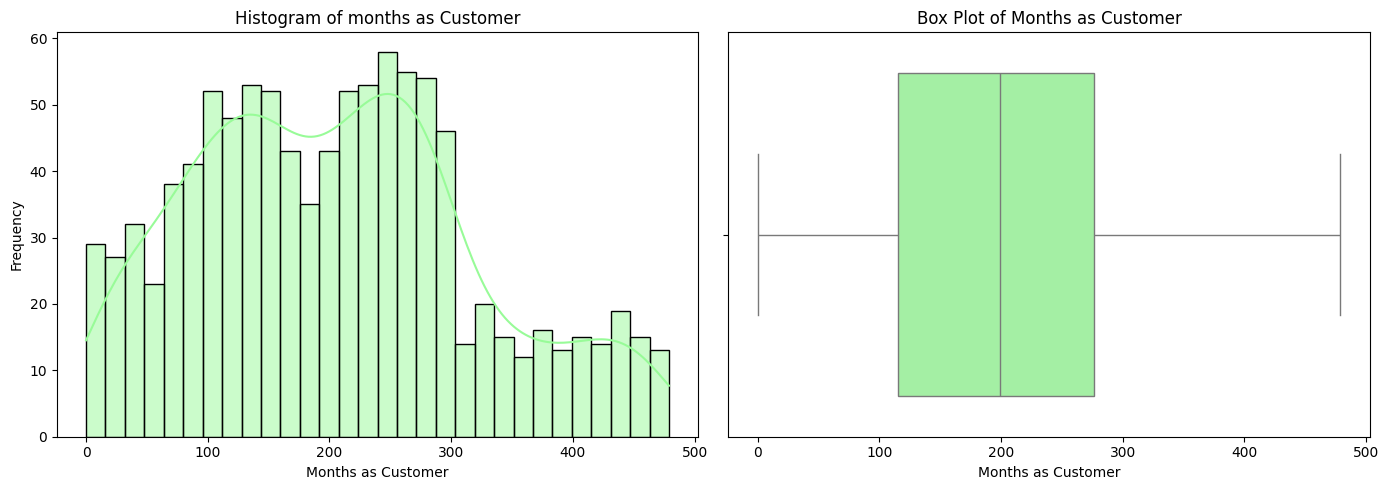

In [21]:
# Understanding median age of the policies

mint_green_color = '#98FB98'



# Create a figure to hold the plots
fig, ax = plt.subplots(1, 2 , figsize=(14,5))

# Histogram for 'month_as_customer'

sns.histplot(insurance_claimsdf['months_as_customer'], bins=30, kde=True, ax=ax[0], color=mint_green_color )
ax[0].set_title('Histogram of months as Customer')
ax[0].set_xlabel('Months as Customer')
ax[0].set_ylabel('Frequency')


# Boxplot for 'months_as_customer'
sns.boxplot(x=insurance_claimsdf['months_as_customer'], ax=ax[1], color=mint_green_color )
ax[1].set_title('Box Plot of Months as Customer')
ax[1].set_xlabel('Months as Customer')

plt.tight_layout()
plt.show()

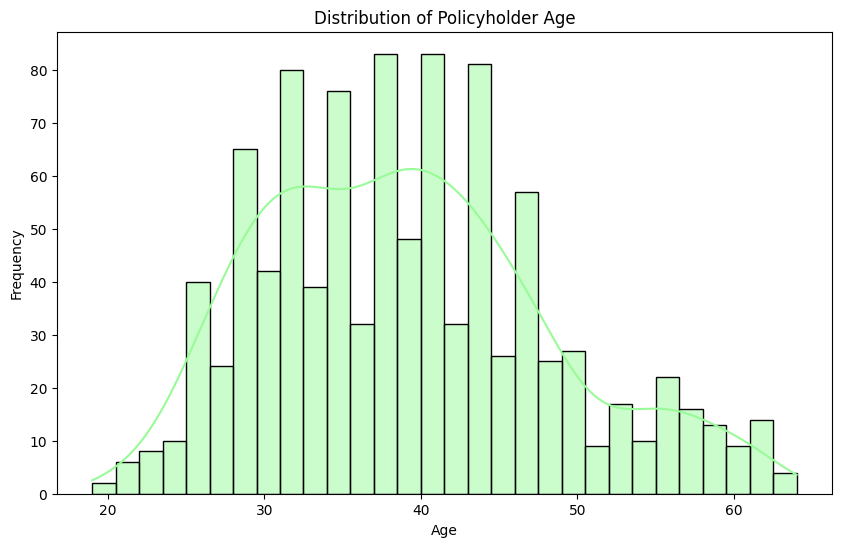

In [22]:
# Understanding the Customer Age

# Age distribution
plt.figure(figsize=(10, 6))
sns.histplot(insurance_claimsdf['age'], bins=30, kde=True, color=mint_green_color )
plt.title('Distribution of Policyholder Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()





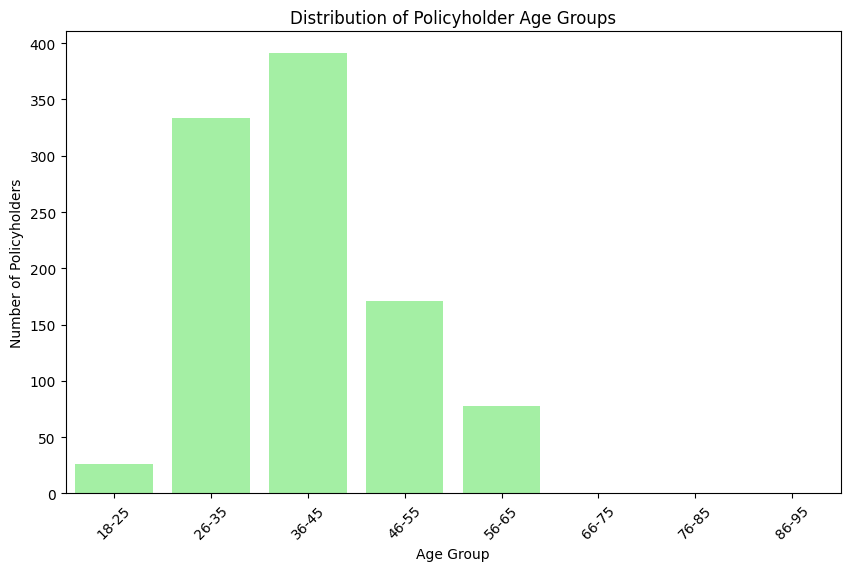

In [23]:
# Define age bins and labels for the categorization
bins = [18, 25, 35, 45, 55, 65, 75, 85, 95]
labels = ['18-25', '26-35', '36-45', '46-55', '56-65', '66-75', '76-85', '86-95']

# Categorize the ages
insurance_claimsdf['age_group'] = pd.cut(insurance_claimsdf['age'], bins=bins, labels=labels, right=False)

# Plotting the distribution of age groups
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='age_group', data=insurance_claimsdf, color='#98FB98')
ax.set_title('Distribution of Policyholder Age Groups')
ax.set_xlabel('Age Group')
ax.set_ylabel('Number of Policyholders')
plt.xticks(rotation=45)
plt.show()


####  Observations:
- Histogram and KDE of 'months_as_customer' - The graph illustrates the most of the policy holders have been with the company for 200-300 years.
- Histogram and KDE of 'age': Most of the policy holders are between the age of 30 to 45.
- Distribution of PolicyHolder Age Groups: Most of the policy hodler range between the age of 25-45.


#### Policy Details Distribution:


In [24]:
# Policy Trends Over the Years
insurance_claimsdf['Policy_Year'] = insurance_claimsdf['policy_bind_date'].dt.year
policies_per_year = insurance_claimsdf.groupby('Policy_Year').size()

In [25]:
# POlicy Trends over the season
insurance_claimsdf['Policy_Month'] = insurance_claimsdf['policy_bind_date'].dt.month
policies_per_month = insurance_claimsdf.groupby('Policy_Month').size()



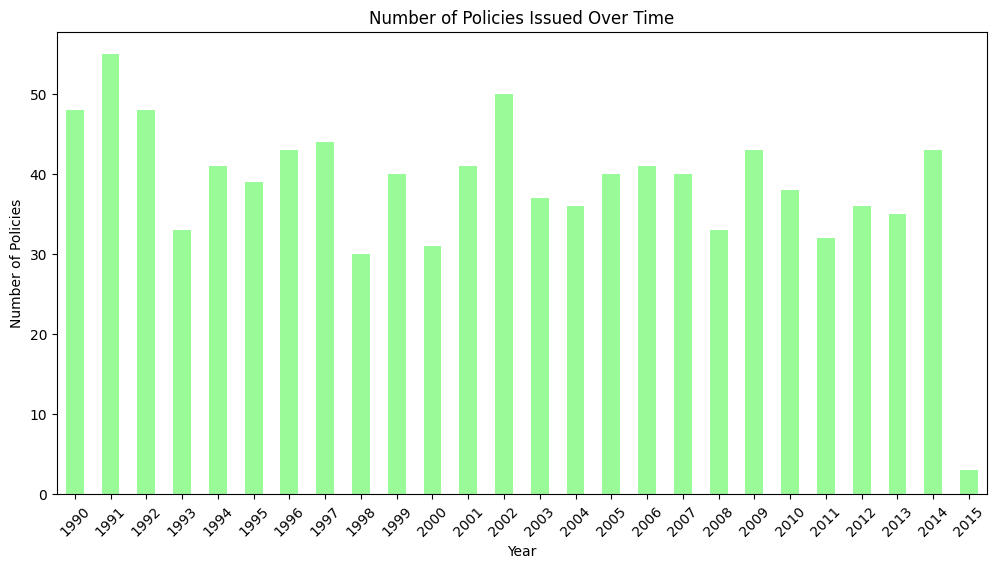

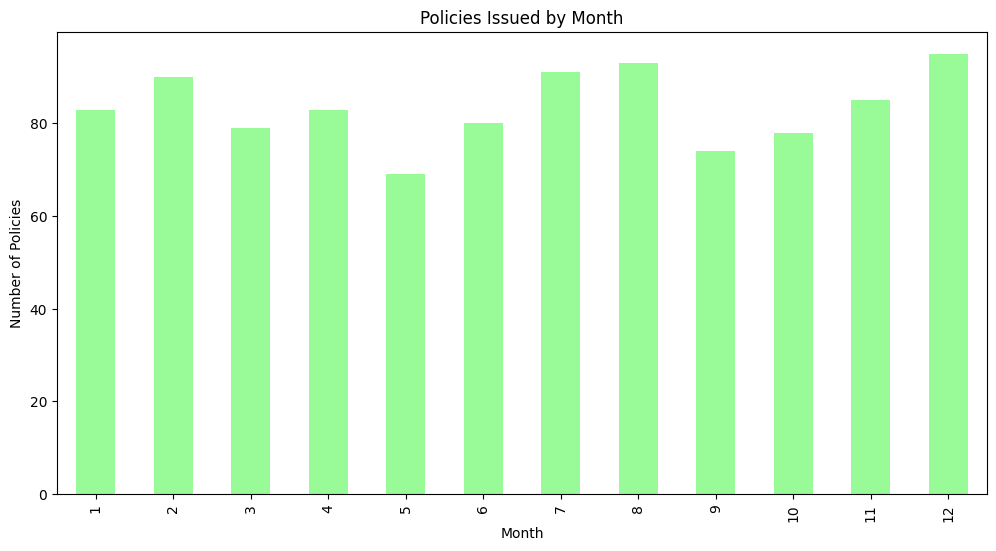

In [26]:
# Number of policies issued over the years

plt.figure(figsize=(12, 6))
policies_per_year.plot(kind='bar',color=mint_green_color )  # Corrected: Using .plot method directly on the Series object
plt.title('Number of Policies Issued Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Policies')
plt.xticks(rotation=45)  # Optional: Rotate the x-axis labels for better readability
plt.show()


# Number of policies used by seasons
plt.figure(figsize=(12,6))
policies_per_month.plot(kind='bar',color = mint_green_color )
plt.title('Policies Issued by Month')
plt.xlabel('Month')
plt.ylabel('Number of Policies')
plt.show()


#### Observations: 
- Policies Issued by Year: The bar chart shows does not display distinct pattern .
- Policies Issued by Month: The second bar chart details the distribution of policies issued by month. There is a little bit peak but in the summer but no exclusive seasonal patterns.

C:\Users\chimi\AppData\Local\Temp\ipykernel_4288\1787025331.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=insurance_claimsdf['policy_csl'], palette='viridis')


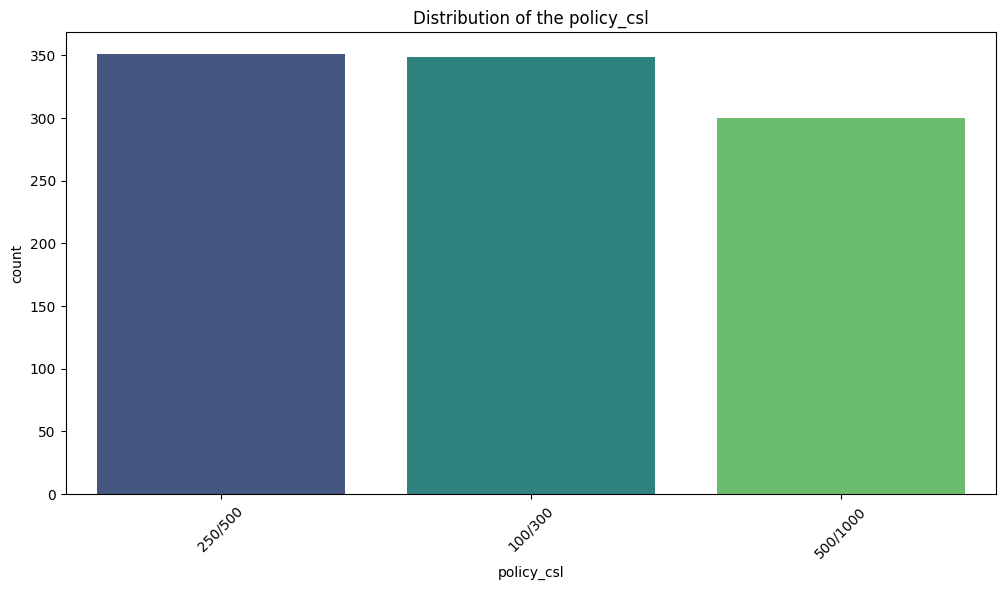

In [27]:
# Looking at policy_csl 

plt.figure(figsize=(12,6))
sns.countplot(x=insurance_claimsdf['policy_csl'], palette='viridis')
plt.title('Distribution of the policy_csl')
plt.tick_params(axis='x', rotation=45)


#### Observation:
- The range of insurance CSL options allows us to understand the various risk preferences of policyholders, which in turn helps us understand customer service and risk management tactics.

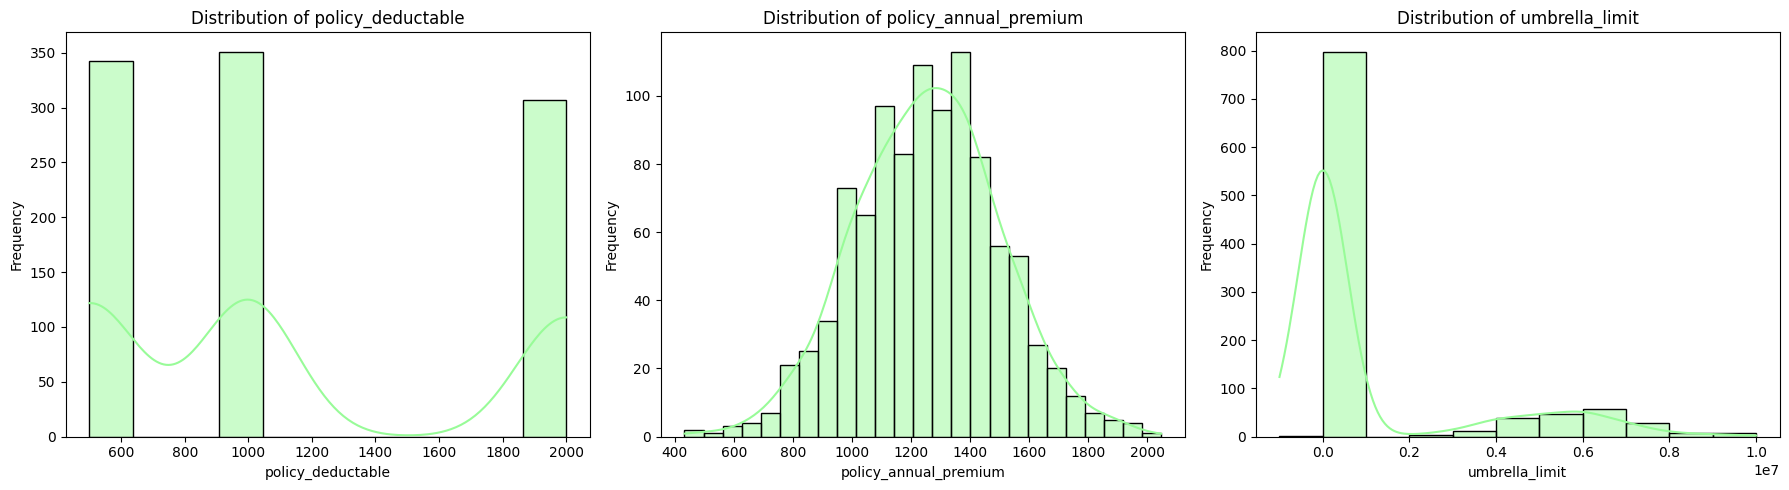

In [28]:
# Looking at financial aspect of the policies
financial_policy_columns = ['policy_deductable','policy_annual_premium', 'umbrella_limit']


# Plotting distributions
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for ax, column in zip(axes, financial_policy_columns):
    sns.histplot(insurance_claimsdf[column], kde=True, ax=ax, color = mint_green_color )
    ax.set_title(f'Distribution of {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

#### Observation:
- Policy Deductible: It appears that the distribution is discrete and centered on a small number of values. This implies thee are standard deductible levels. 
- Policy Annual Premium: The distribution of the annual premium follows a normal distribution, with peak a indicating that majority of the shareholders are paying an equal premium. There are also few policies on the higher end which could be considerd outliers. Perhaps, these policies are high risk policies that is why they cost higher.
- Umbrella Limit: The umbrella_limit follows a skewed distribution. The data is highly skewed to the right. A sizable portion of policies appear to have zero umbrella limit, suggesting that a large proportion of policyholders choose not to purchase thise extra coverage.Maybe, there is an option of some policyhlders choosing a set amount for umbrella coverage

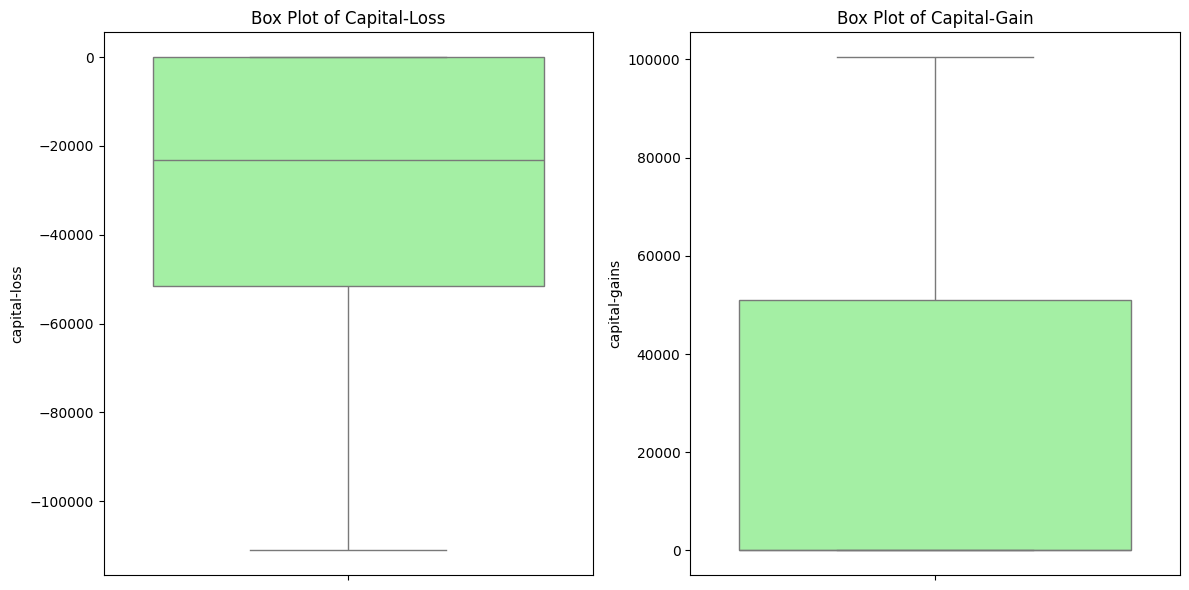

In [29]:
# Financial Loss and policy holders
# What is the median amount policy holders gained and lost?

plt.figure(figsize=(12, 6))

# Box plot for 'capital-loss'
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
sns.boxplot(y=insurance_claimsdf['capital-loss'], color=mint_green_color)
plt.title('Box Plot of Capital-Loss')

# Box plot for 'capital-gain'
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
sns.boxplot(y=insurance_claimsdf['capital-gains'], color=mint_green_color)
plt.title('Box Plot of Capital-Gain')

plt.tight_layout()
plt.show()

#### Observations:
- The capital gain median is nearly zero, meaning that policyholders typically receive either very little or no return at all.The capital IQR is insular, similar to the loss plot, meaning that the majority of policyholders are near the median. The few anomalies in the capital gain above whisker plot indicate that a tiny percentage of policyholders may have realized large financial gains. Very few or no benefits are received by the majority of policyholders. When there is a capital loss, it bad. The typical financial significant is implied by the central tendency of capital losses being below zero, highlighting a potential area where insurers may need to modify policies or premiums in order to better manage risk.


In [30]:
# How many unique incidents are in this dataset?
insurance_claimsdf['incident_date'].nunique()

60

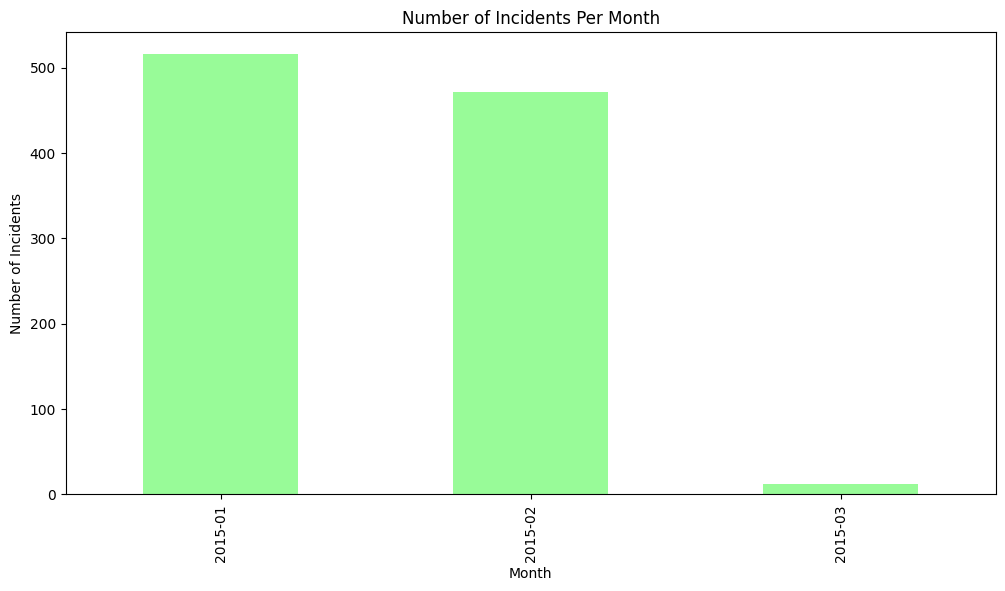

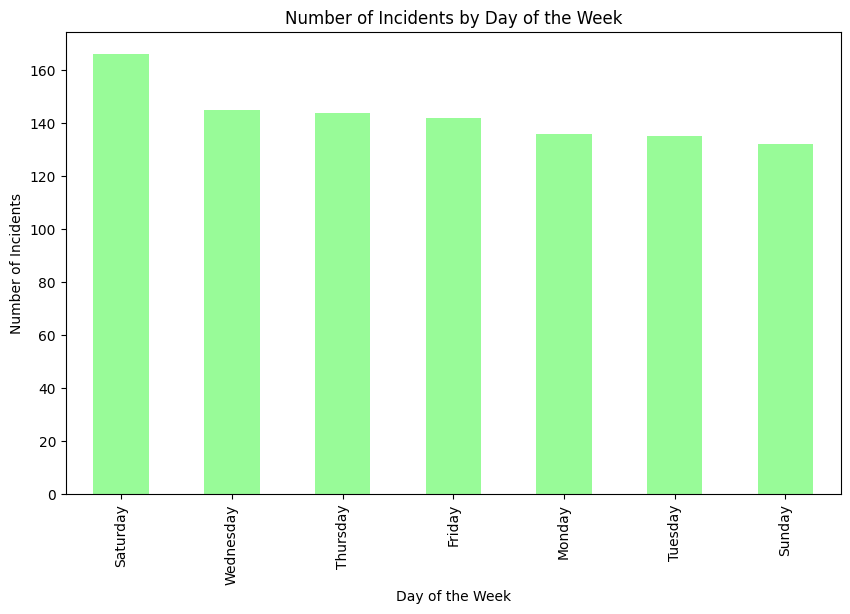

In [31]:
# Looking at the distribution of the indicidents 

# Count incidents per month
insurance_claimsdf['incident_year_month'] = insurance_claimsdf['incident_date'].dt.to_period('M')


# Count incidents per month
incidents_per_month = insurance_claimsdf['incident_year_month'].value_counts().sort_index()


# Plot
incidents_per_month.plot(kind='bar', figsize=(12, 6), color = mint_green_color )
plt.title('Number of Incidents Per Month')
plt.xlabel('Month')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=90)  # Rotate labels for better readability
plt.show()


# Number of incident day per week

insurance_claimsdf['incident_day_of_week'] = insurance_claimsdf['incident_date'].dt.day_name()




# Count incidents per day of week
incident_per_day_of_week = insurance_claimsdf['incident_day_of_week'].value_counts()

# Plot
incident_per_day_of_week.plot(kind='bar', figsize=(10, 6), color = mint_green_color )
plt.title('Number of Incidents by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Incidents')
plt.show()


C:\Users\chimi\AppData\Local\Temp\ipykernel_4288\2353449092.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=insurance_claimsdf, x='incident_type', ax=axes[0], order=insurance_claimsdf['incident_type'].value_counts().index, palette='viridis')
C:\Users\chimi\AppData\Local\Temp\ipykernel_4288\2353449092.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=insurance_claimsdf, x='collision_type', ax=axes[1], order=insurance_claimsdf['collision_type'].value_counts().index, palette='viridis')
C:\Users\chimi\AppData\Local\Temp\ipykernel_4288\2353449092.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` va

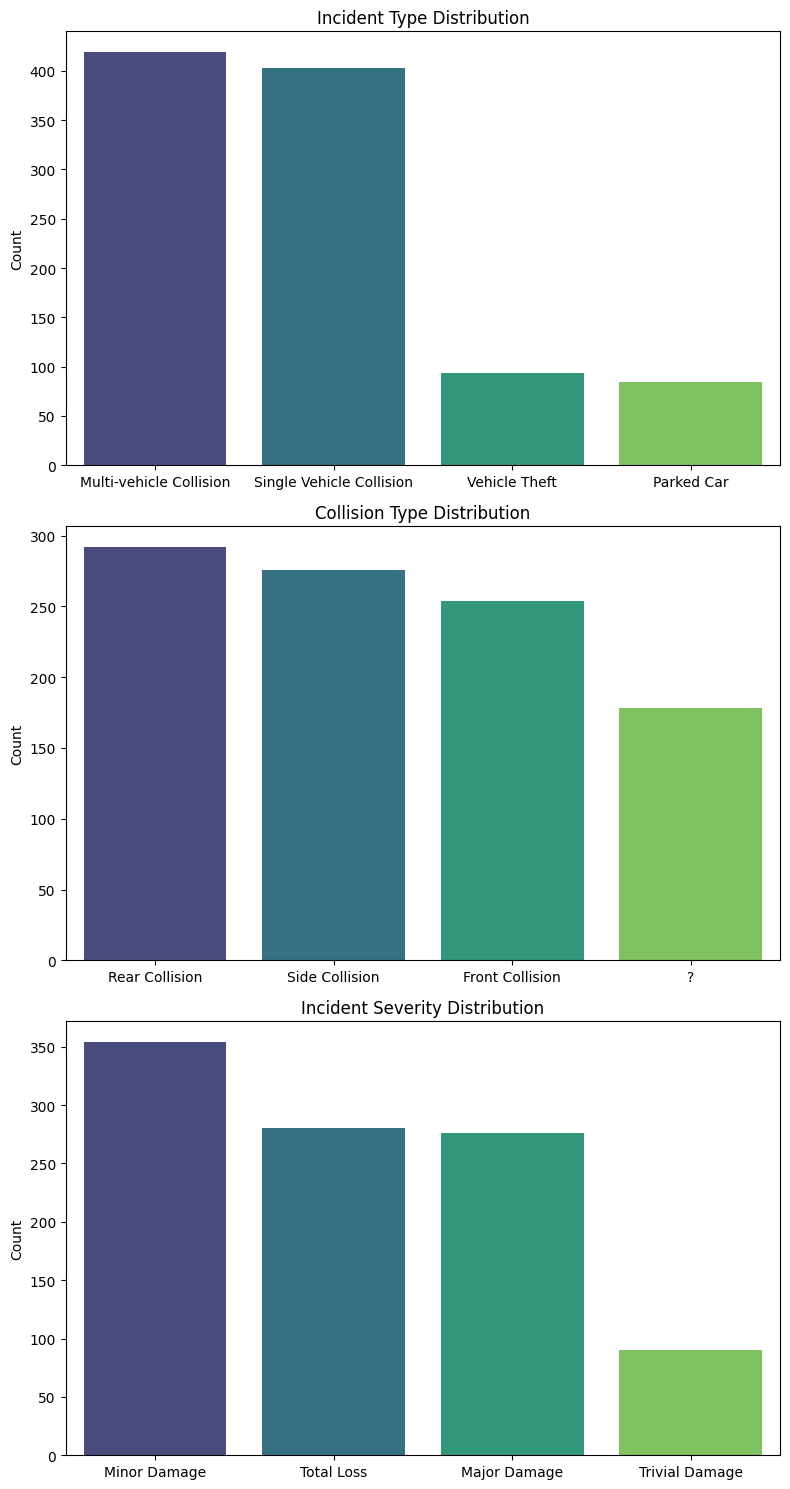

In [32]:
# Incident characteristics

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(8, 15))

# Incident Type
sns.countplot(data=insurance_claimsdf, x='incident_type', ax=axes[0], order=insurance_claimsdf['incident_type'].value_counts().index, palette='viridis')
axes[0].set_title('Incident Type Distribution')
axes[0].set_xlabel('')
axes[0].set_ylabel('Count')

# Collision Type
sns.countplot(data=insurance_claimsdf, x='collision_type', ax=axes[1], order=insurance_claimsdf['collision_type'].value_counts().index, palette='viridis')
axes[1].set_title('Collision Type Distribution')
axes[1].set_xlabel('')
axes[1].set_ylabel('Count')

# Incident Severity
sns.countplot(data=insurance_claimsdf, x='incident_severity', ax=axes[2], order=insurance_claimsdf['incident_severity'].value_counts().index, palette='viridis')
axes[2].set_title('Incident Severity Distribution')
axes[2].set_xlabel('')
axes[2].set_ylabel('Count')

plt.tight_layout()
plt.show()

C:\Users\chimi\AppData\Local\Temp\ipykernel_4288\695917479.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=insurance_claimsdf, x='authorities_contacted', ax=axes[0], order=insurance_claimsdf['authorities_contacted'].value_counts().index, palette='viridis')
C:\Users\chimi\AppData\Local\Temp\ipykernel_4288\695917479.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=insurance_claimsdf, x='incident_state', ax=axes[1], order=insurance_claimsdf['incident_state'].value_counts().index, palette='viridis')
C:\Users\chimi\AppData\Local\Temp\ipykernel_4288\695917479.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assi

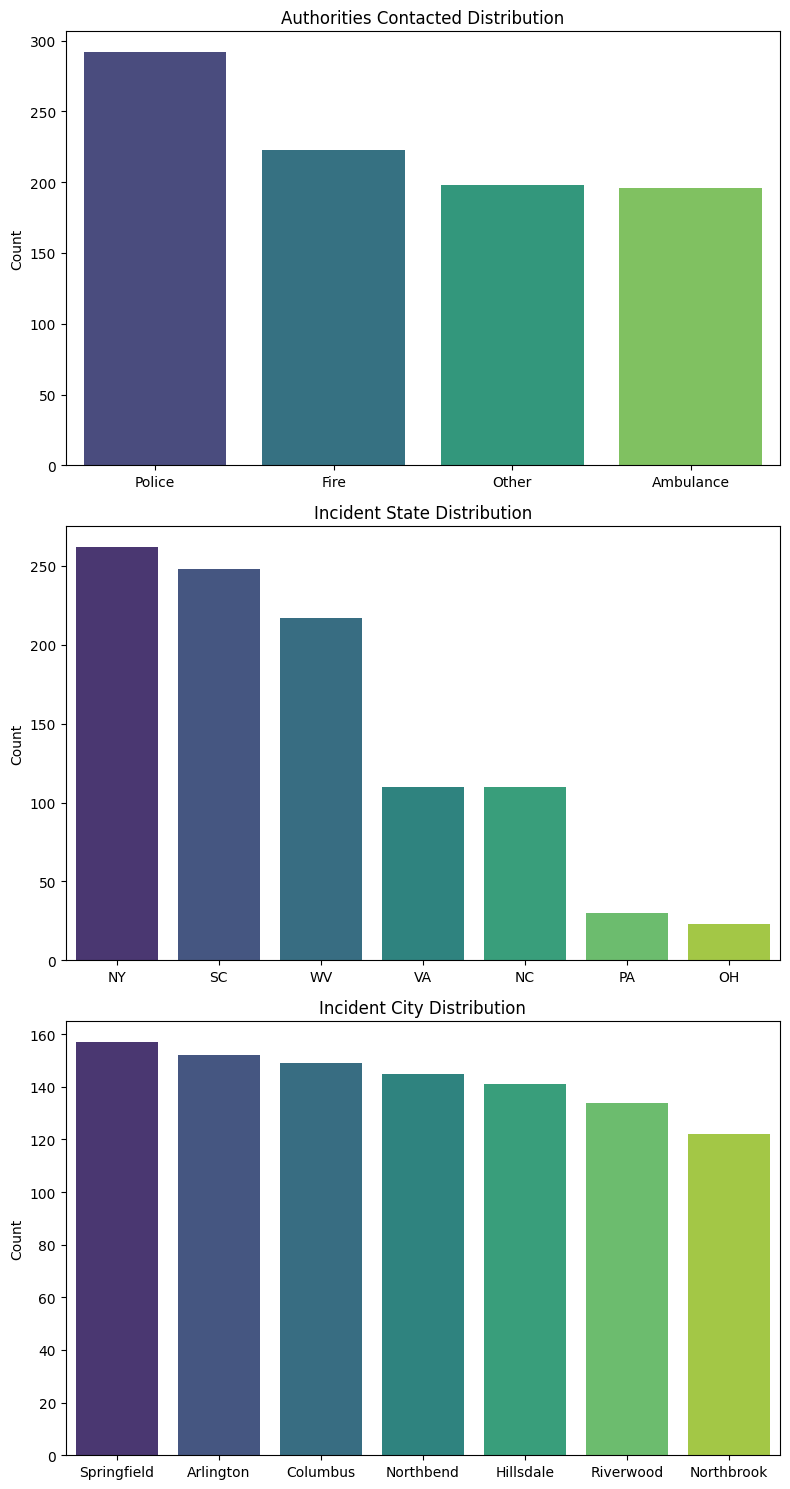

In [33]:
# Incident Response 

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(8, 15))

# Authorities Contacted
sns.countplot(data=insurance_claimsdf, x='authorities_contacted', ax=axes[0], order=insurance_claimsdf['authorities_contacted'].value_counts().index, palette='viridis')
axes[0].set_title('Authorities Contacted Distribution')
axes[0].set_xlabel('')
axes[0].set_ylabel('Count')

# Incident State
sns.countplot(data=insurance_claimsdf, x='incident_state', ax=axes[1], order=insurance_claimsdf['incident_state'].value_counts().index, palette='viridis')
axes[1].set_title('Incident State Distribution')
axes[1].set_xlabel('')
axes[1].set_ylabel('Count')

# Incident City
sns.countplot(data=insurance_claimsdf, x='incident_city', ax=axes[2], order=insurance_claimsdf['incident_city'].value_counts().index, palette='viridis')
axes[2].set_title('Incident City Distribution')
axes[2].set_xlabel('')
axes[2].set_ylabel('Count')

plt.tight_layout()
plt.show()


#### Observation:

#### Number of Incident Per Month: 
 - There are no unusable season trend or spikes on this graph.
#### Number of Incident by Day of the Week
- Distribution of Incident Types

- This graph shows that single- and multi-vehicle collisions are the most common kind of accidents, providing insight into the fact that traffic accidents are the main source of risk for policyholders and pointing out a possible adjustment area.


-  Collision Type Distribution: This graph indicates that rear-end crashes are the most frequent type of collisions.

-  Incident Severity Distribution: The distribution shows that minor severity occurrences occur more frequently. This reveals to us that although accidents may occur frequently, severe damage is not usually the outcome. On the other hand, this might affect insurers' financial planning.

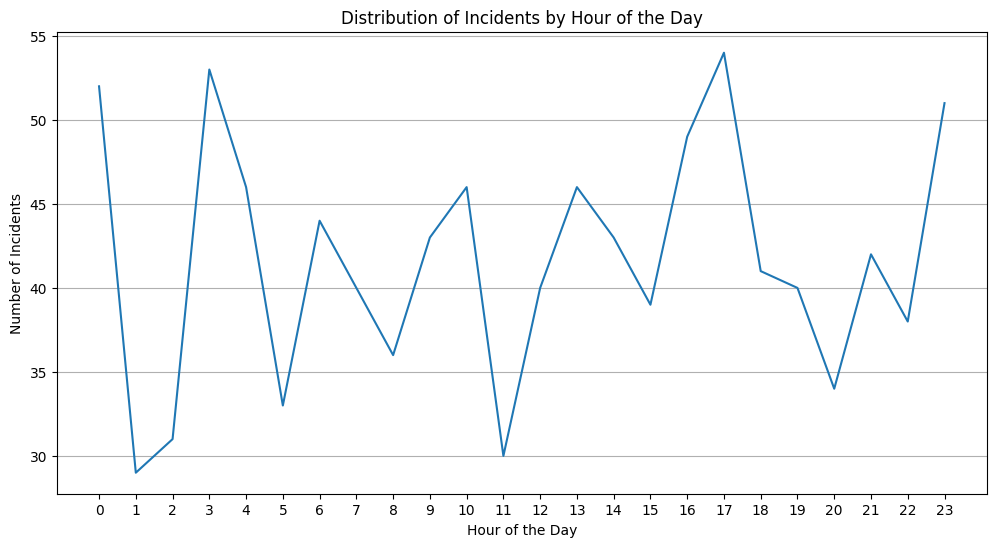

In [34]:
# When do most of the incidents occur?

# Calculate the count of incidents for each hour of the day
incident_counts_by_hour = insurance_claimsdf['incident_hour_of_the_day'].value_counts().sort_index()


# Plot the results using a lineplot
plt.figure(figsize=(12,6))
sns.lineplot(x=incident_counts_by_hour.index, y=incident_counts_by_hour.values)
plt.title('Distribution of Incidents by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Incidents')
plt.xticks(range(0, 24))  # Ensure all hours are displayed
plt.grid(axis='y')
plt.show()


In [35]:
# Lineplot with the definition of hours
def hour_to_part_of_day(hour):
    if 0 <= hour <= 5:
        return 'Early Morning'
    elif 6 <= hour <= 11:
        return 'Morning'
    
    elif 12 <= hour <=17:
        return 'Afternoon'
    elif 18 <= hour <= 21:
        return 'Evening'
    else: # 22-23
        return'Night'
    
# Map these values according to these definition
insurance_claimsdf['part_of_day'] = insurance_claimsdf['incident_hour_of_the_day'].apply(hour_to_part_of_day)

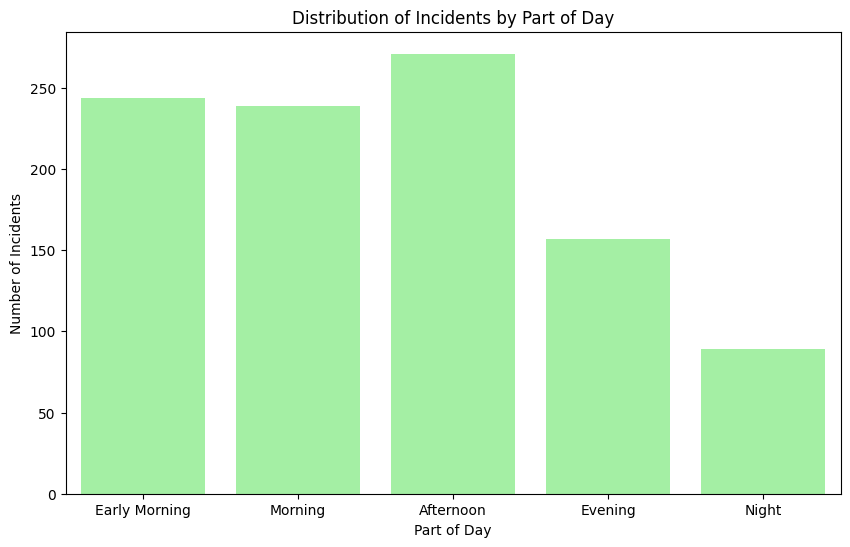

In [36]:
# When do the incidents peak?

plt.figure(figsize=(10, 6))
order = ['Early Morning', 'Morning', 'Afternoon', 'Evening', 'Night']  # Define the order of categories
sns.countplot(data=insurance_claimsdf, x='part_of_day', order=order, color=mint_green_color )
plt.title('Distribution of Incidents by Part of Day')
plt.xlabel('Part of Day')
plt.ylabel('Number of Incidents')
plt.show()

#### Observations:
- The incidents of the accidents seems to peak around early monring and evening as verified by both display plot. This could be explained due to high number of vehicles on the road due to early commute to work or after work peak-hours.


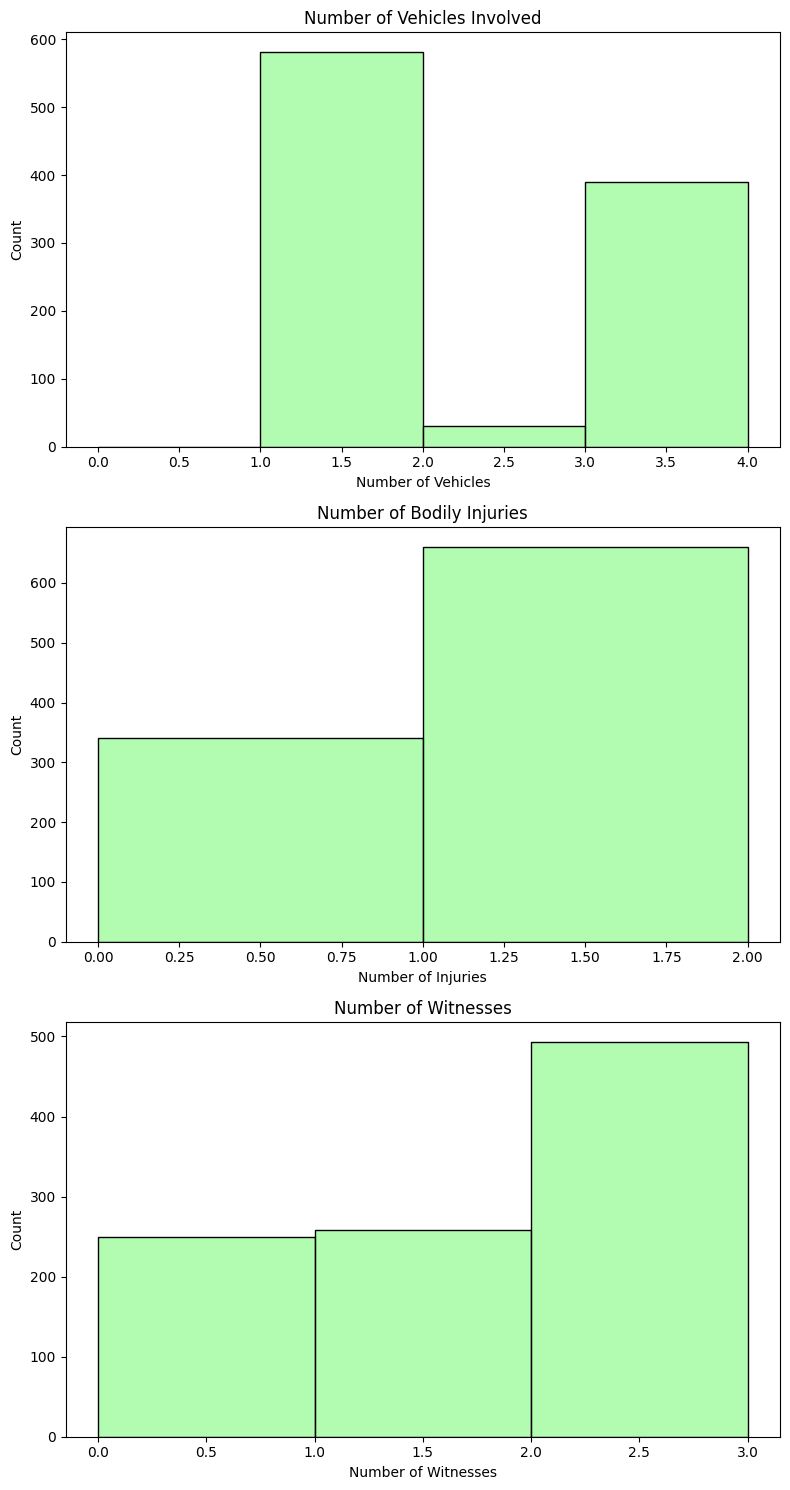

In [37]:
# Claims Details
# Incident details

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(8, 15))

# Number of Vehicles Involved
sns.histplot(insurance_claimsdf['number_of_vehicles_involved'], bins=range(insurance_claimsdf['number_of_vehicles_involved'].max() + 1), kde=False, ax=axes[0], color=mint_green_color )
axes[0].set_title('Number of Vehicles Involved')
axes[0].set_xlabel('Number of Vehicles')
axes[0].set_ylabel('Count')

# Bodily Injuries
sns.histplot(insurance_claimsdf['bodily_injuries'], bins=range(insurance_claimsdf['bodily_injuries'].max() + 1), kde=False, ax=axes[1], color = mint_green_color )
axes[1].set_title('Number of Bodily Injuries')
axes[1].set_xlabel('Number of Injuries')
axes[1].set_ylabel('Count')

# Witnesses
sns.histplot(insurance_claimsdf['witnesses'], bins=range(insurance_claimsdf['witnesses'].max() + 1), kde=False, ax=axes[2], color= mint_green_color )
axes[2].set_title('Number of Witnesses')
axes[2].set_xlabel('Number of Witnesses')
axes[2].set_ylabel('Count')

plt.tight_layout()
plt.show()


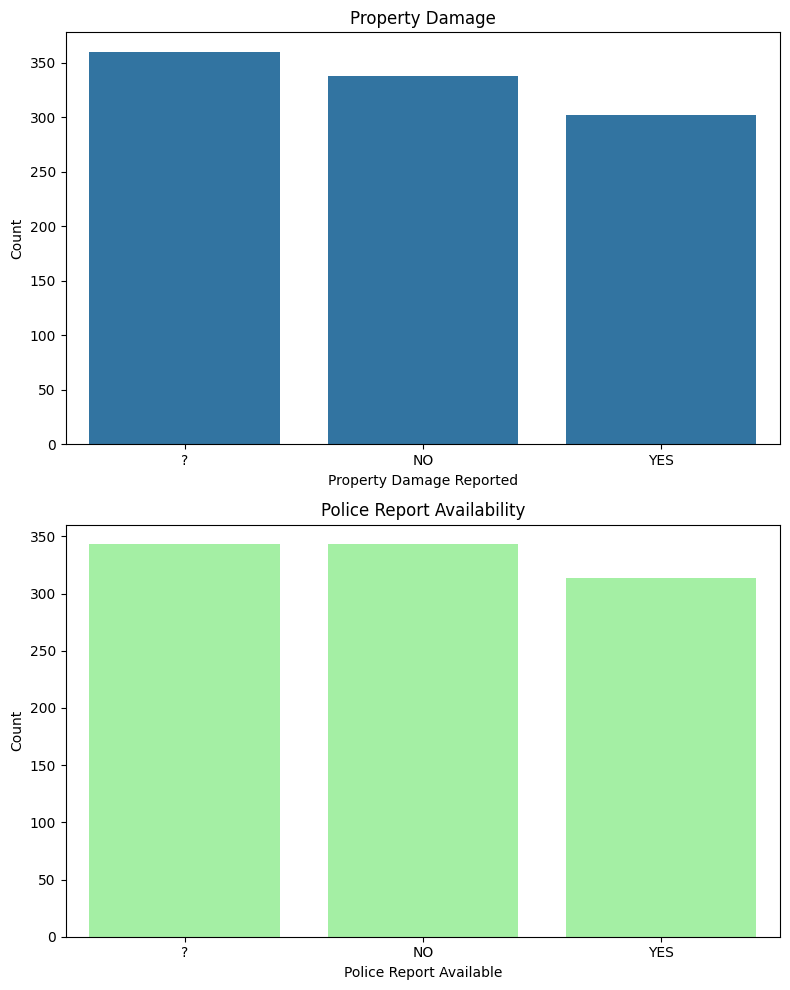

In [38]:
# Claims information by categorical variables-further incident details

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8, 10))

# Property Damage
sns.countplot(data=insurance_claimsdf, x='property_damage', order=insurance_claimsdf['property_damage'].value_counts().index, ax=axes[0])
axes[0].set_title('Property Damage')
axes[0].set_xlabel('Property Damage Reported')
axes[0].set_ylabel('Count')

# Police Report Available
sns.countplot(data=insurance_claimsdf, x='police_report_available', order=insurance_claimsdf['police_report_available'].value_counts().index, ax=axes[1], color=mint_green_color )
axes[1].set_title('Police Report Availability')
axes[1].set_xlabel('Police Report Available')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

C:\Users\chimi\AppData\Local\Temp\ipykernel_4288\1501650604.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=insurance_claimsdf[fcd], color=mint_green_color )
C:\Users\chimi\AppData\Local\Temp\ipykernel_4288\1501650604.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=insurance_claimsdf

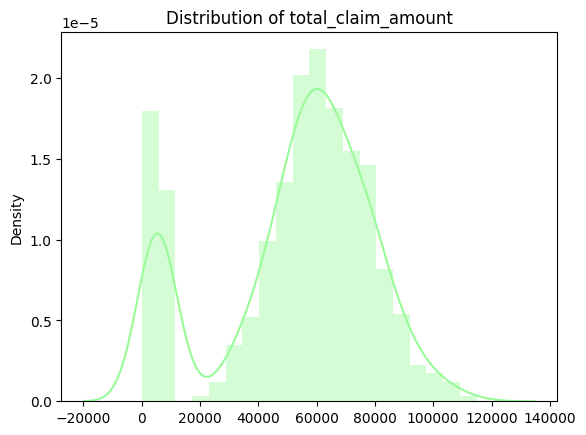

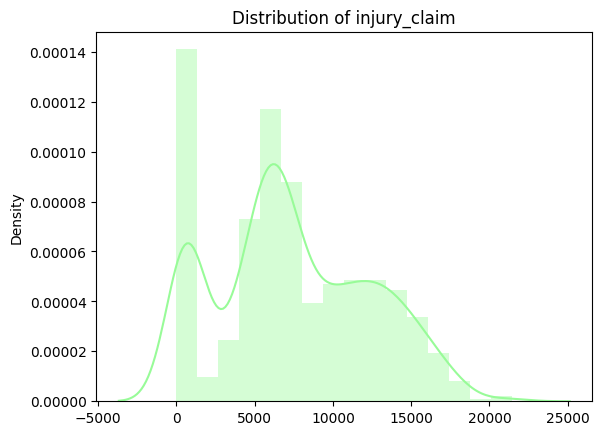

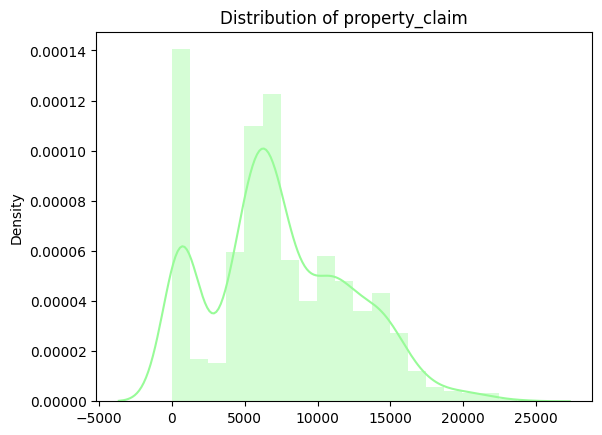

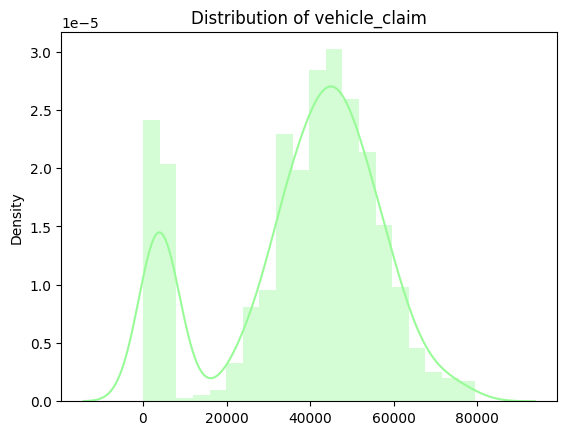

In [39]:
# Financial Claims Details
financial_claims_details = ['total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim']

for fcd in financial_claims_details:
    plt.figure()
    sns.distplot(x=insurance_claimsdf[fcd], color=mint_green_color )
    plt.title(f'Distribution of {fcd}')

#### Observations:

#### Number of vehicles involved:
- Single car incident: The histogram shows that the majority of the accidents involving insurance claims involve just one car, indicating that collisions and other single vehicle occurrences are the most frequent. 
- Multi-Vehicle Collisions: This type of traffic incident, which typically involves two or more cars, garners the greatest attention.

- Number of bodily injuries: A substantial portion of the claims show that, more often than not, there are only property damages as opposed to bodily ones. 

- Injury Claim: When one or more injuries show up in other claims, it emphasizes the importance of having personal coverage and may have an impact on the premium amount.
 


C:\Users\chimi\AppData\Local\Temp\ipykernel_4288\3625137357.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=insurance_claimsdf, palette='viridis', order=insurance_claimsdf[col].value_counts().index)


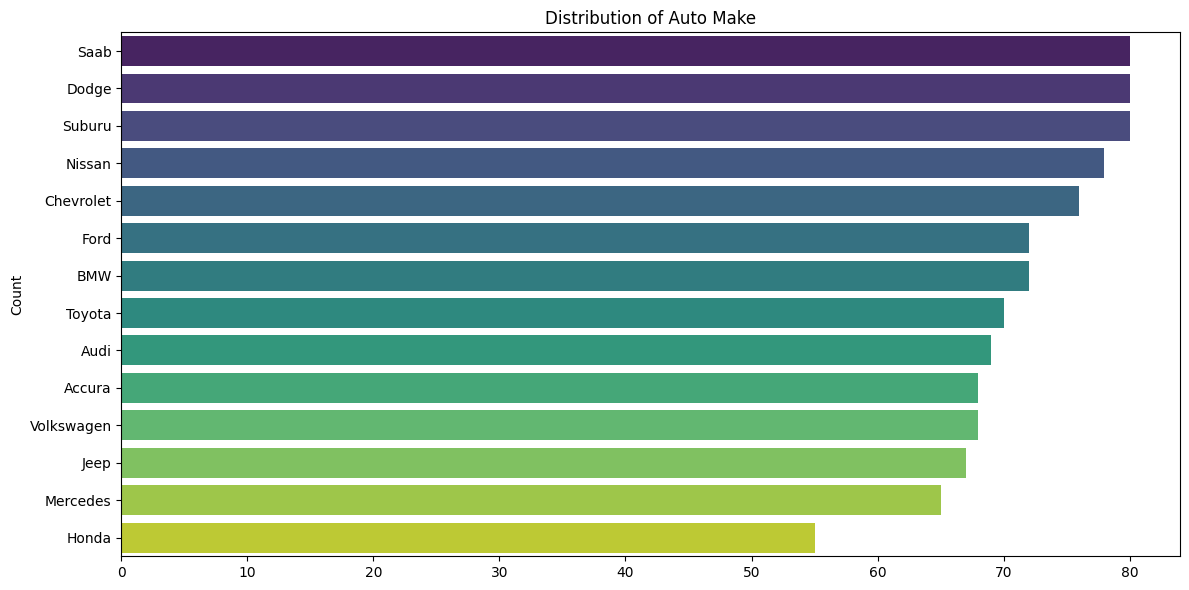

C:\Users\chimi\AppData\Local\Temp\ipykernel_4288\3625137357.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=insurance_claimsdf, order=top_models, palette='viridis')


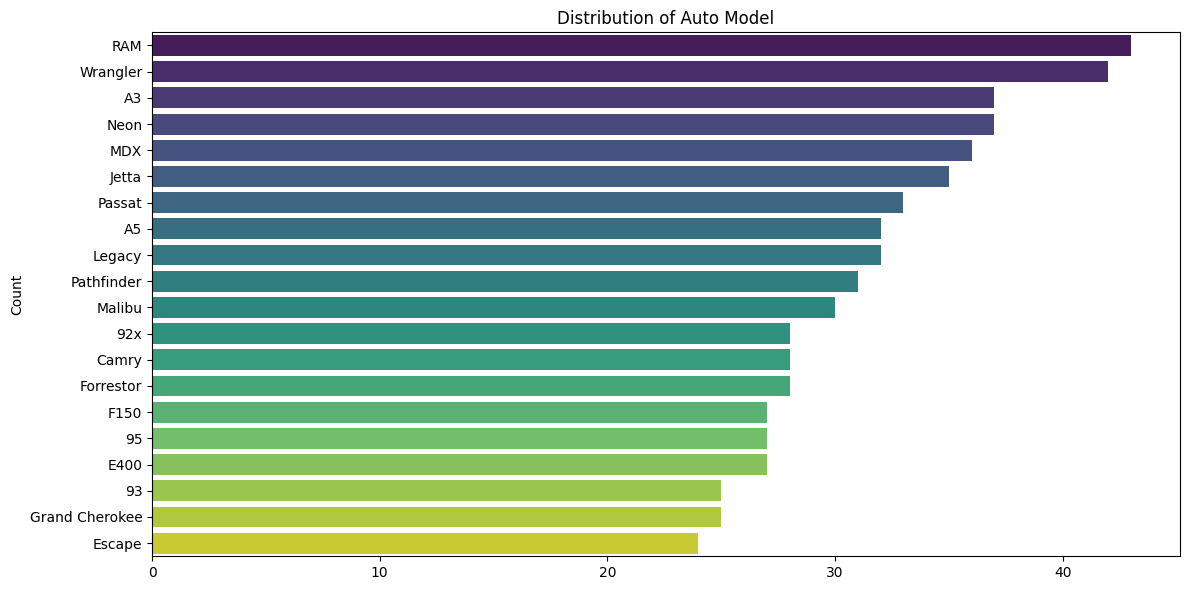

C:\Users\chimi\AppData\Local\Temp\ipykernel_4288\3625137357.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=insurance_claimsdf, palette='viridis', order=sorted(insurance_claimsdf[col].unique()))


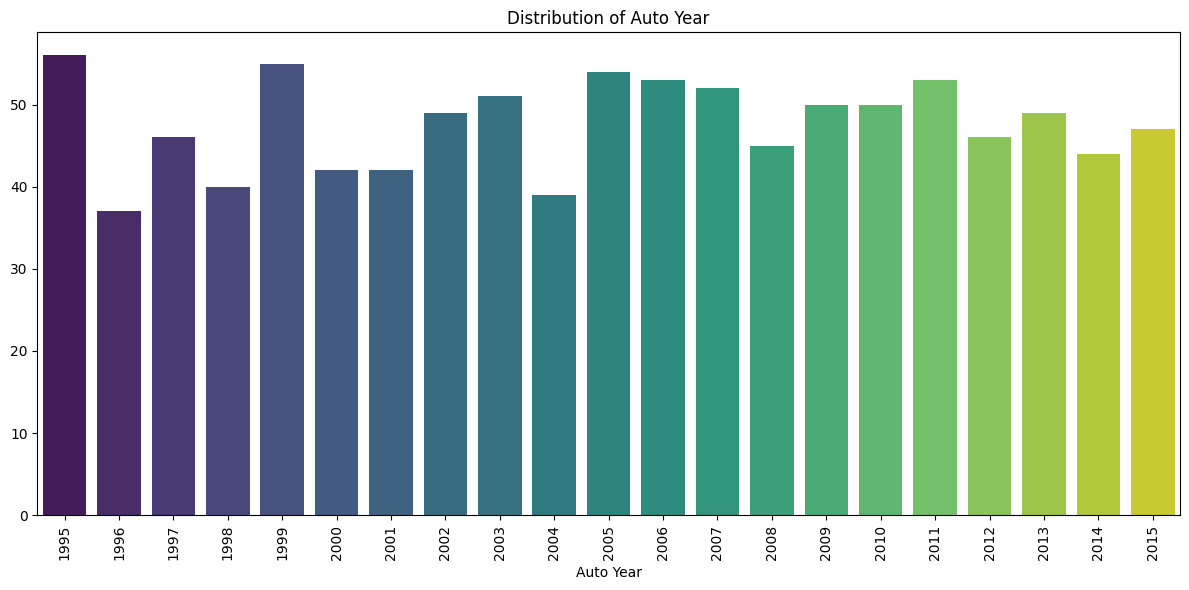

In [40]:
# Vehicles-related variables

vehicle_columns = ['auto_make', 'auto_model', 'auto_year']

# Loop over the columns and create a count plot for each one
for col in vehicle_columns:
    plt.figure(figsize=(12, 6))
    # For 'auto_model', we may only want to show the top N models for better readability
    if col == 'auto_model':
        top_models = insurance_claimsdf[col].value_counts().head(20).index
        sns.countplot(y=col, data=insurance_claimsdf, order=top_models, palette='viridis')
    elif col == 'auto_year':
        sns.countplot(x=col, data=insurance_claimsdf, palette='viridis', order=sorted(insurance_claimsdf[col].unique()))
        plt.xticks(rotation=90)  # Rotate for better readability if there are many years
    else:
        sns.countplot(y=col, data=insurance_claimsdf, palette='viridis', order=insurance_claimsdf[col].value_counts().index)
    plt.title(f'Distribution of {col.replace("_", " ").title()}')
    plt.ylabel('Count' if col != 'auto_year' else '')
    plt.xlabel(col.replace('_', ' ').title() if col == 'auto_year' else '')
    plt.tight_layout()
    plt.show()

C:\Users\chimi\AppData\Local\Temp\ipykernel_4288\646878811.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=insurance_claimsdf['fraud_reported'], palette='viridis')


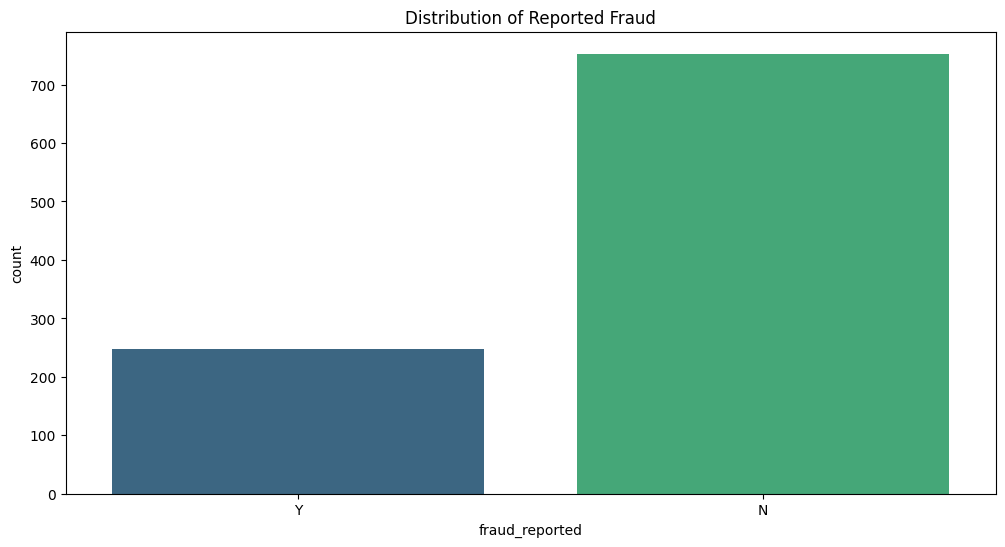

In [41]:
## Out of the 1000+ claims, how many of these are fraud and non-fraud?

plt.figure(figsize=(12,6))
sns.countplot(x=insurance_claimsdf['fraud_reported'], palette='viridis')
plt.title('Distribution of Reported Fraud')
plt.show()

#### Observations:

- Auto Make - Saab, Dodge, Suburu, and Nissan are the most frequently owned car by the policy holders. The distribution of the auto makes varies in this plot. There are some auto makers who can inherently carry a higher risk than other makes.

- Auto Year: There is no distinct pattern in auto year.

-  Majority of the insurance claims reported by policy holders are non-fraud claims.

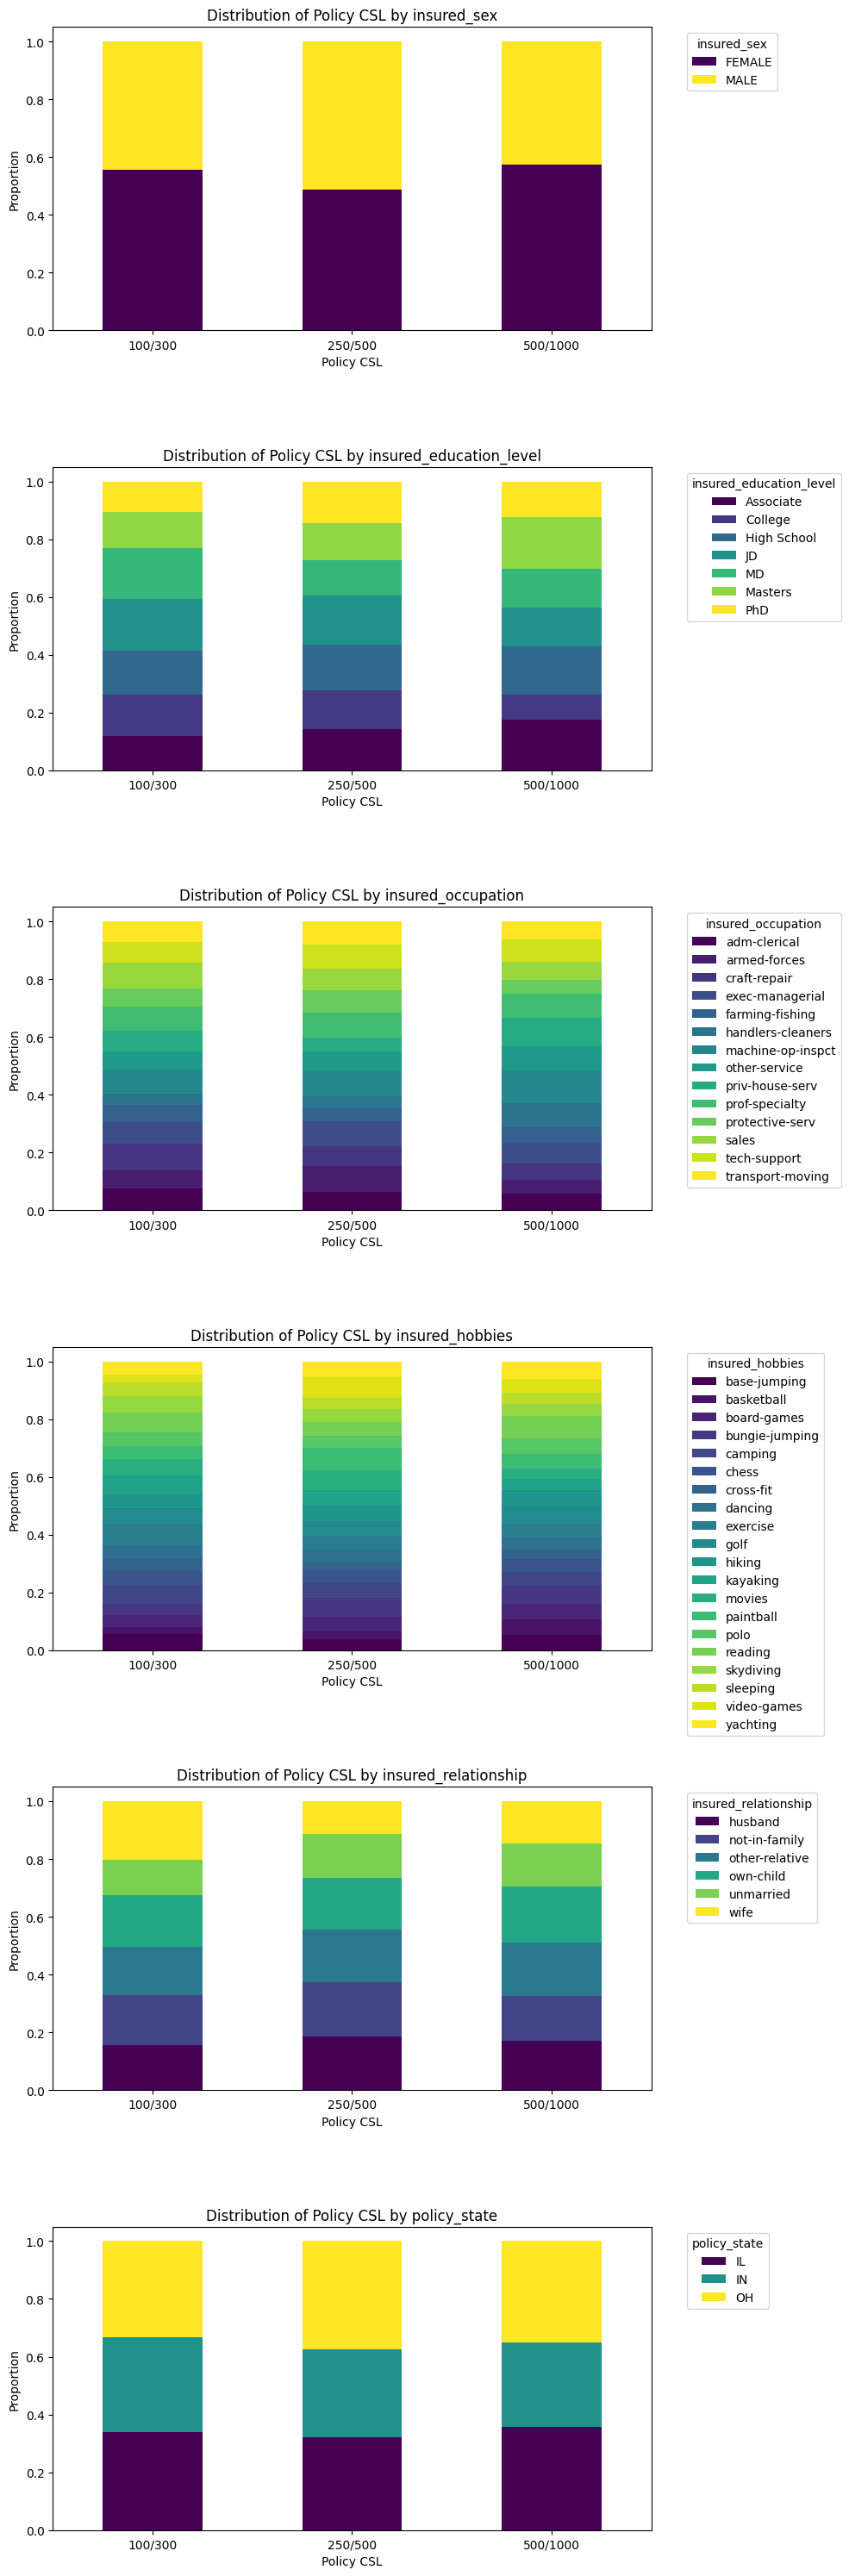

In [42]:
# Demographic analysis and policy csl

# Using the demographic variables that is defined during unvariate analysis

# Create a figure to hold all the plots
fig, axes = plt.subplots(nrows=len(demographic_variables), ncols=1, figsize=(10, 30))

# Loop through each demographic variable to create a stacked bar chart
for i, var in enumerate(demographic_variables):
    # Cross-tabulation of 'policy_csl' and the demographic variable
    ctab = pd.crosstab(index=insurance_claimsdf['policy_csl'], columns=insurance_claimsdf[var], normalize='index')
    
    # Plotting
    ctab.plot(kind='bar', stacked=True, ax=axes[i], colormap='viridis')
    axes[i].set_title(f'Distribution of Policy CSL by {var}')
    axes[i].set_xlabel('Policy CSL')
    axes[i].set_ylabel('Proportion')
    axes[i].legend(title=var, bbox_to_anchor=(1.05, 1), loc='upper left')
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=0)

plt.tight_layout()
plt.show()

#### Observations:
- Insured Sex: There appears to be a fairly equal distribution of policy coverage levels amongst genders. This implies that choice of coverage may not be greatly influenced by gender.

- Insured Education level: The vary degree of education levels might explain the preferences for different degree of policy coverage. There is not a distinct pattern in terms of education level and coverage policy preferences. The entire preferences vary on different levels.

- Insured Occupation: As per the graph above, there is no distinct pattern where individulas with certain hobbies might prefer higher coverage levels.The degree level of coverage varies.

- Insured relationship: Relationship status might somewhere influence coverage decision, possibly giving us insight into different financial responsibilities on risk considerations. 

- Policy  State: Regional differences in the appropriate coverage levels could vary due the local economic conditions, state regulations etc.The regional variations could be used as a characteristic in the future to tailor marketing strategies.

C:\Users\chimi\AppData\Local\Temp\ipykernel_4288\42570619.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=dv, y=fp, data=insurance_claimsdf, palette='viridis')  # Use the column names directly


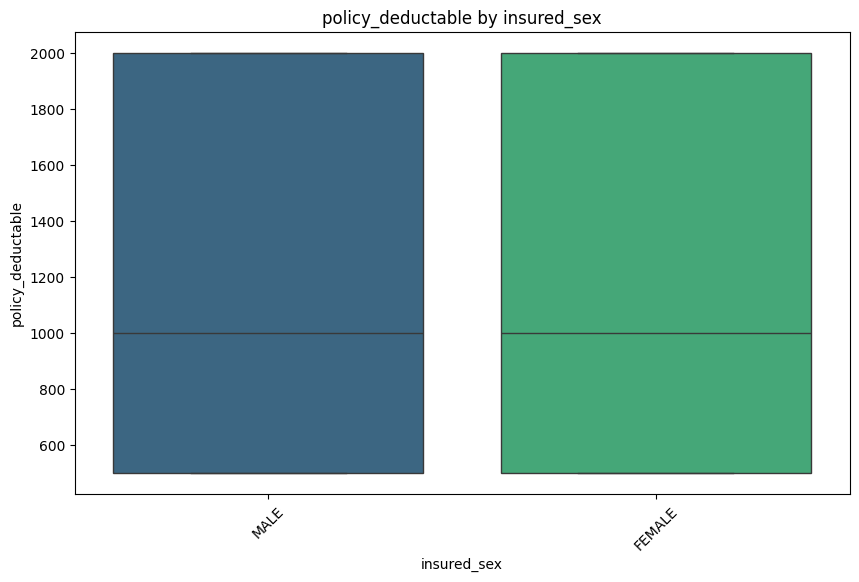

C:\Users\chimi\AppData\Local\Temp\ipykernel_4288\42570619.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=dv, y=fp, data=insurance_claimsdf, palette='viridis')  # Use the column names directly


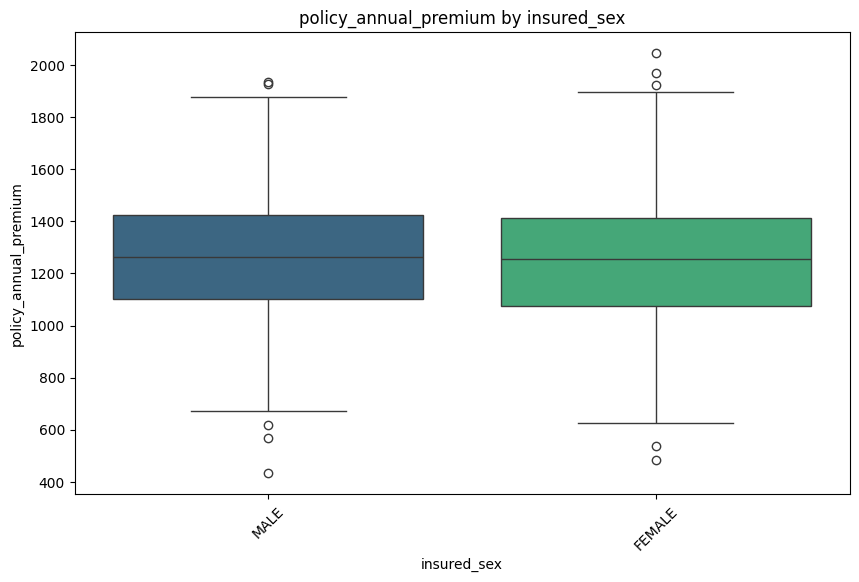

C:\Users\chimi\AppData\Local\Temp\ipykernel_4288\42570619.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=dv, y=fp, data=insurance_claimsdf, palette='viridis')  # Use the column names directly


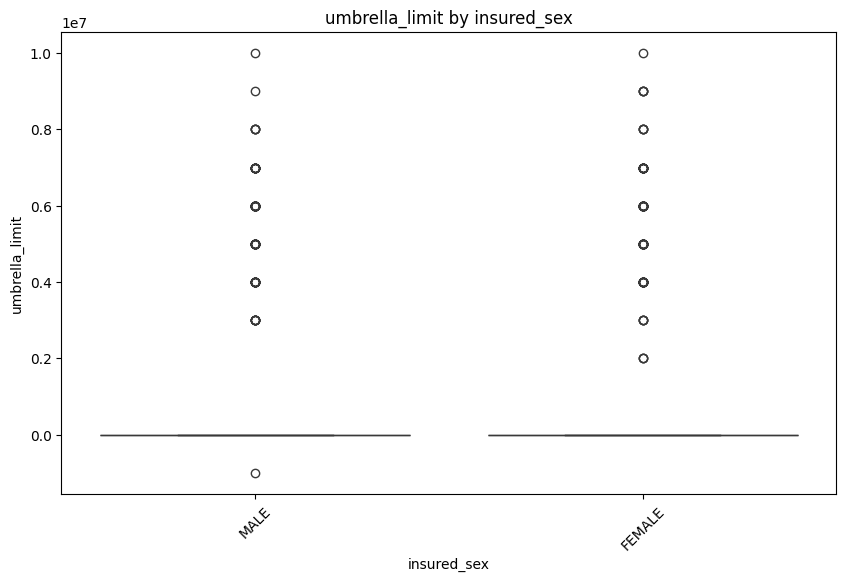

C:\Users\chimi\AppData\Local\Temp\ipykernel_4288\42570619.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=dv, y=fp, data=insurance_claimsdf, palette='viridis')  # Use the column names directly


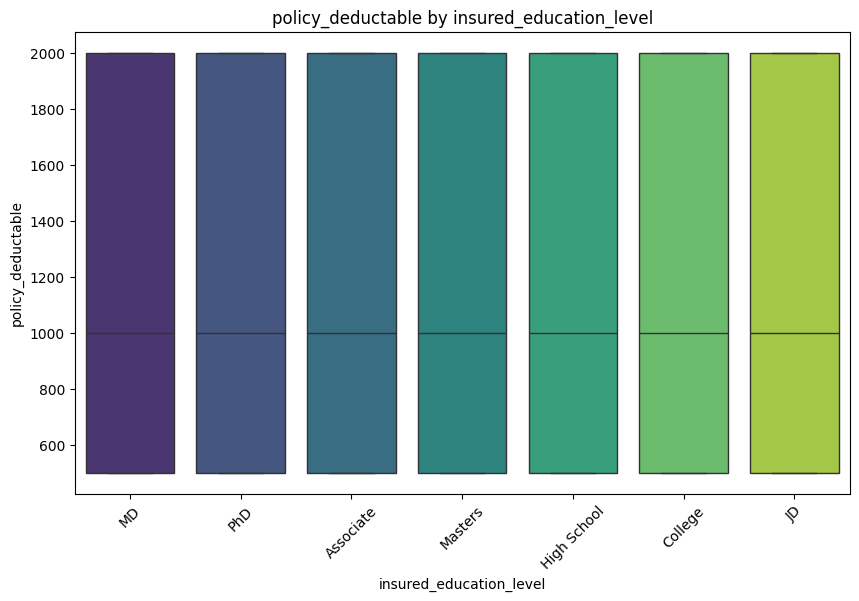

C:\Users\chimi\AppData\Local\Temp\ipykernel_4288\42570619.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=dv, y=fp, data=insurance_claimsdf, palette='viridis')  # Use the column names directly


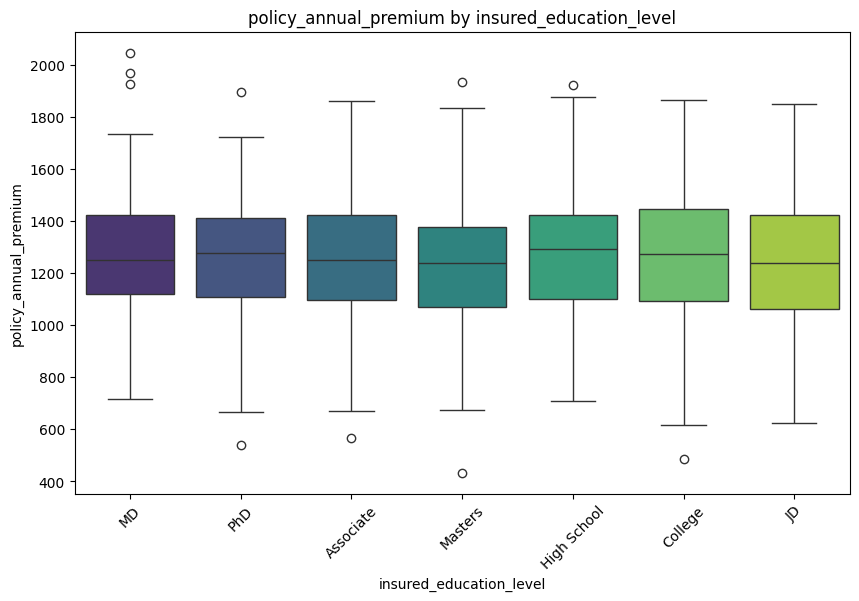

C:\Users\chimi\AppData\Local\Temp\ipykernel_4288\42570619.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=dv, y=fp, data=insurance_claimsdf, palette='viridis')  # Use the column names directly


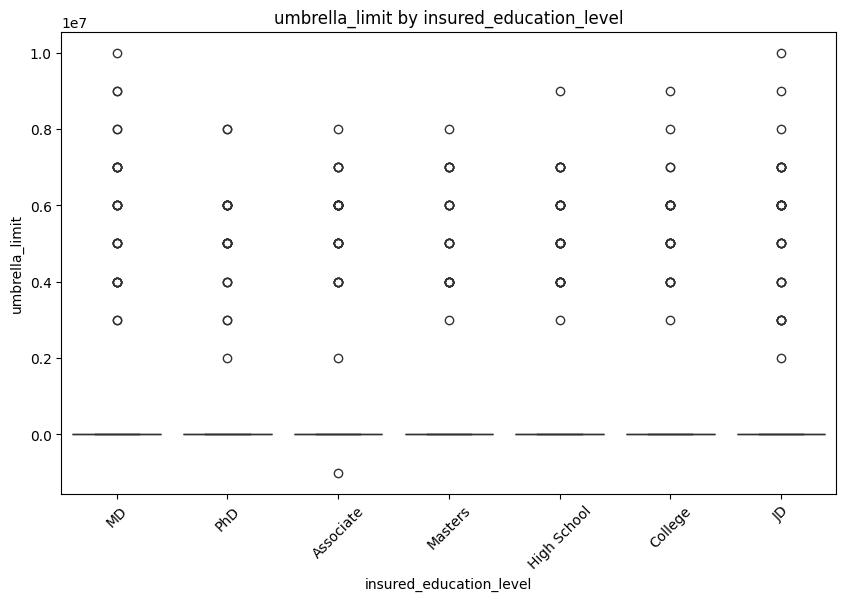

C:\Users\chimi\AppData\Local\Temp\ipykernel_4288\42570619.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=dv, y=fp, data=insurance_claimsdf, palette='viridis')  # Use the column names directly


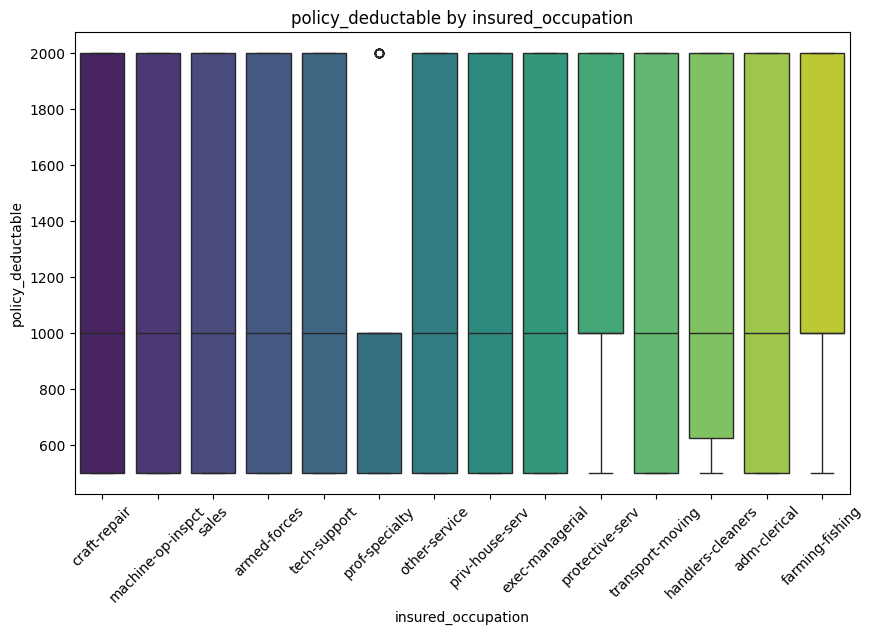

C:\Users\chimi\AppData\Local\Temp\ipykernel_4288\42570619.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=dv, y=fp, data=insurance_claimsdf, palette='viridis')  # Use the column names directly


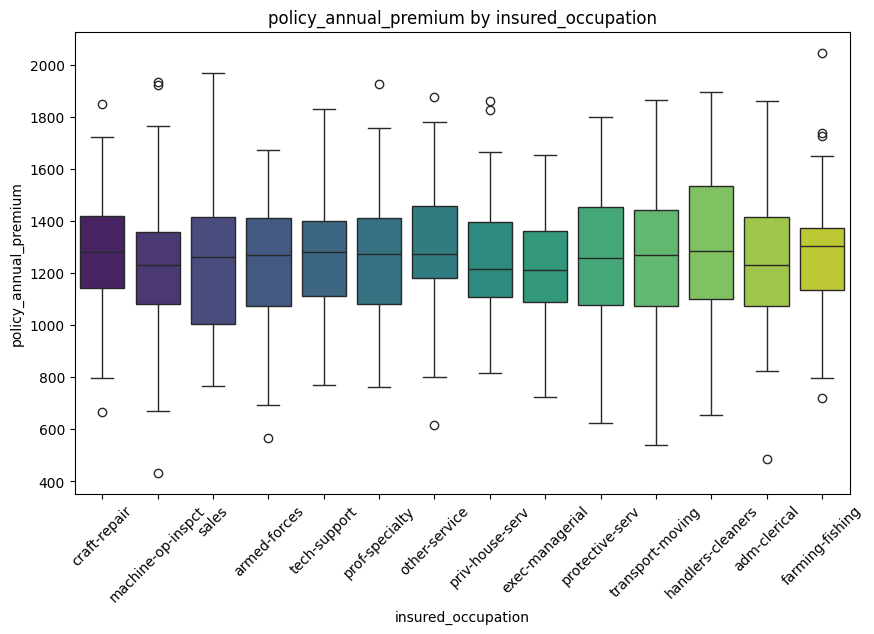

C:\Users\chimi\AppData\Local\Temp\ipykernel_4288\42570619.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=dv, y=fp, data=insurance_claimsdf, palette='viridis')  # Use the column names directly


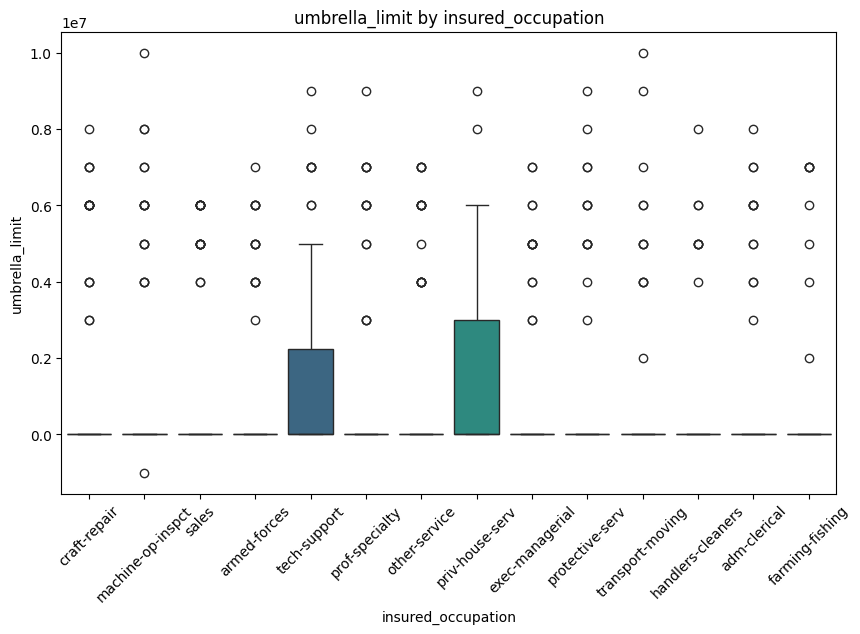

C:\Users\chimi\AppData\Local\Temp\ipykernel_4288\42570619.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=dv, y=fp, data=insurance_claimsdf, palette='viridis')  # Use the column names directly


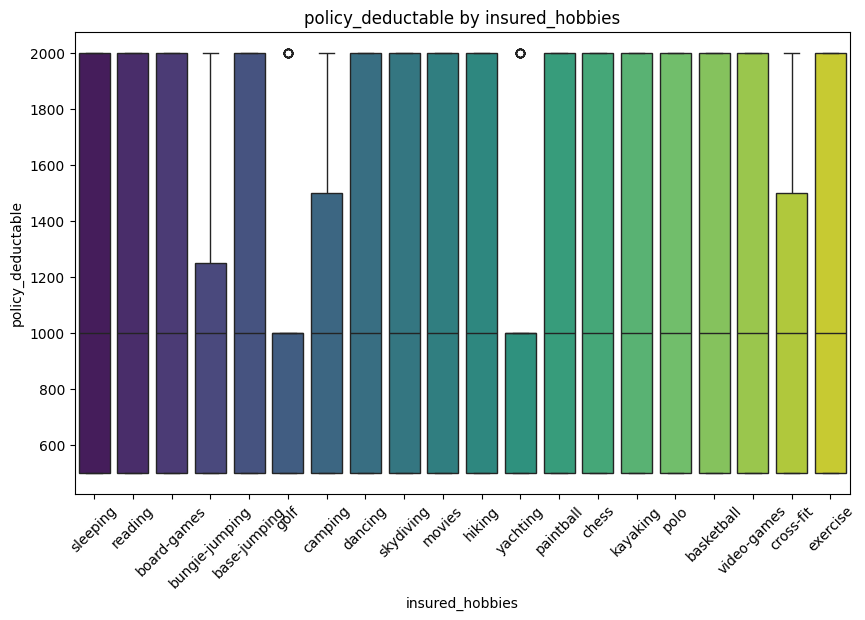

C:\Users\chimi\AppData\Local\Temp\ipykernel_4288\42570619.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=dv, y=fp, data=insurance_claimsdf, palette='viridis')  # Use the column names directly


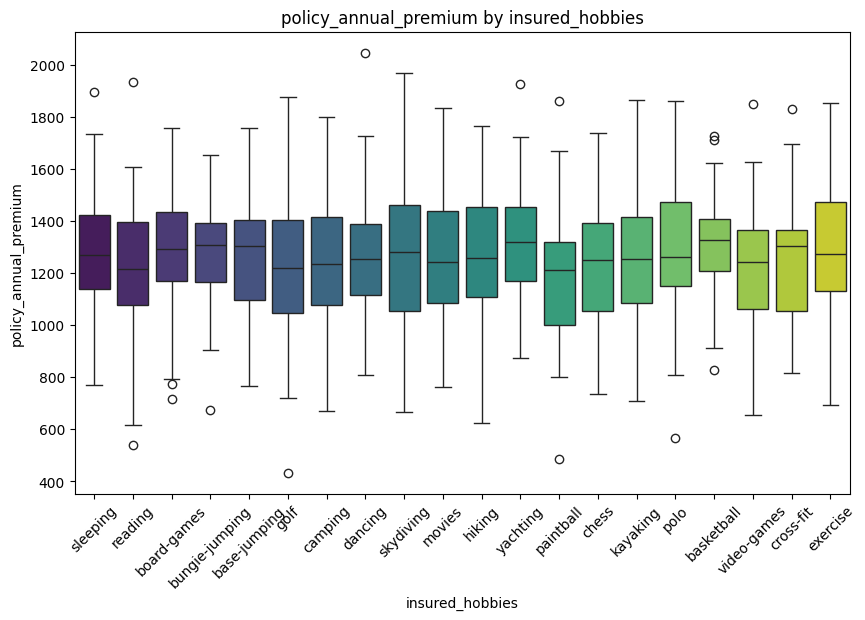

C:\Users\chimi\AppData\Local\Temp\ipykernel_4288\42570619.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=dv, y=fp, data=insurance_claimsdf, palette='viridis')  # Use the column names directly


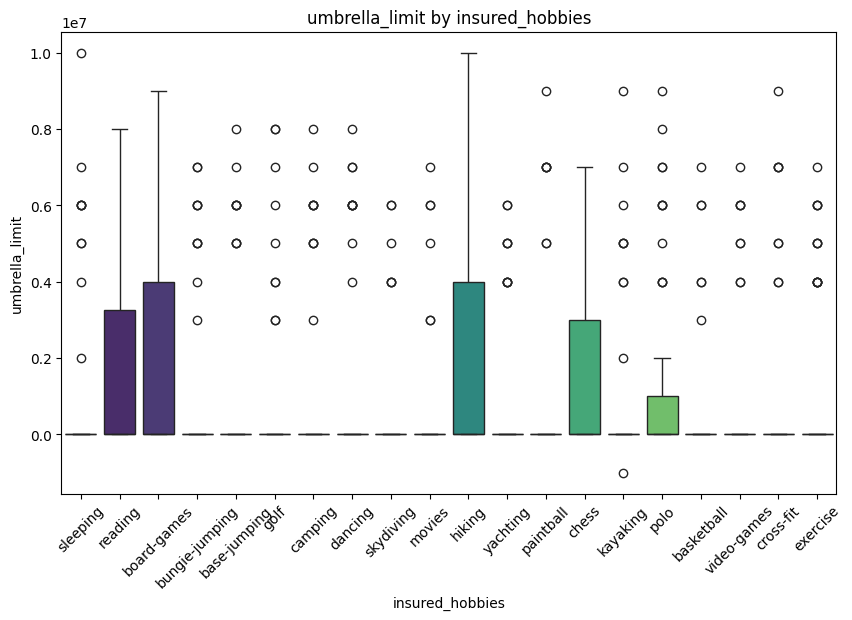

C:\Users\chimi\AppData\Local\Temp\ipykernel_4288\42570619.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=dv, y=fp, data=insurance_claimsdf, palette='viridis')  # Use the column names directly


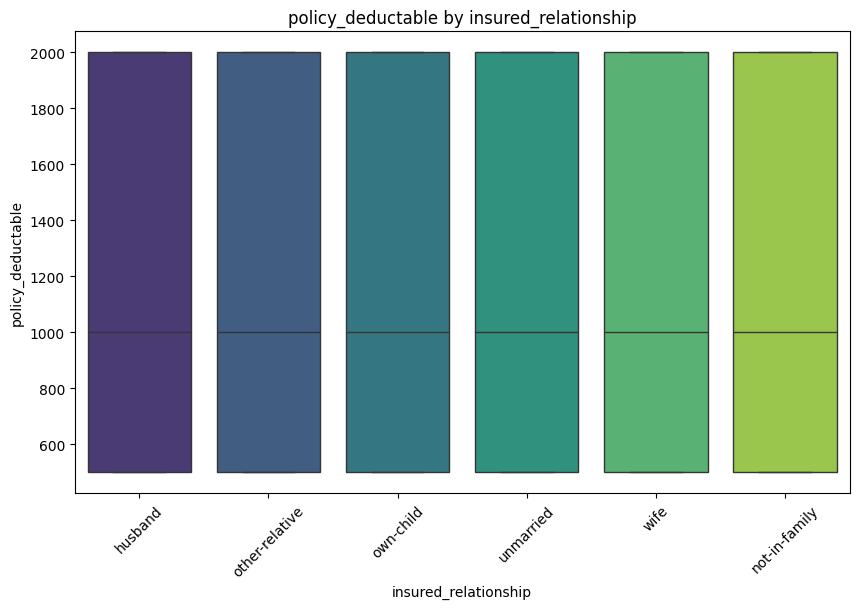

C:\Users\chimi\AppData\Local\Temp\ipykernel_4288\42570619.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=dv, y=fp, data=insurance_claimsdf, palette='viridis')  # Use the column names directly


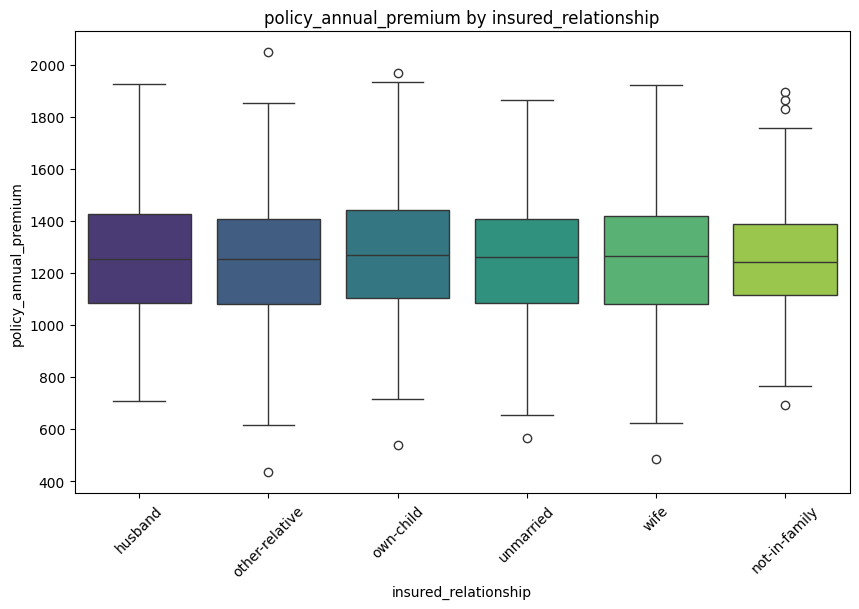

C:\Users\chimi\AppData\Local\Temp\ipykernel_4288\42570619.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=dv, y=fp, data=insurance_claimsdf, palette='viridis')  # Use the column names directly


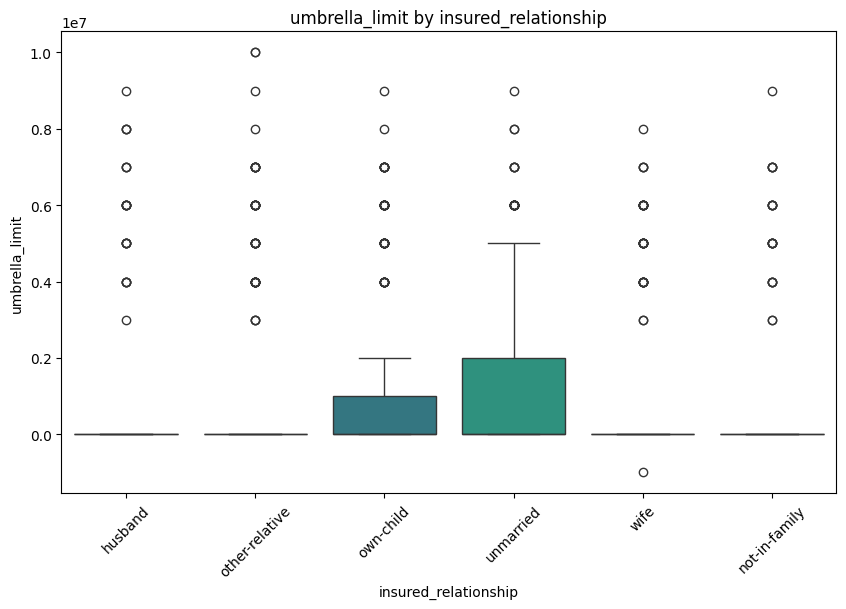

C:\Users\chimi\AppData\Local\Temp\ipykernel_4288\42570619.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=dv, y=fp, data=insurance_claimsdf, palette='viridis')  # Use the column names directly


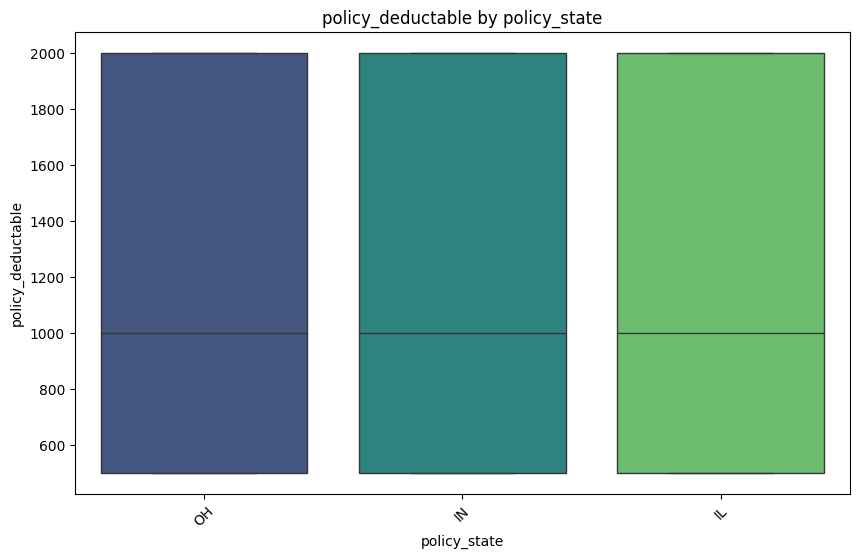

C:\Users\chimi\AppData\Local\Temp\ipykernel_4288\42570619.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=dv, y=fp, data=insurance_claimsdf, palette='viridis')  # Use the column names directly


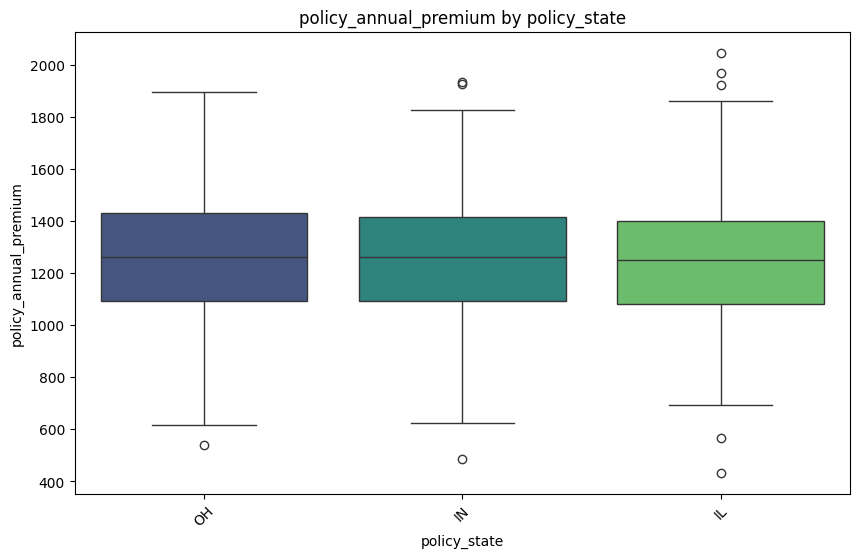

C:\Users\chimi\AppData\Local\Temp\ipykernel_4288\42570619.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=dv, y=fp, data=insurance_claimsdf, palette='viridis')  # Use the column names directly


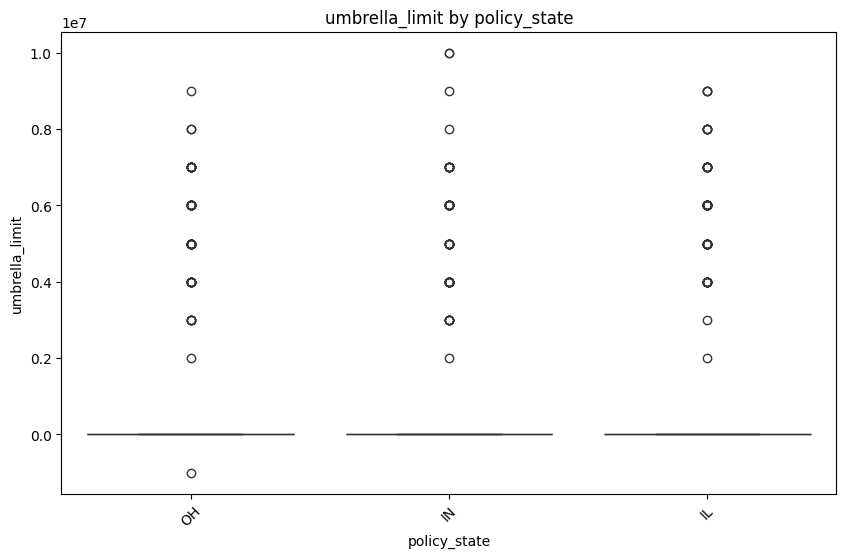

In [43]:
# Demographics and policy csl

# Looking at financial aspect of the policies

for dv in demographic_variables:
    for fp in financial_policy_columns:
        plt.figure(figsize=(10, 6))  # Set the figure size for better readability
        sns.boxplot(x=dv, y=fp, data=insurance_claimsdf, palette='viridis')  # Use the column names directly
        plt.title(f'{fp} by {dv}')  # Set a title for the plot
        plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
        plt.show()  # Display the plot
        
        


#### Observations:
- Policy Premium by Gender: Males and females have equal annual policy premiums.
- Total Claim Amount by Insured Sex: Males and females show an equal distribution of total claim amounts.
- Policy Annual Premium by Insured Education Level: Policyholders with a high school education have a slightly higher median annual premium.
- Total Claim by Insured Education Level: Those with an associate degree have a higher median total claim amount.
- Policy Annual Premium by Insured Occupation: Policyholders from all occupations show varied patterns in policy annual premiums.
- Total Claim Amount by Insured Occupation: Policyholders with various educational backgrounds have different claim amounts.


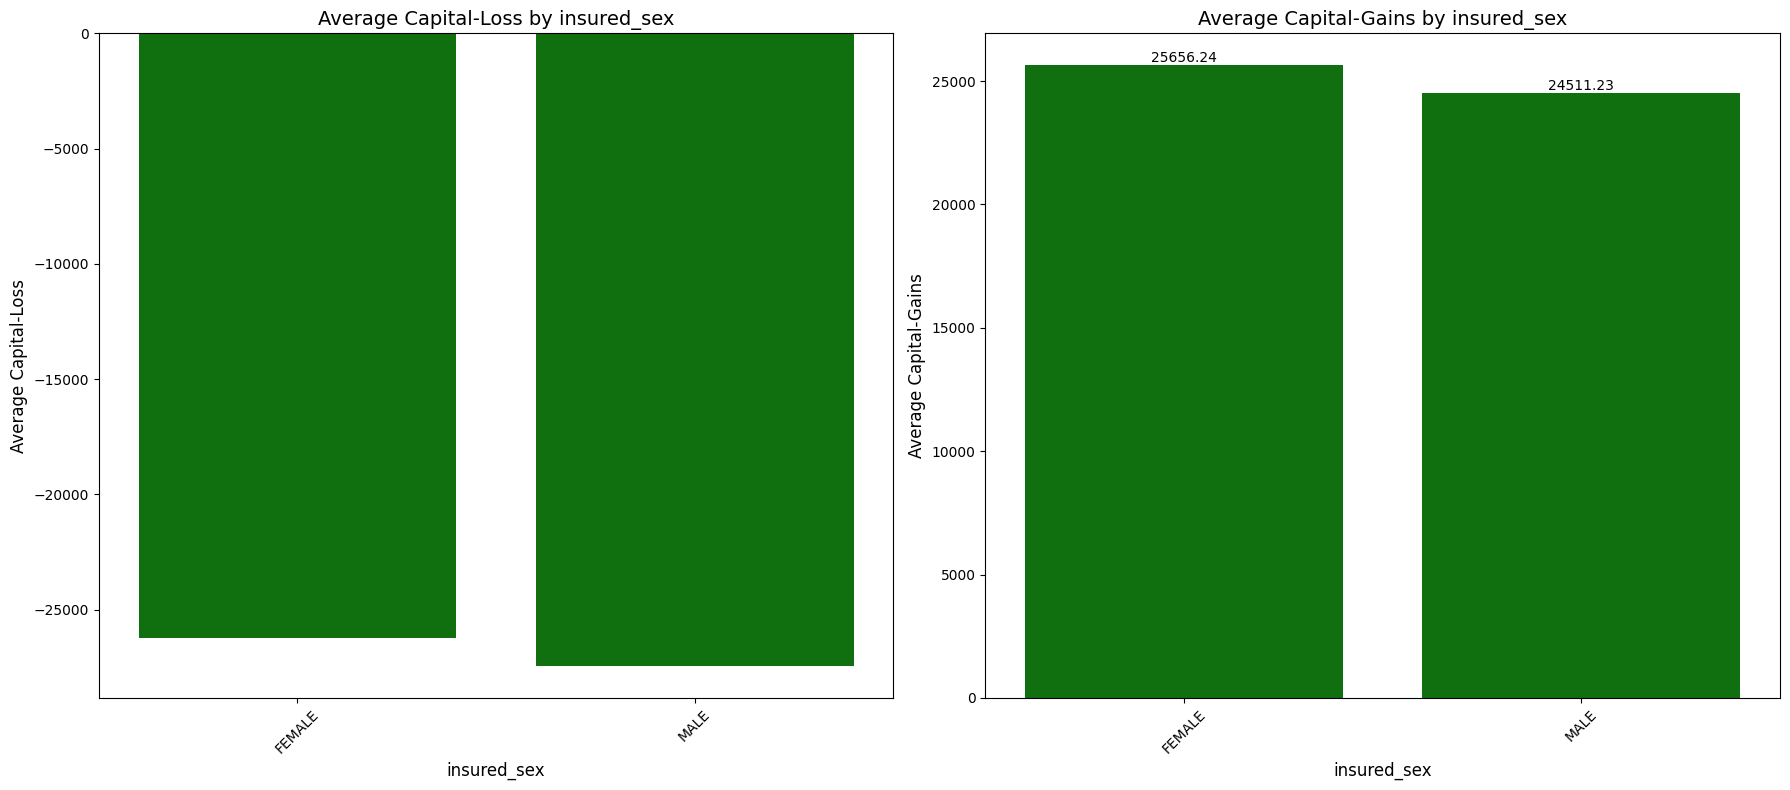

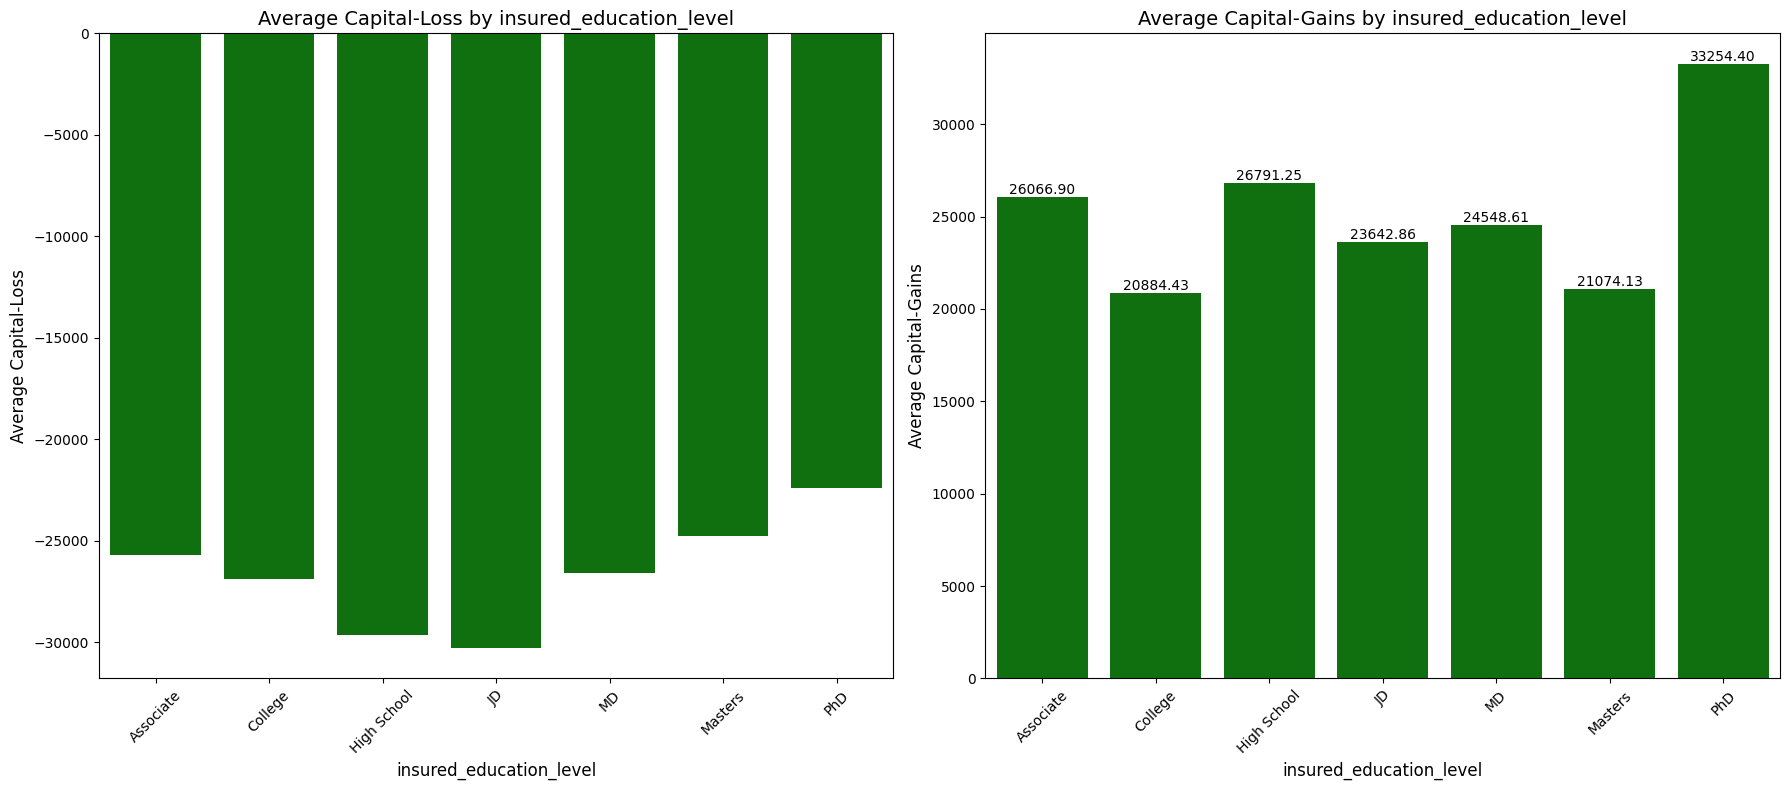

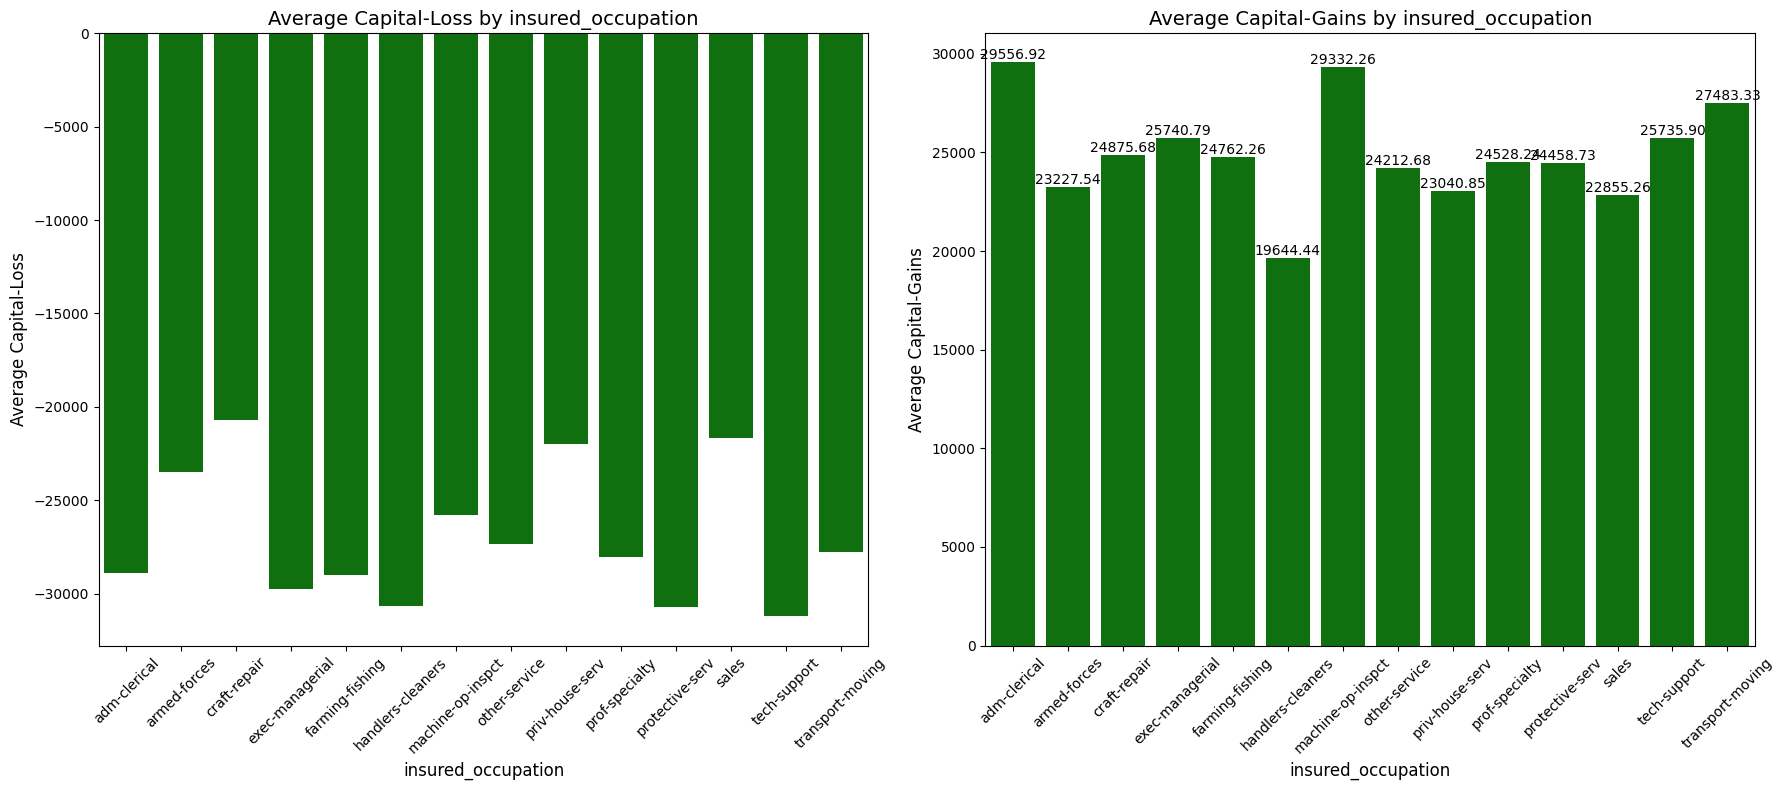

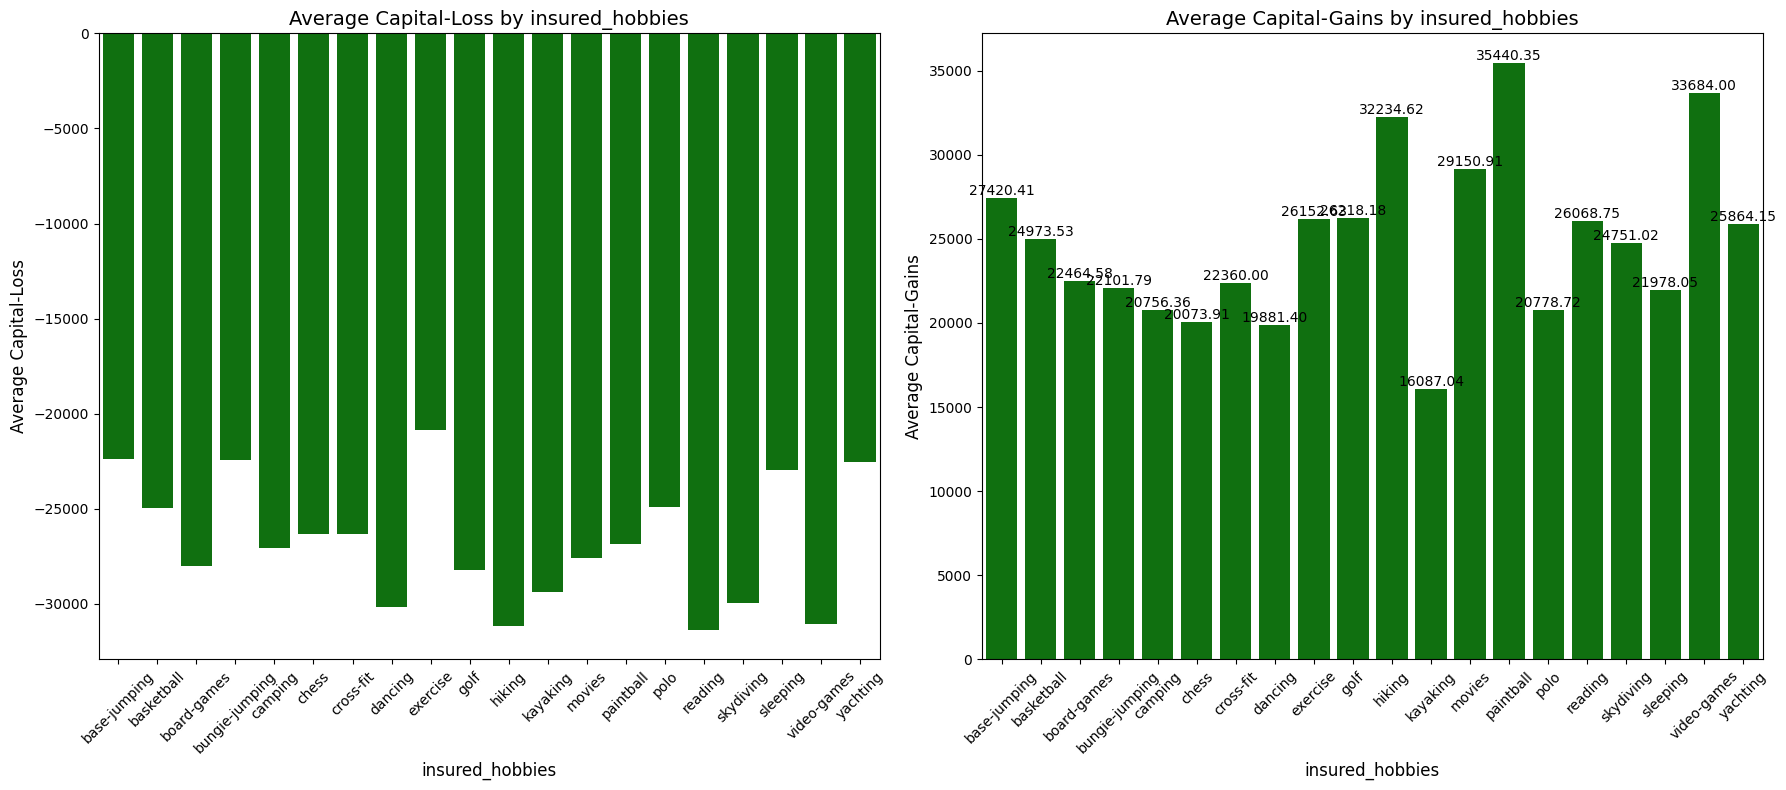

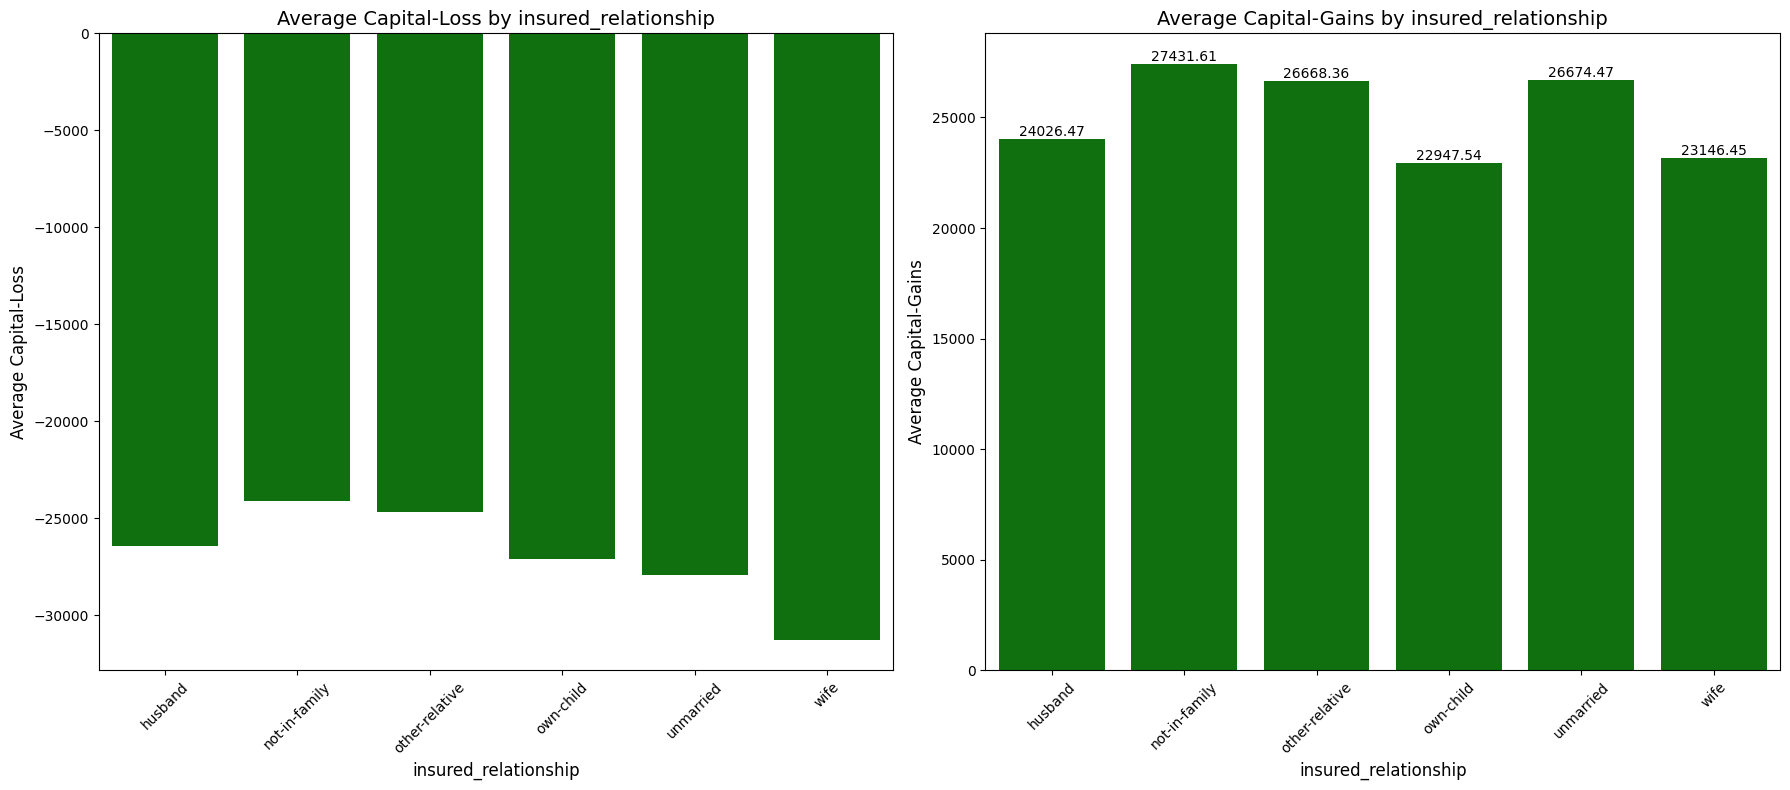

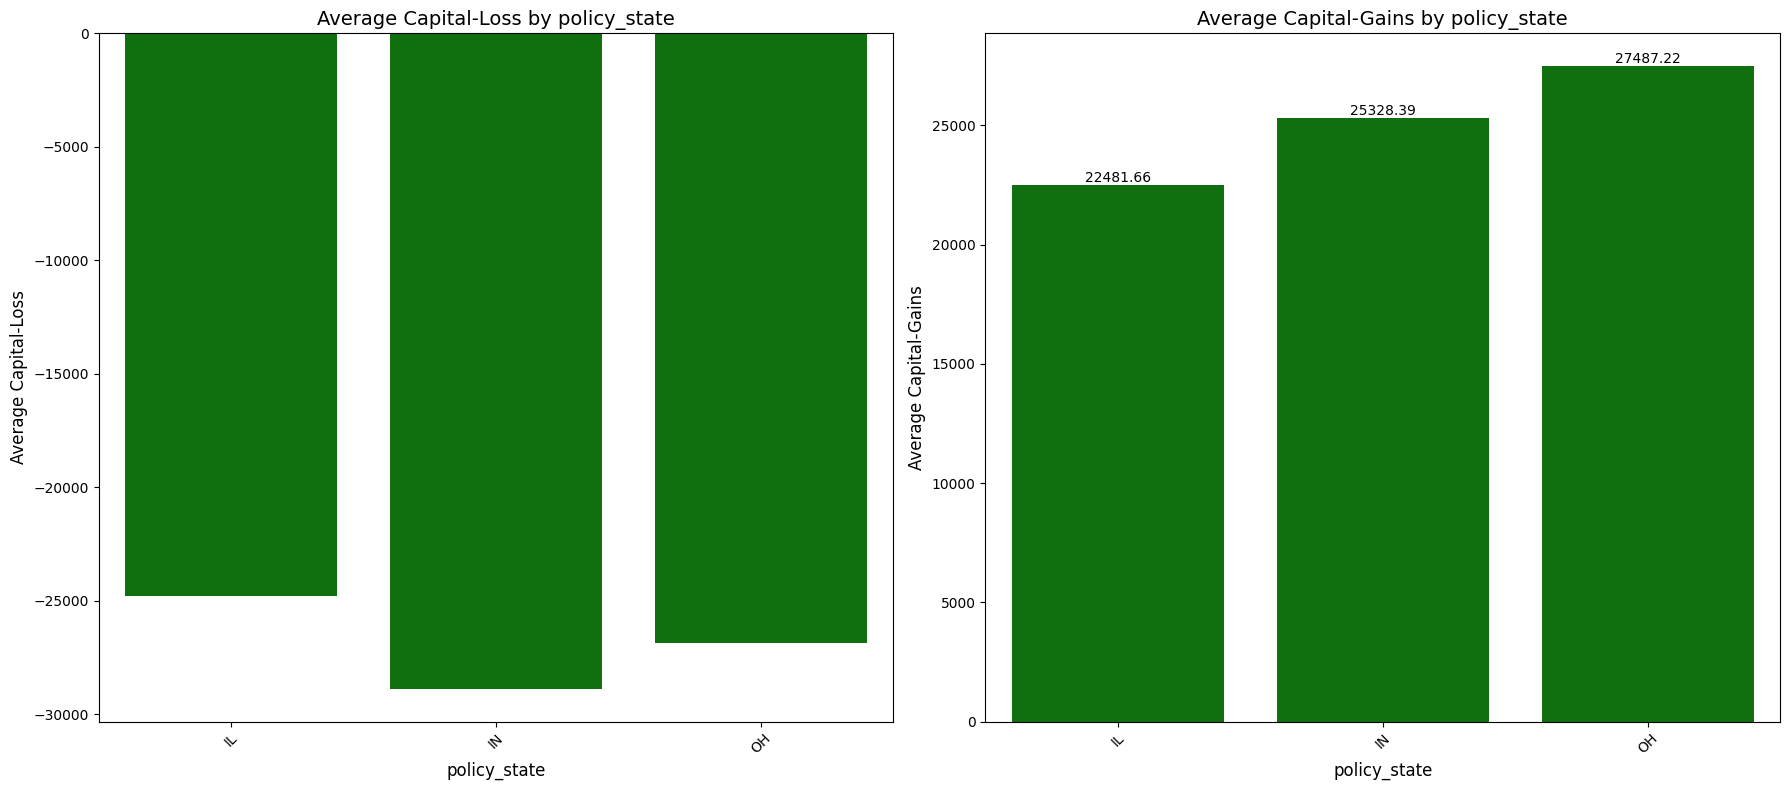

In [44]:
# How does financial loss and gain vary by demographics?


# Choose a color for the bars
bar_color = 'green'  

# Loop through each demographic variable
for dv in demographic_variables:
    # Calculate averages
    capital_loss_avg_by_demographic = insurance_claimsdf.groupby(dv)['capital-loss'].mean().reset_index(name='avg_capital_loss')
    capital_gain_avg_by_demographic = insurance_claimsdf.groupby(dv)['capital-gains'].mean().reset_index(name='avg_capital_gain')

    # Set up the matplotlib figure, larger figure size
    plt.figure(figsize=(18, 8))

    # Plot for average 'capital-loss' as a bar plot
    plt.subplot(1, 2, 1)
    sns.barplot(x=dv, y='avg_capital_loss', data=capital_loss_avg_by_demographic, color=bar_color)
    plt.xticks(rotation=45)
    plt.title(f'Average Capital-Loss by {dv}', fontsize=14)
    plt.xlabel(dv, fontsize=12)
    plt.ylabel('Average Capital-Loss', fontsize=12)
    
    # Plot for average 'capital-gains' as a bar plot
    plt.subplot(1, 2, 2)
    ax2 = sns.barplot(x=dv, y='avg_capital_gain', data=capital_gain_avg_by_demographic, color=bar_color)
    plt.xticks(rotation=45)
    plt.title(f'Average Capital-Gains by {dv}', fontsize=14)  # Adjusted title
    plt.xlabel(dv, fontsize=12)
    plt.ylabel('Average Capital-Gains', fontsize=12)  # Adjusted label
    # Label each bar in ax2 with the height value
    for p in ax2.patches:
        ax2.text(p.get_x() + p.get_width() / 2., p.get_height(), f'{p.get_height():.2f}', 
                 ha='center', va='bottom')

    plt.tight_layout()
    plt.show()


    

C:\Users\chimi\AppData\Local\Temp\ipykernel_4288\2706733019.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=dv, y=fd, data=insurance_claimsdf, palette='Set3')


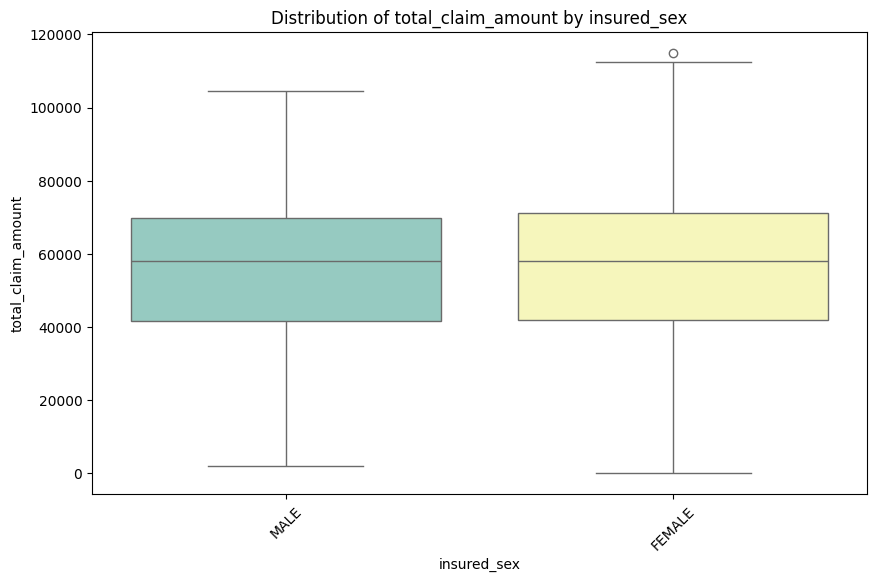

C:\Users\chimi\AppData\Local\Temp\ipykernel_4288\2706733019.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=dv, y=fd, data=insurance_claimsdf, palette='Set3')


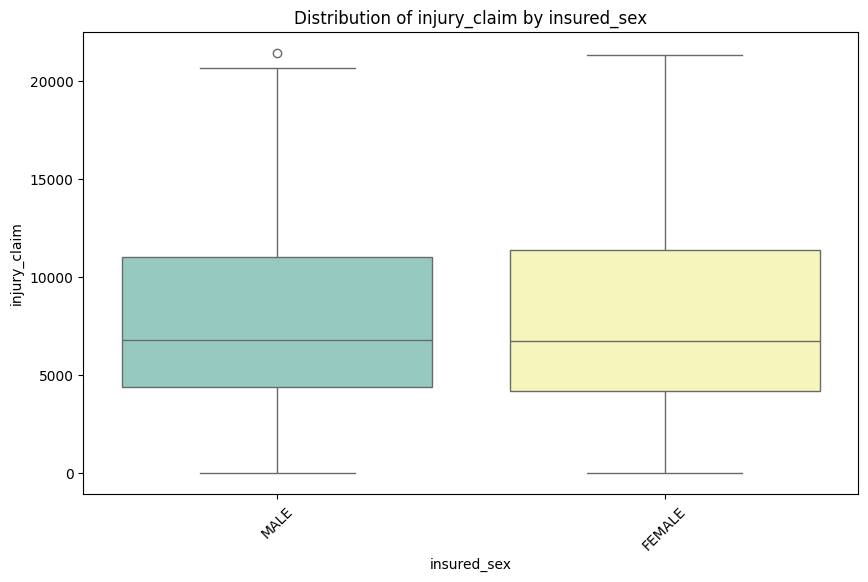

C:\Users\chimi\AppData\Local\Temp\ipykernel_4288\2706733019.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=dv, y=fd, data=insurance_claimsdf, palette='Set3')


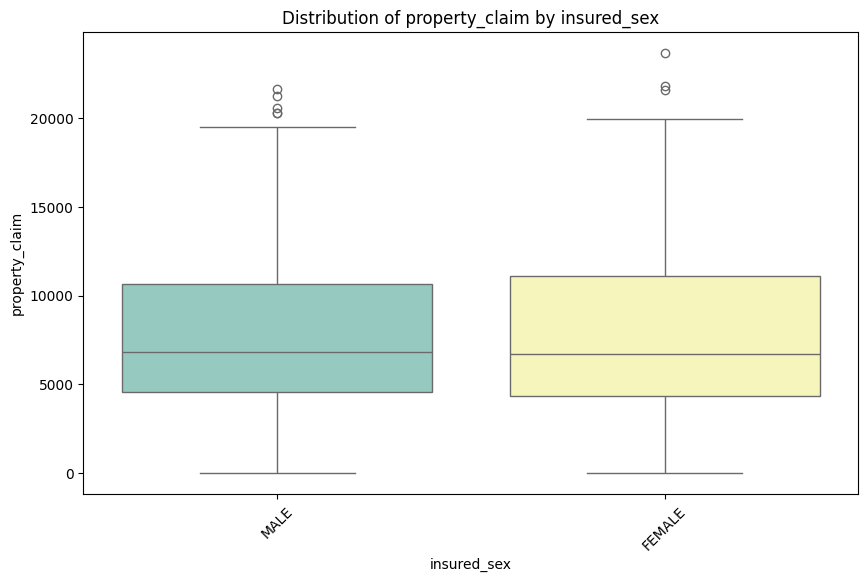

C:\Users\chimi\AppData\Local\Temp\ipykernel_4288\2706733019.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=dv, y=fd, data=insurance_claimsdf, palette='Set3')


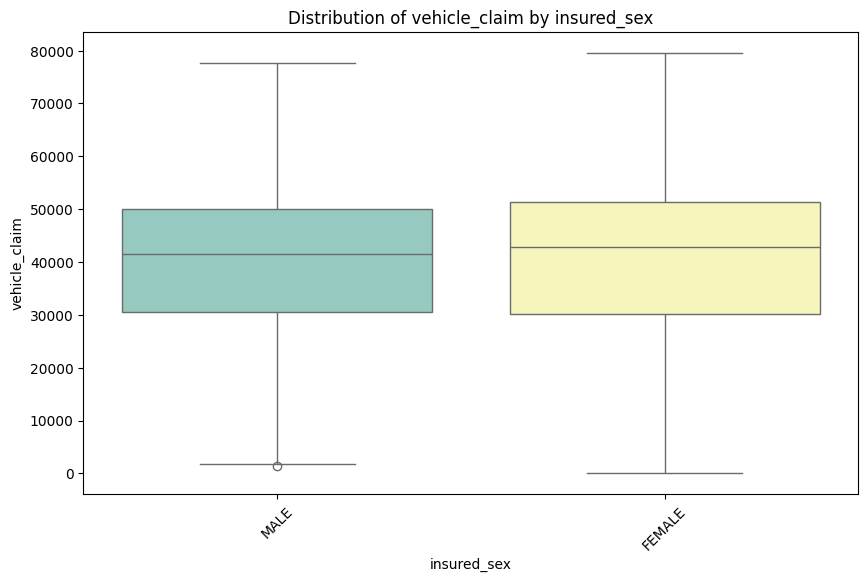

C:\Users\chimi\AppData\Local\Temp\ipykernel_4288\2706733019.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=dv, y=fd, data=insurance_claimsdf, palette='Set3')


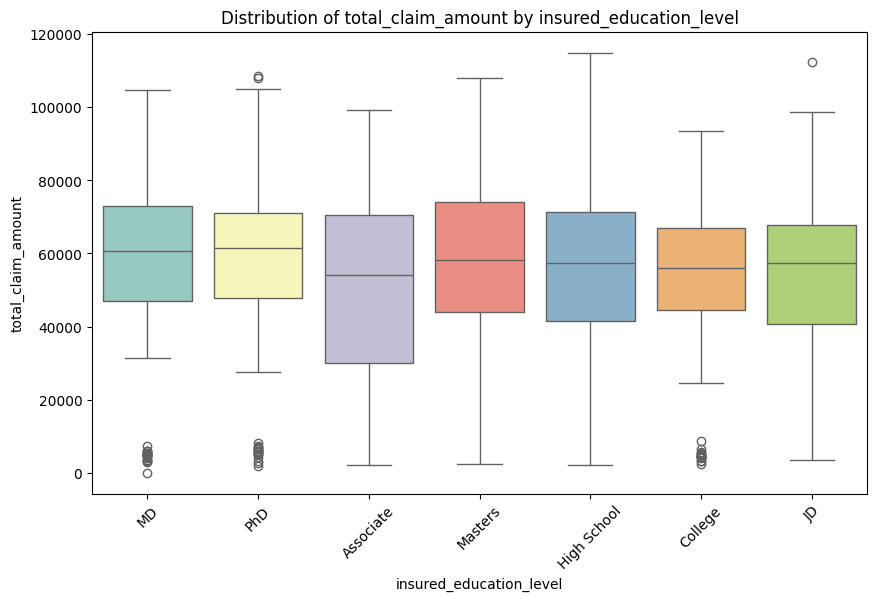

C:\Users\chimi\AppData\Local\Temp\ipykernel_4288\2706733019.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=dv, y=fd, data=insurance_claimsdf, palette='Set3')


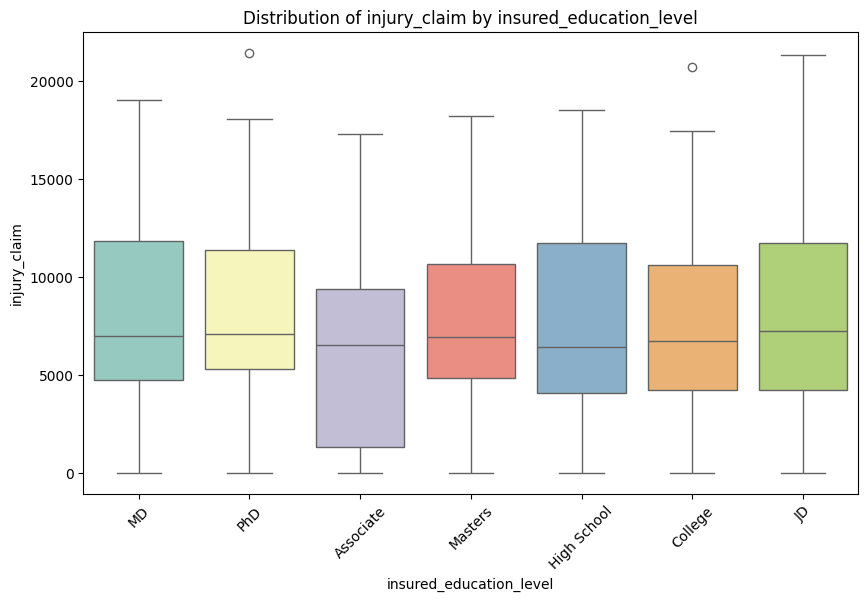

C:\Users\chimi\AppData\Local\Temp\ipykernel_4288\2706733019.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=dv, y=fd, data=insurance_claimsdf, palette='Set3')


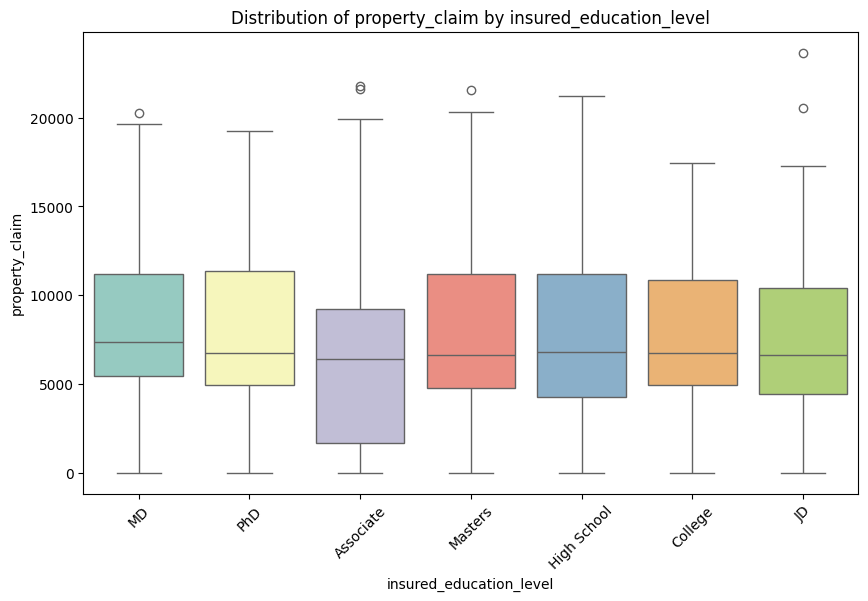

C:\Users\chimi\AppData\Local\Temp\ipykernel_4288\2706733019.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=dv, y=fd, data=insurance_claimsdf, palette='Set3')


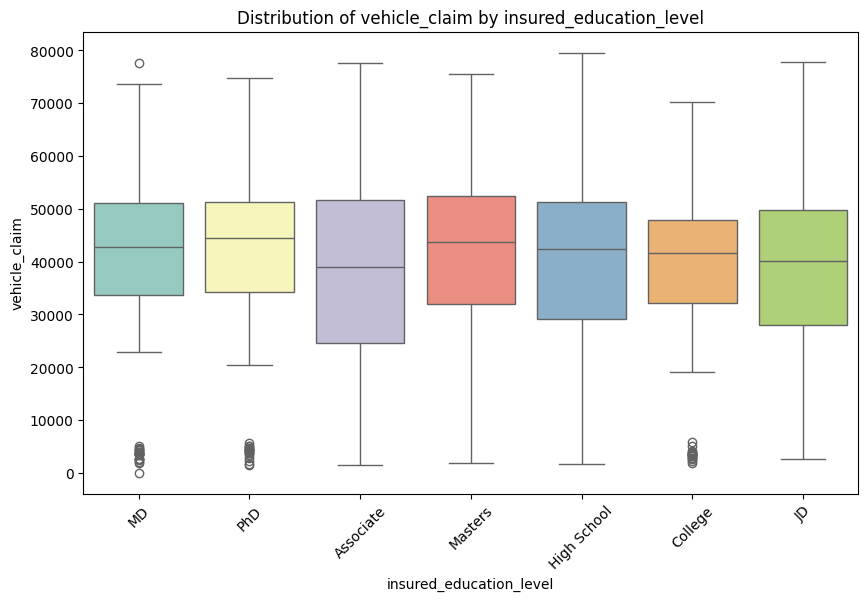

C:\Users\chimi\AppData\Local\Temp\ipykernel_4288\2706733019.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=dv, y=fd, data=insurance_claimsdf, palette='Set3')


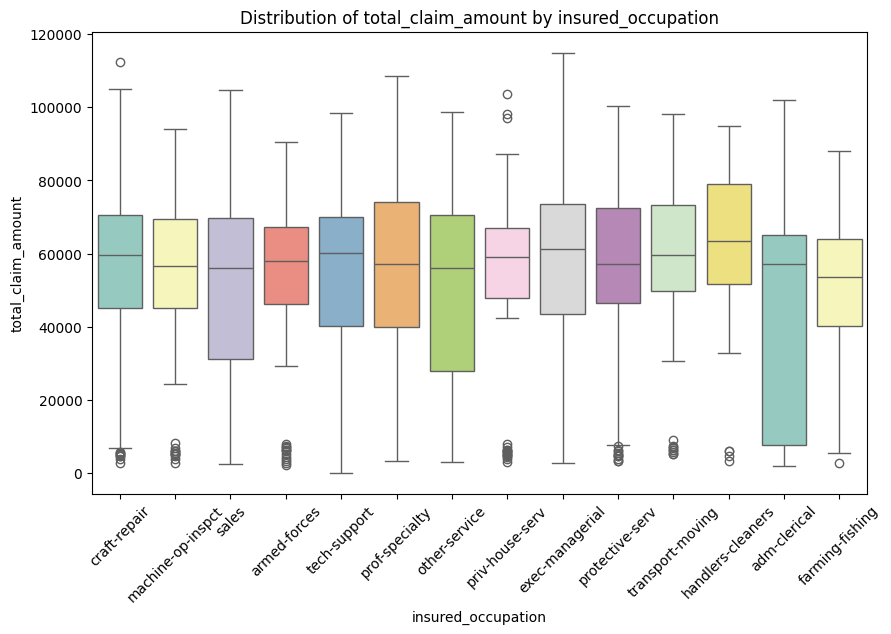

C:\Users\chimi\AppData\Local\Temp\ipykernel_4288\2706733019.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=dv, y=fd, data=insurance_claimsdf, palette='Set3')


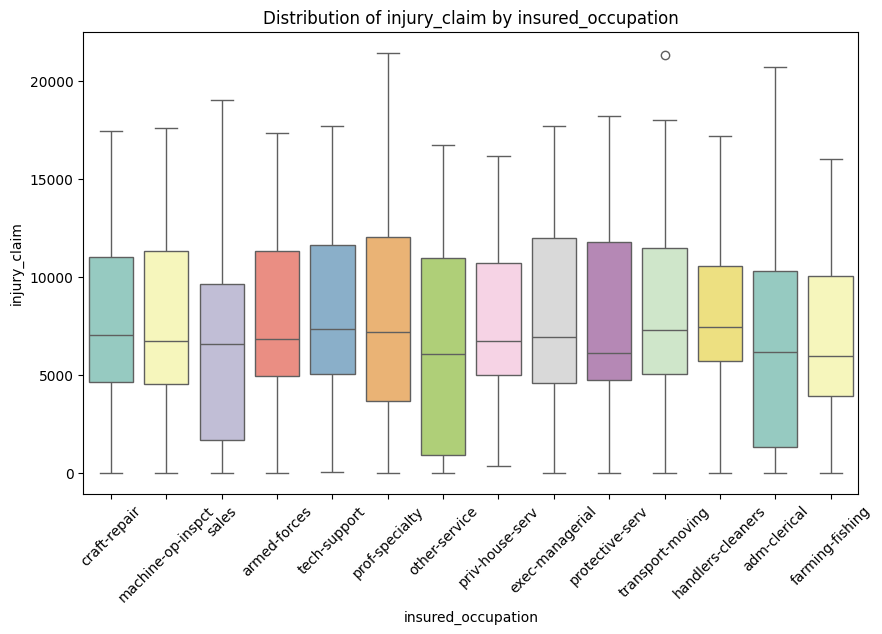

C:\Users\chimi\AppData\Local\Temp\ipykernel_4288\2706733019.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=dv, y=fd, data=insurance_claimsdf, palette='Set3')


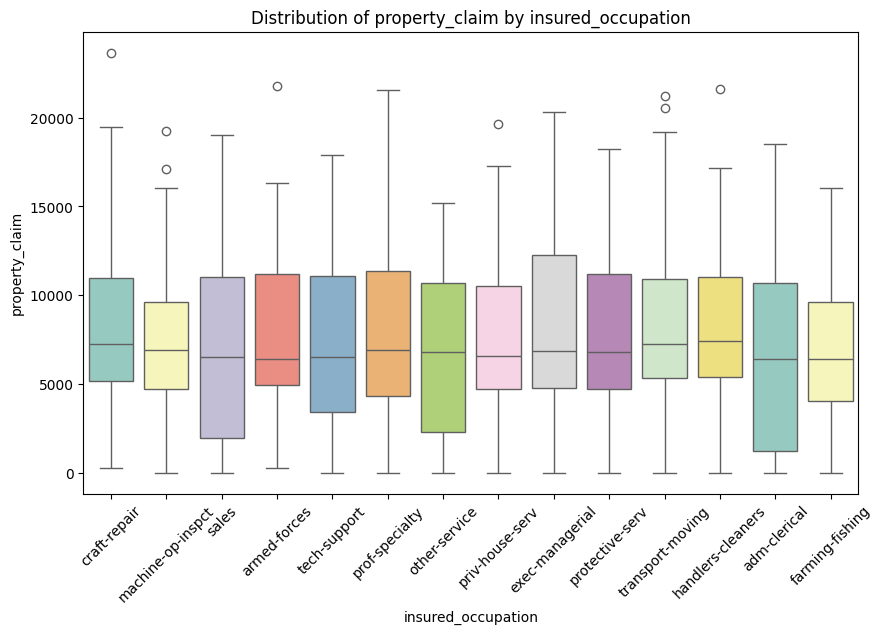

C:\Users\chimi\AppData\Local\Temp\ipykernel_4288\2706733019.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=dv, y=fd, data=insurance_claimsdf, palette='Set3')


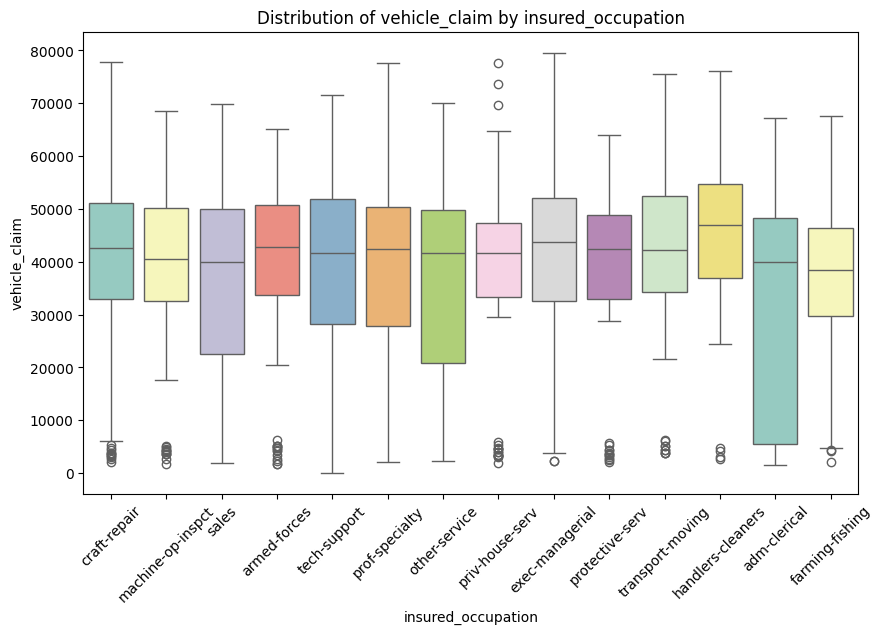

C:\Users\chimi\AppData\Local\Temp\ipykernel_4288\2706733019.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=dv, y=fd, data=insurance_claimsdf, palette='Set3')


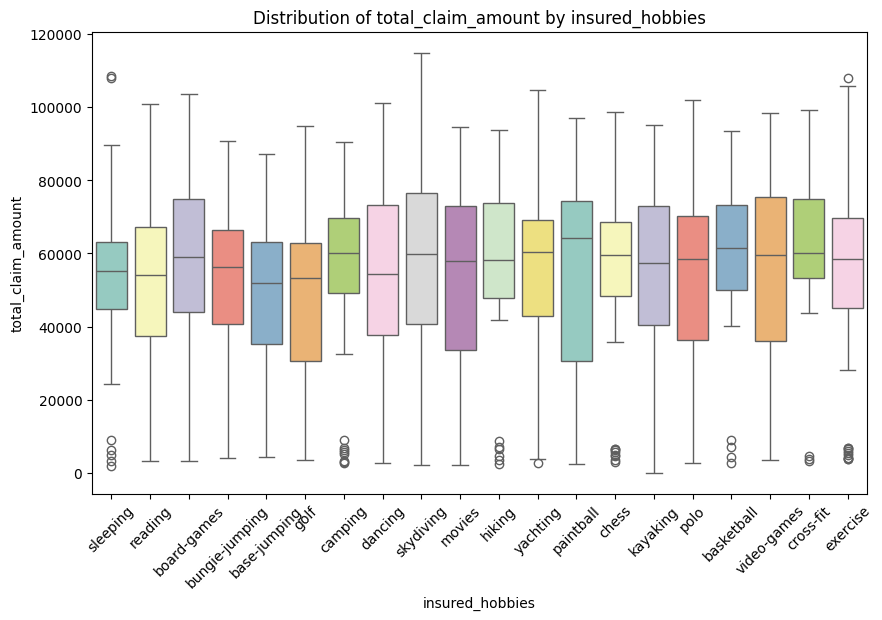

C:\Users\chimi\AppData\Local\Temp\ipykernel_4288\2706733019.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=dv, y=fd, data=insurance_claimsdf, palette='Set3')


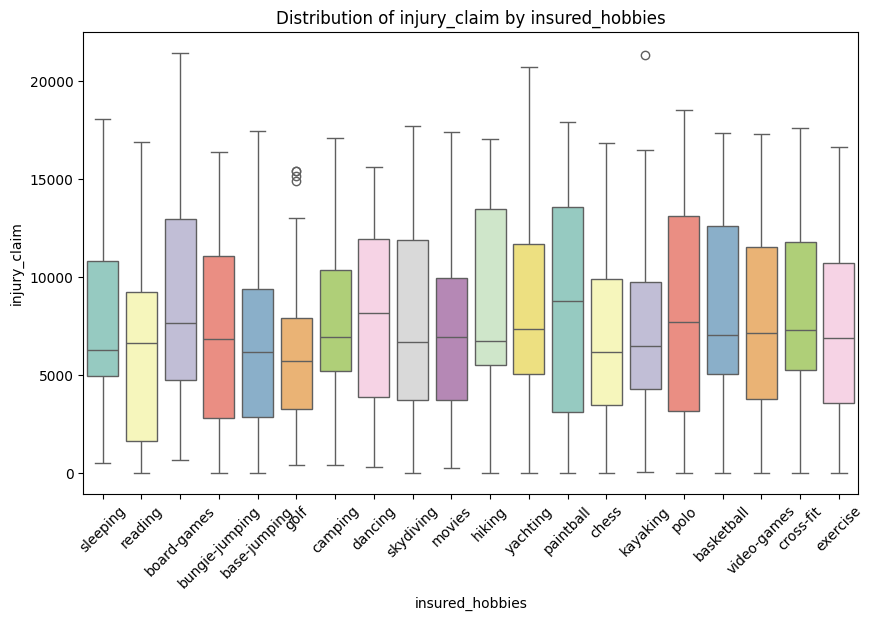

C:\Users\chimi\AppData\Local\Temp\ipykernel_4288\2706733019.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=dv, y=fd, data=insurance_claimsdf, palette='Set3')


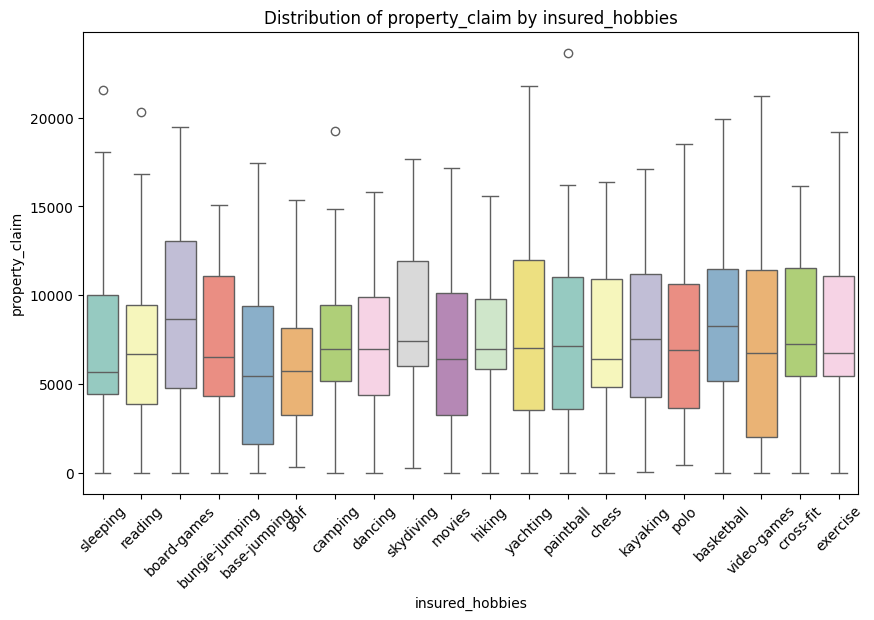

C:\Users\chimi\AppData\Local\Temp\ipykernel_4288\2706733019.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=dv, y=fd, data=insurance_claimsdf, palette='Set3')


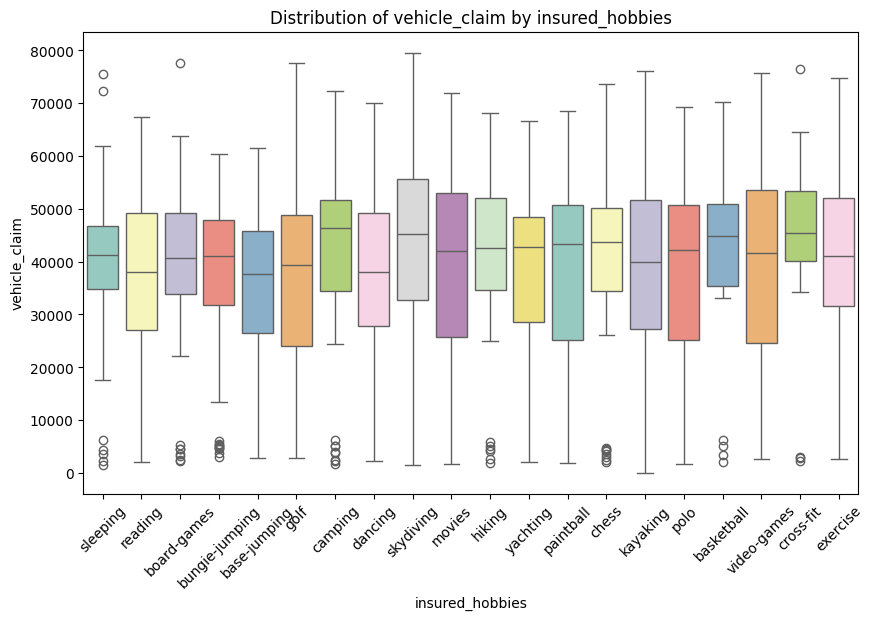

C:\Users\chimi\AppData\Local\Temp\ipykernel_4288\2706733019.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=dv, y=fd, data=insurance_claimsdf, palette='Set3')


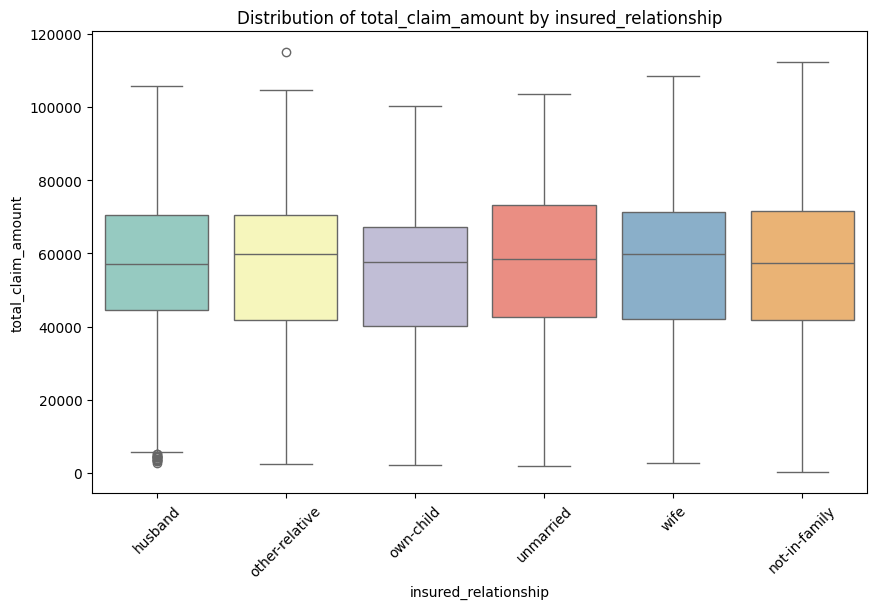

C:\Users\chimi\AppData\Local\Temp\ipykernel_4288\2706733019.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=dv, y=fd, data=insurance_claimsdf, palette='Set3')


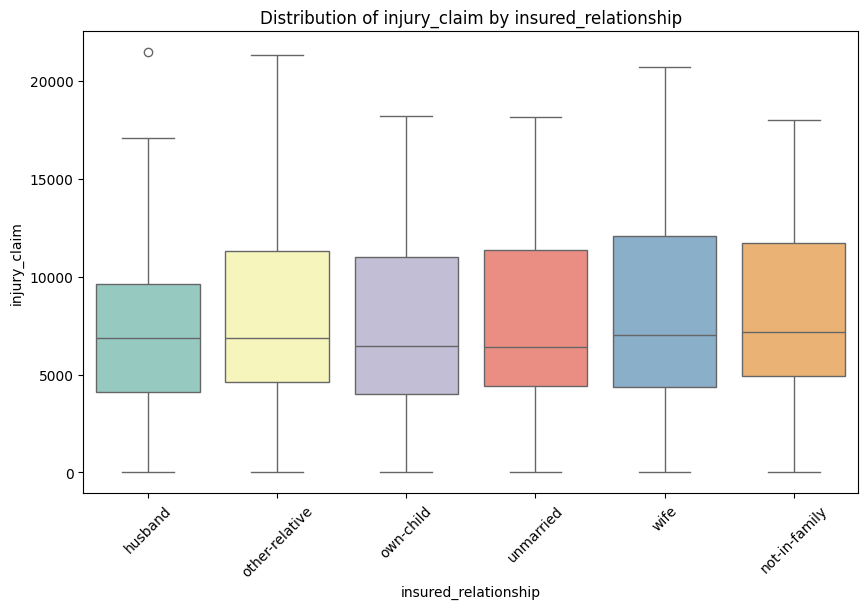

C:\Users\chimi\AppData\Local\Temp\ipykernel_4288\2706733019.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=dv, y=fd, data=insurance_claimsdf, palette='Set3')


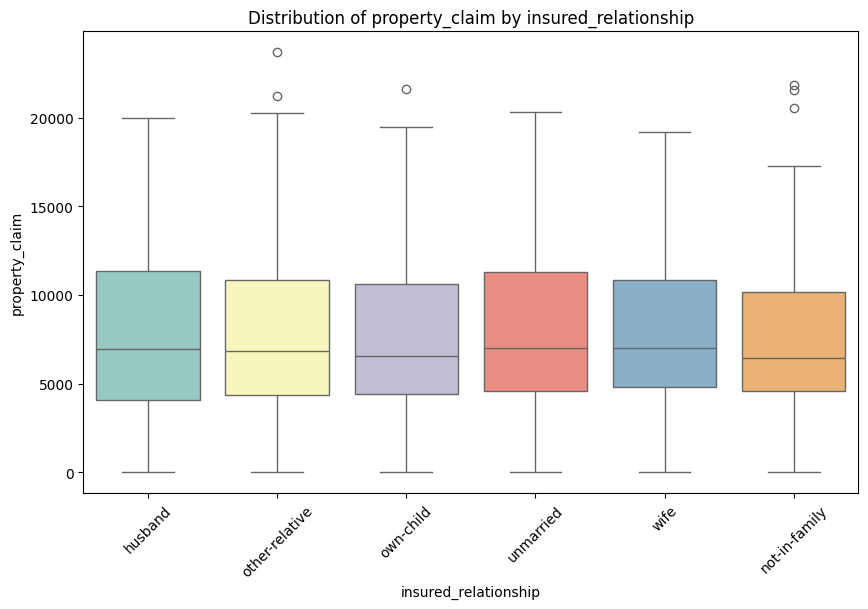

C:\Users\chimi\AppData\Local\Temp\ipykernel_4288\2706733019.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=dv, y=fd, data=insurance_claimsdf, palette='Set3')


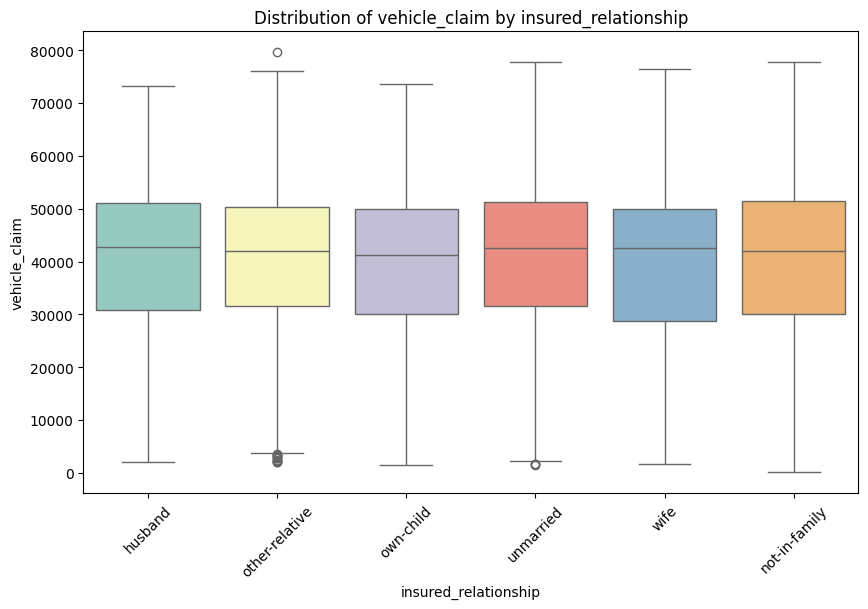

C:\Users\chimi\AppData\Local\Temp\ipykernel_4288\2706733019.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=dv, y=fd, data=insurance_claimsdf, palette='Set3')


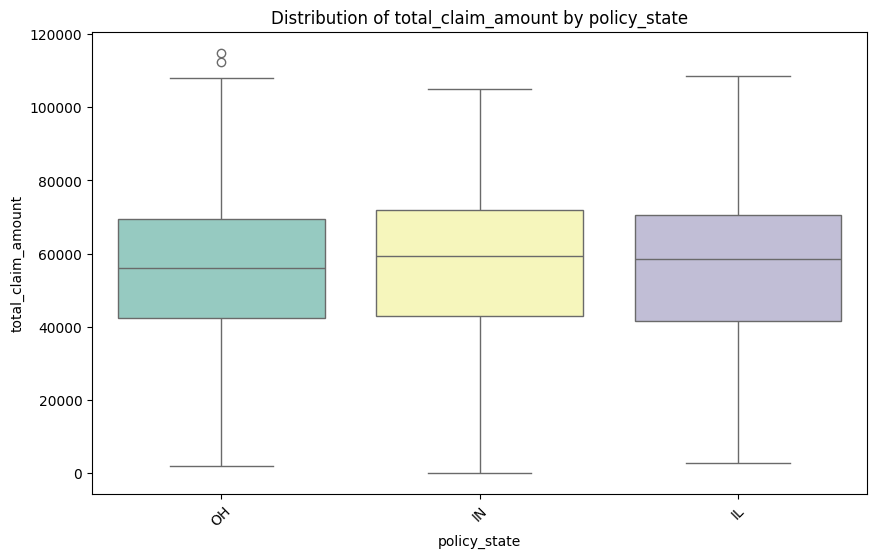

C:\Users\chimi\AppData\Local\Temp\ipykernel_4288\2706733019.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=dv, y=fd, data=insurance_claimsdf, palette='Set3')


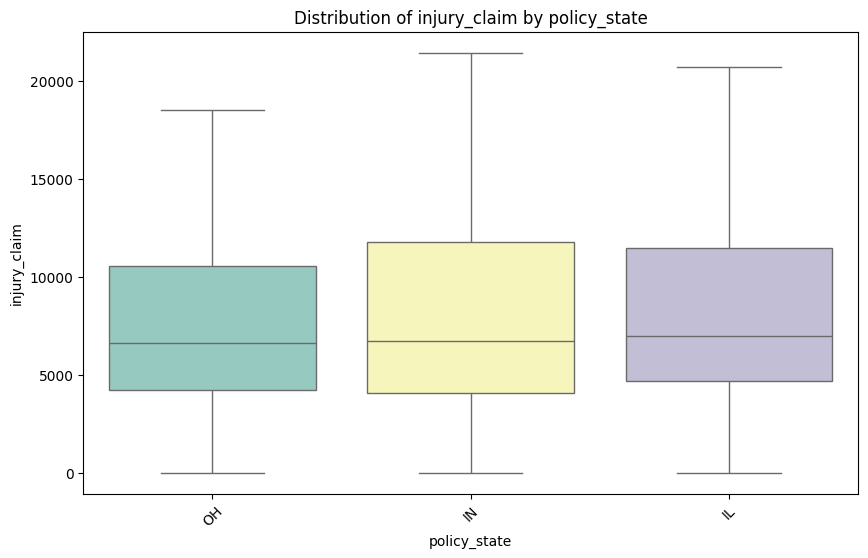

C:\Users\chimi\AppData\Local\Temp\ipykernel_4288\2706733019.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=dv, y=fd, data=insurance_claimsdf, palette='Set3')


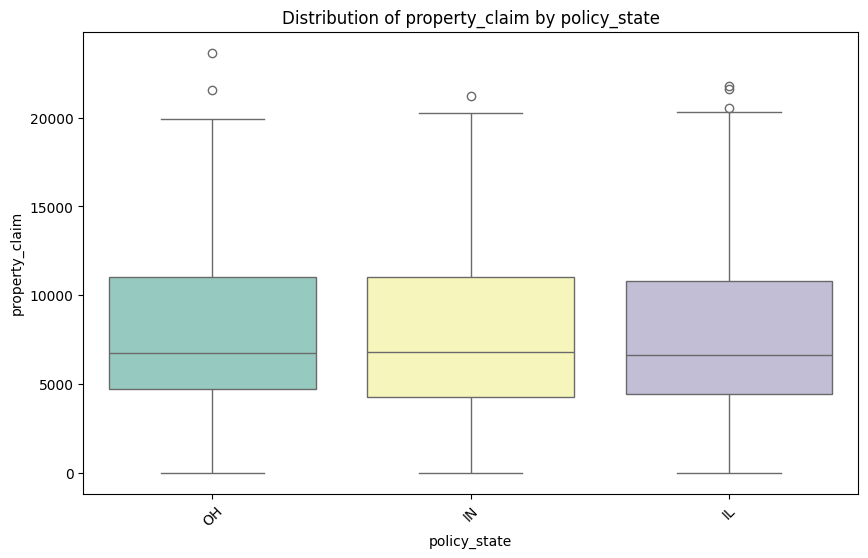

C:\Users\chimi\AppData\Local\Temp\ipykernel_4288\2706733019.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=dv, y=fd, data=insurance_claimsdf, palette='Set3')


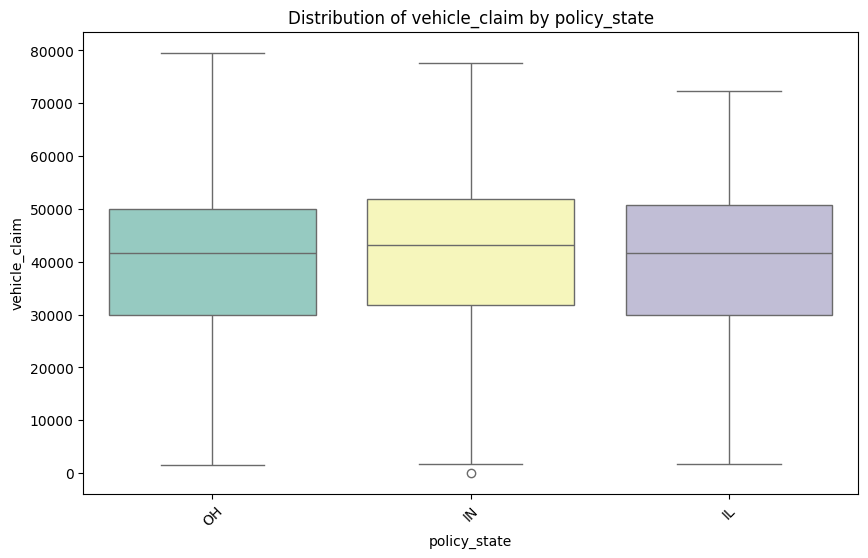

In [45]:
# How do the financial claims vary by demographics?


for dv in demographic_variables:
    for fd in financial_claims_details:
        plt.figure(figsize=(10, 6))
        sns.boxplot(x=dv, y=fd, data=insurance_claimsdf, palette='Set3')
        plt.title(f'Distribution of {fd} by {dv}')
        plt.xlabel(dv)
        plt.ylabel(fd)
        plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability if necessary
        plt.show()

#### Observations:
 - There are no distinct patterns in this plots. 

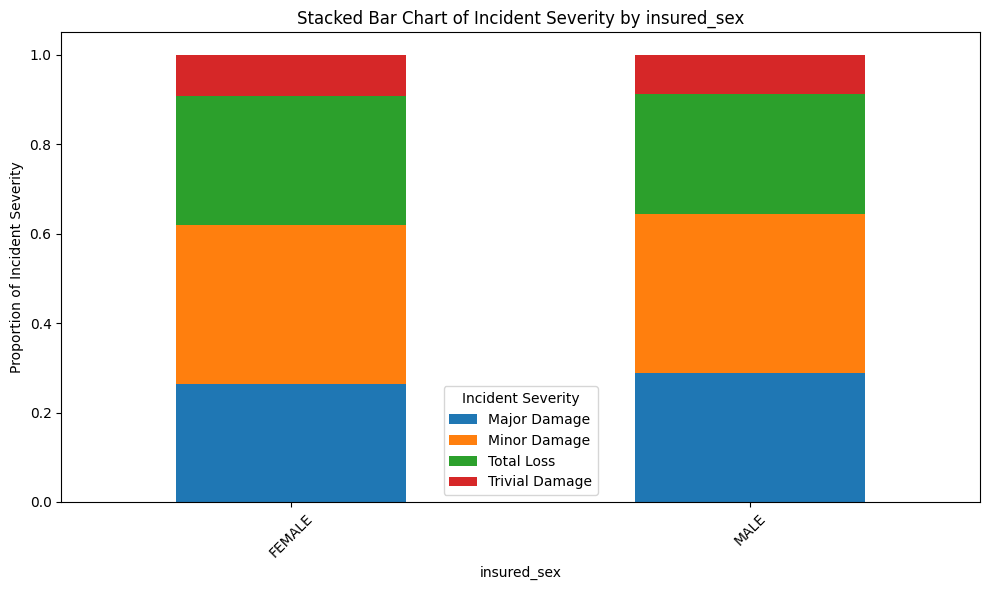

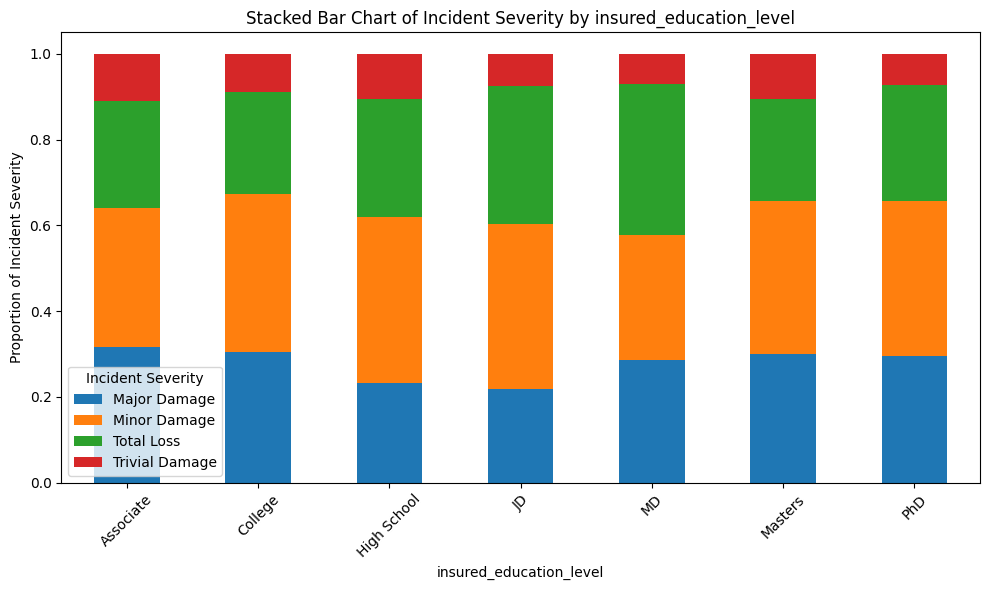

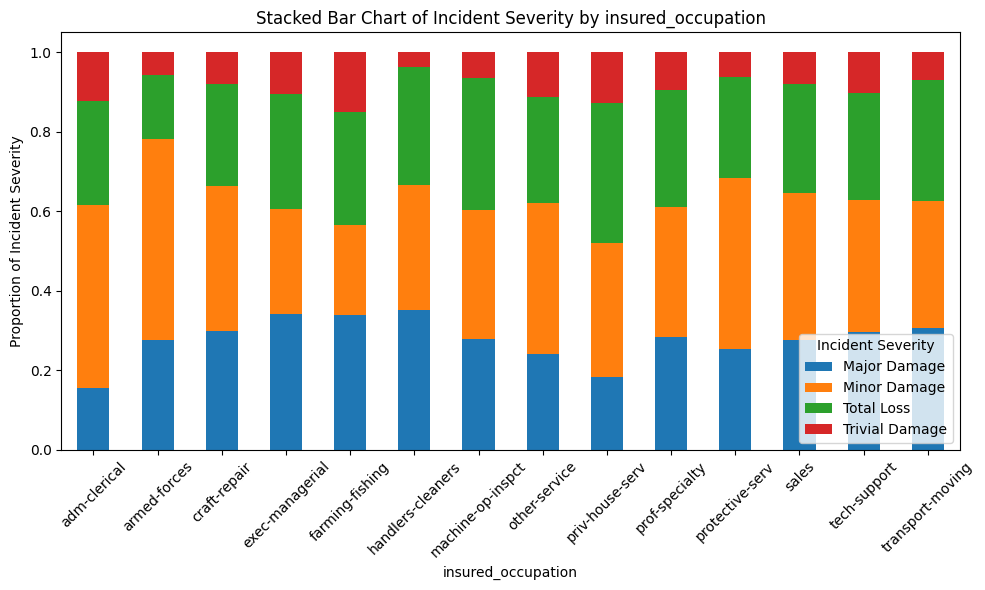

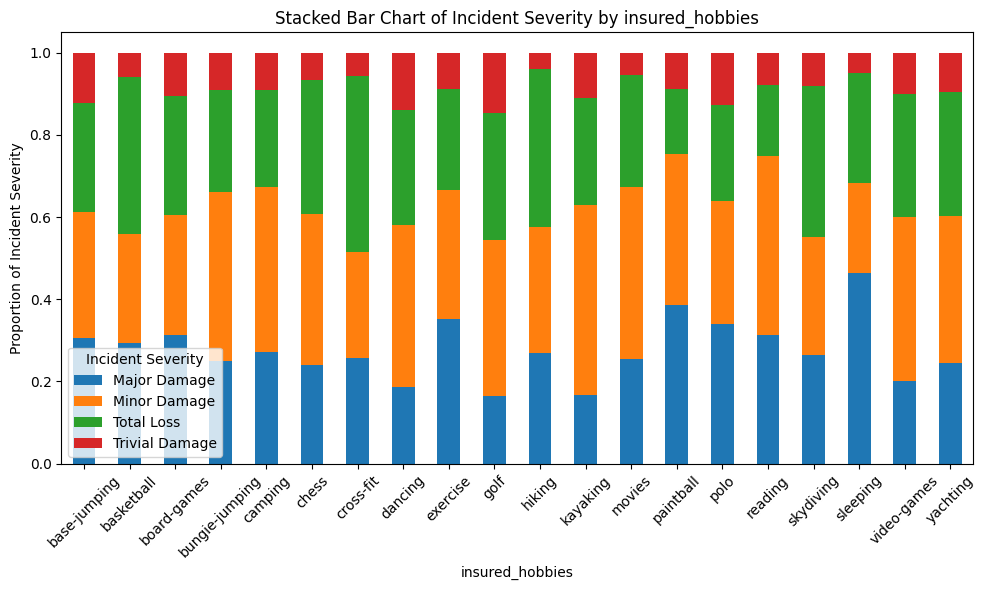

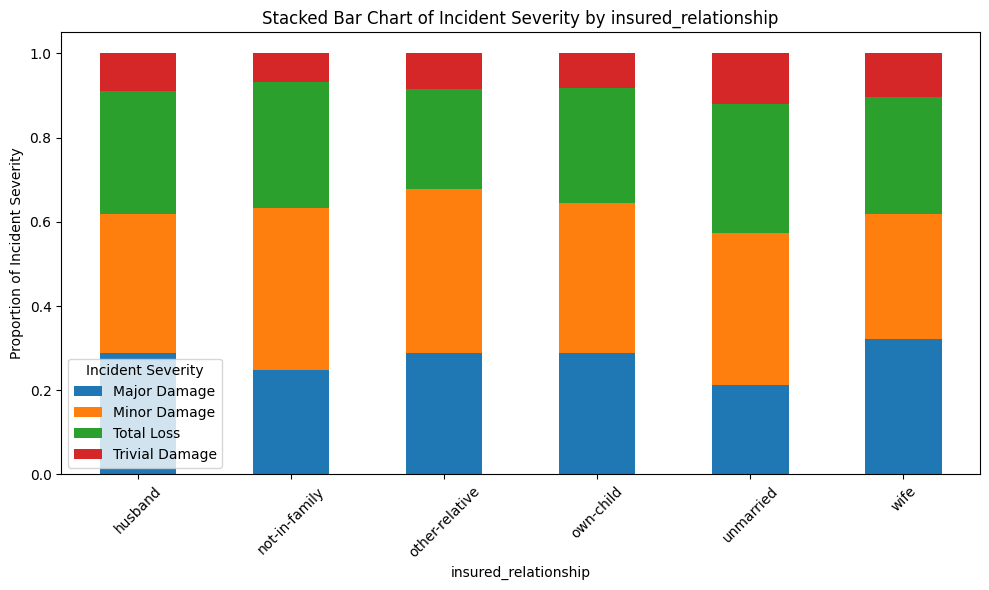

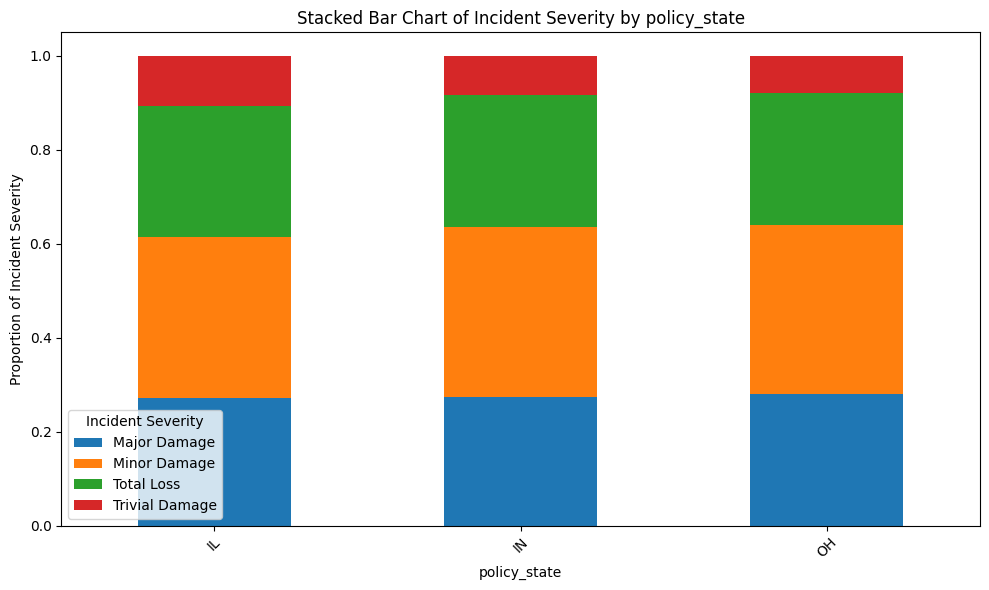

In [46]:
# How does the incident severity differ by demographics?

# Loop through the demographic variables to create stacked bar charts
for variable in demographic_variables:
    # Create a crosstab with normalized values (proportions)
    crosstab = pd.crosstab(insurance_claimsdf[variable], insurance_claimsdf['incident_severity'], normalize='index')

    # Create a stacked bar chart
    crosstab.plot(kind='bar', stacked=True, figsize=(10, 6))
    plt.title(f'Stacked Bar Chart of Incident Severity by {variable}')
    plt.xlabel(variable)
    plt.ylabel('Proportion of Incident Severity')
    plt.xticks(rotation=45)  # Rotate for better label readability if needed
    plt.legend(title='Incident Severity')
    plt.tight_layout()  # Adjust layout
    plt.show()

#### Observations:
- Insured Sex: There is definite equal distribution in the incident severity between the sexes. However, the severity classes have somewhat dffering distributions.
- Insured Education Level: Based on the plot, it appears that incident severity and education levels may differ slightly, especially in cases of % of more severe occurence.
- Insured Occupation: There are somewhat visible differenc in incident severity across different occupation, giving us an insight that some occupations might be associated with different risk and serverities of incidents.
- Insured Relationship: There is a variation in the incident severity based on relationship status, causing in variation in driving behaviors and vehicle use patterns.

In [47]:
# How does policy coverage levels differ by incident severity?


# Crosstabulation between 'policy_csl' and 'incident_severity'
crosstab_policy_incident = pd.crosstab(index=insurance_claimsdf['policy_csl'], 
                                       columns=insurance_claimsdf['incident_severity'], 
                                       normalize='index')

# Plotting the stacked bar chart
crosstab_policy_incident.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
plt.title('Incident Severity by Policy CSL')
plt.xlabel('Policy CSL')
plt.ylabel('Proportion of Incident Severity')
plt.xticks(rotation=0)  # Keep the x-axis labels horizontal for readability
plt.legend(title='Incident Severity', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

#### Observations:

- The proportion of incident Severity displays that it varies. There are some policies coverage which can be associated with higher severity levels. 

C:\Users\chimi\AppData\Local\Temp\ipykernel_4288\3247674588.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='incident_severity', y=col, data=insurance_claimsdf, ax=axes[i], palette='viridis')
C:\Users\chimi\AppData\Local\Temp\ipykernel_4288\3247674588.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='incident_severity', y=col, data=insurance_claimsdf, ax=axes[i], palette='viridis')
C:\Users\chimi\AppData\Local\Temp\ipykernel_4288\3247674588.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='incident_severity', y=col, 

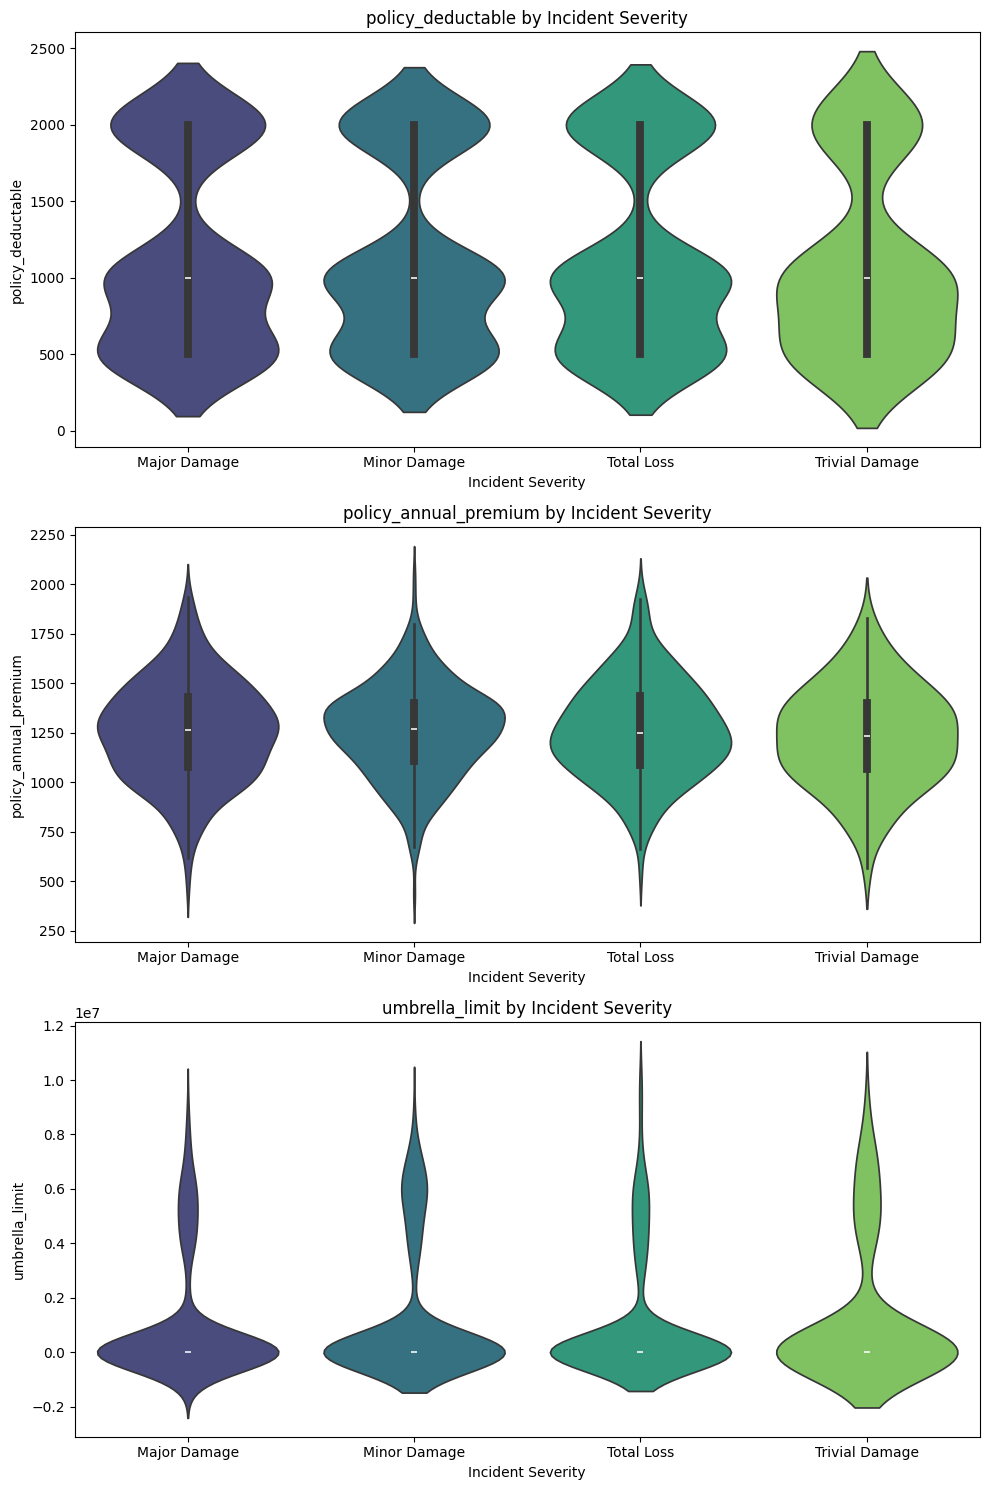

In [48]:
# How does the finances in terms of policy differ by incident level?

# Set up the matplotlib figure
fig, axes = plt.subplots(len(financial_policy_columns), 1, figsize=(10, 15))

# Create violin plots for each financial policy column against 'incident_severity'
for i, col in enumerate(financial_policy_columns):
    sns.violinplot(x='incident_severity', y=col, data=insurance_claimsdf, ax=axes[i], palette='viridis')
    axes[i].set_title(f'{col} by Incident Severity')
    axes[i].set_xlabel('Incident Severity')
    axes[i].set_ylabel(col)

plt.tight_layout()
plt.show()



In [49]:
# Conducting ANOVA for 'total_claim_amount' across different 'incident_severity' groups

# ANOVA test for 'policy_deductable' across different levels of 'incident_severity'

policy_deductable_anova = stats.f_oneway(*[insurance_claimsdf[insurance_claimsdf['incident_severity'] == level]['policy_deductable']
                                            for level in insurance_claimsdf['incident_severity'].unique()])
policy_deductable_anova




F_onewayResult(statistic=0.19564731069873972, pvalue=0.8993874018944209)

In [50]:
# ANOVA test for 'policy_annual_premium' across different levels of 'incident_severity'
policy_annual_premium_anova = stats.f_oneway(*[insurance_claimsdf[insurance_claimsdf['incident_severity'] == level]['policy_annual_premium']
                                                for level in insurance_claimsdf['incident_severity'].unique()])
policy_annual_premium_anova

F_onewayResult(statistic=0.4575980265766533, pvalue=0.7119846014290616)

In [51]:
# ANOVA test for 'umbrella_limit' across different levels of 'incident_severity'
umbrella_limit_anova = stats.f_oneway(*[insurance_claimsdf[insurance_claimsdf['incident_severity'] == level]['umbrella_limit']
                                         for level in insurance_claimsdf['incident_severity']. unique()])
umbrella_limit_anova

F_onewayResult(statistic=0.8397064509737334, pvalue=0.4721904573489395)

#### Observation:
- The same result was obtained from each test run separately as from the tests run collectively: there is no evidence to suggest any of the variables differ in means significantly with respect to the incident severity levels.ls.

In [52]:
# Drop 
insurance_claimsdf.drop(columns=['authorities_contacted'], axis=0, inplace=True)

C:\Users\chimi\AppData\Local\Temp\ipykernel_4288\2016711371.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='incident_severity', y=col, data=insurance_claimsdf, ax=axes[i], palette='viridis')
C:\Users\chimi\AppData\Local\Temp\ipykernel_4288\2016711371.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='incident_severity', y=col, data=insurance_claimsdf, ax=axes[i], palette='viridis')
C:\Users\chimi\AppData\Local\Temp\ipykernel_4288\2016711371.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='incident_severity', y=col, 

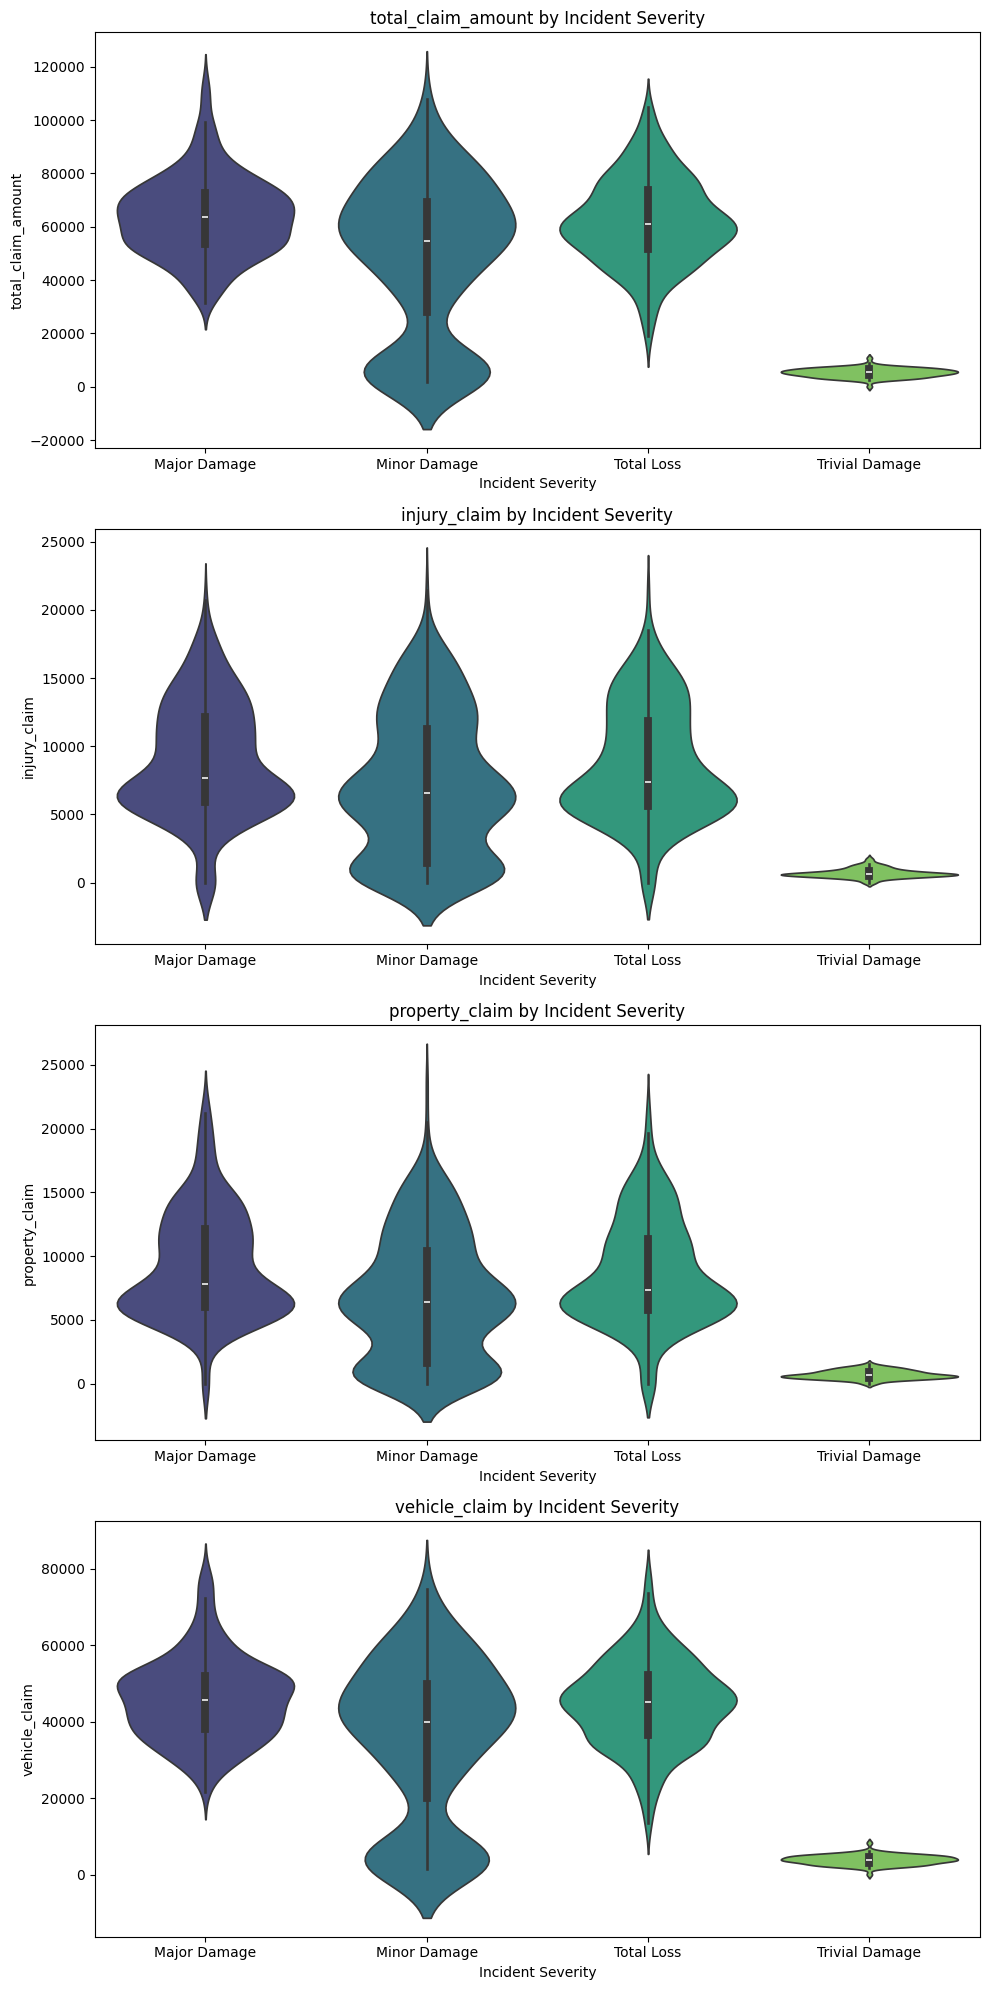

In [53]:
# How does the financial claims vary by incident level?

# Set up the matplotlib figure
fig, axes = plt.subplots(len(financial_claims_details), 1, figsize=(10, 20))

# Create Violin Plots for each financial claim detail against 'incident_severity'
for i, col in enumerate(financial_claims_details):
    sns.violinplot(x='incident_severity', y=col, data=insurance_claimsdf, ax=axes[i], palette='viridis')
    axes[i].set_title(f'{col} by Incident Severity')
    axes[i].set_xlabel('Incident Severity')
    axes[i].set_ylabel(col)

plt.tight_layout()
plt.show()


In [54]:
# Financial claims and ANOVA test

# Conduct ANOVA tests for the financial claims variables against 'incident_severity'

claim_anova_results = {}

for claim_variable in claim_variables:
    claim_anova_results[claim_variable] = stats.f_oneway(
        *[insurance_claimsdf[insurance_claimsdf['incident_severity'] == level][claim_variable]
          for level in insurance_claimsdf['incident_severity'].unique()])

claim_anova_results

NameError: name 'claim_variables' is not defined

#### Observations:
- - In every case, the p-value is extremely low, substantially lower than the typical alpha criterion of 0.05. This implies that there are statistically significant differences in the means of these claim-related variables among the different incident_severity levels. The null hypothesis of equal means is refuted by the incredibly low p-values, which indicate strong evidence that the incident's severity considerably affects the claim amounts. 



In [ ]:
# Incident Severity level and nature of the incident

variables_of_interest = ['incident_hour_of_the_day', 'number_of_vehicles_involved', 'property_damage', 
                         'bodily_injuries', 'witnesses', 'police_report_available', 'incident_type', 
                         'collision_type']


categorical_variables = ['property_damage', 'police_report_available', 'incident_type', 'collision_type']


for var in variables_of_interest:
    plt.figure(figsize=(10, 6))
    if var in categorical_variables:
        # Preparing data for stacked bar chart
        counts = insurance_claimsdf.groupby([var, 'incident_severity']).size().unstack(fill_value=0)
        counts = counts.divide(counts.sum(axis=1), axis=0)
        # Plotting stacked bar chart with 'tab20' colormap
        ax = counts.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='tab20')
        plt.title(f'Stacked Bar Chart of {var.replace("_", " ").title()} by Incident Severity')
        plt.legend(title='Incident Severity', bbox_to_anchor=(1.05, 1), loc='upper left')
    else:
        # Plotting violin plot with 'coolwarm' color palette
        ax = sns.violinplot(x='incident_severity', y=var, data=insurance_claimsdf, palette='coolwarm')
        plt.title(f'Violin Plot of {var.replace("_", " ").title()} by Incident Severity')
        plt.legend(title='Incident Severity', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xticks(rotation=45 if var in categorical_variables else 0)
    plt.tight_layout(rect=[0, 0, 0.85, 1]) # Adjust the rect to make space for the legend
    plt.show()

#### Observations:
- The financial claims such as total_claim_amount, property_claim, vehicle_claim, and injury_claim all exhibit wider and higher distributions in more severe incident categories (e.g., "Major Damage" and "Total Loss" suggest a correlation between severe incidents and large financial claims. Moreover, the distributional shapes within each severity level provide insight into the unpredictability and skewness of claims costs in relation to the incident severity.

In [55]:
# Chi-Square test association


# Create contingency tables
property_damage_severity_table = pd.crosstab(insurance_claimsdf['property_damage'], insurance_claimsdf['incident_severity'])
incident_type_severity_table = pd.crosstab(insurance_claimsdf['incident_type'], insurance_claimsdf['incident_severity'])
collision_type_severity_table = pd.crosstab(insurance_claimsdf['collision_type'], insurance_claimsdf['incident_severity'])

# Conduct Chi-square tests
chi2_results = {
    'Property Damage and Incident Severity': chi2_contingency(property_damage_severity_table),
    'Incident Type and Incident Severity': chi2_contingency(incident_type_severity_table),
    'Collision Type and Incident Severity': chi2_contingency(collision_type_severity_table)
}

# Extracting the Chi-square statistic and degrees of freedom for each test
chi2_stats_df = {
    'Test': ['Property Damage and Incident Severity', 'Incident Type and Incident Severity', 'Collision Type and Incident Severity'],
    'Chi-square Statistic': [chi2_results['Property Damage and Incident Severity'][0],
                             chi2_results['Incident Type and Incident Severity'][0],
                             chi2_results['Collision Type and Incident Severity'][0]],
    'Degrees of Freedom': [chi2_results['Property Damage and Incident Severity'][2],
                           chi2_results['Incident Type and Incident Severity'][2],
                           chi2_results['Collision Type and Incident Severity'][2]],
    'p-value': [chi2_results['Property Damage and Incident Severity'][1],
                chi2_results['Incident Type and Incident Severity'][1],
                chi2_results['Collision Type and Incident Severity'][1]]
}

# Converting the dictionary to a DataFrame for better readability
chi2_stats_df = pd.DataFrame(chi2_stats_df)
chi2_stats_df


Test  Chi-square Statistic  \
0  Property Damage and Incident Severity             13.654706   
1    Incident Type and Incident Severity            548.855182   
2   Collision Type and Incident Severity            549.038542   

   Degrees of Freedom        p-value  
0                   6   3.374033e-02  
1                   9  1.958928e-112  
2                   9  1.789403e-112

#### Observations:

- Property Damage and Incident Severity: A statistically significant correlation between property damage and incident severity is indicated by a p-value of less than 0.05.


- The nature and intensity of the incident: The remarkably low p-value indicates a substantial correlation between the type of occurrence and its severity.

- Kind of Collision and Level of Incident Severity: In summary, every pair of variables that we analyzed appears to have a meaningful correlation. However, given the particular context of the data, property damage ought to be regarded as a dubious category.

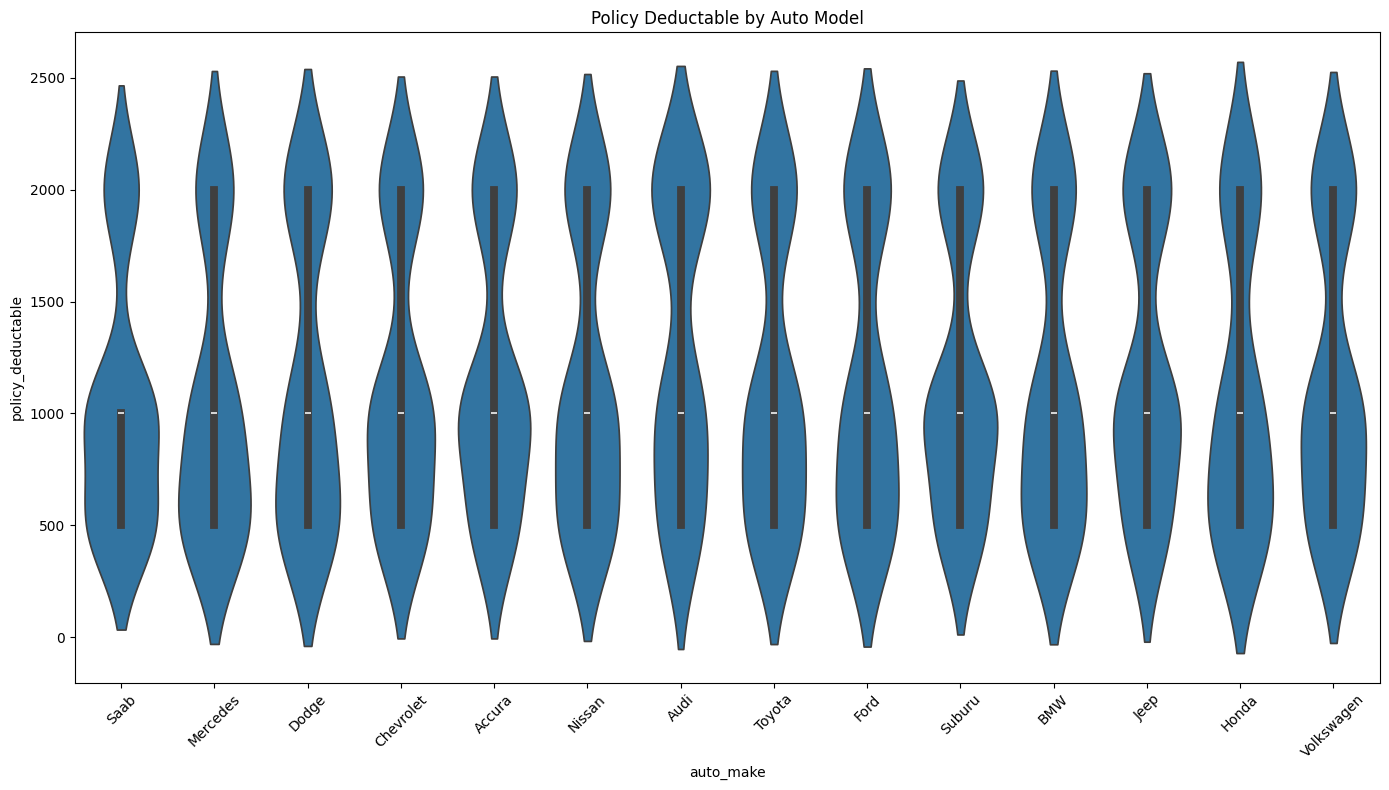

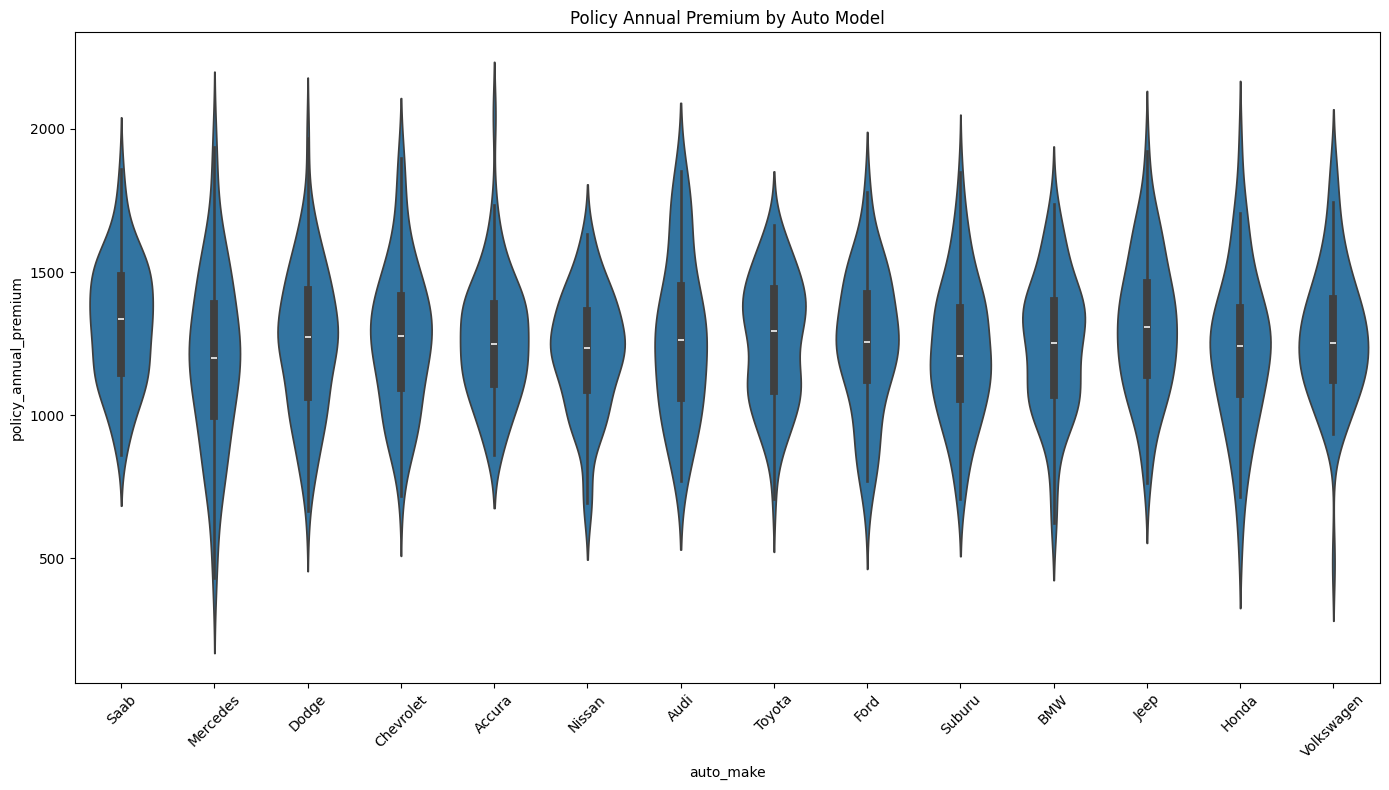

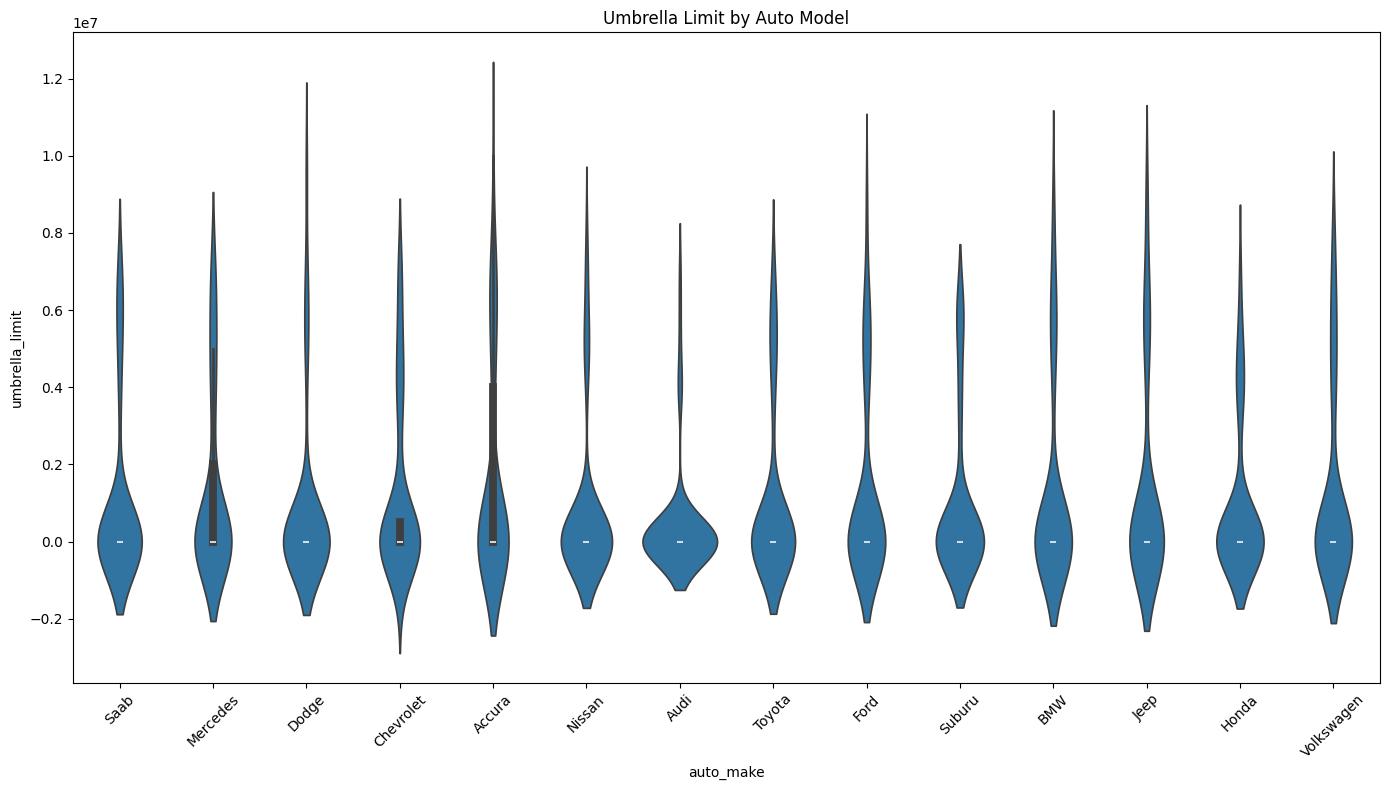

In [56]:
# Plot between financial policies and car brand 

# Creating a plot for each financial policy column against auto_model
for column in financial_policy_columns:
    plt.figure(figsize=(14, 8))
    sns.violinplot(x='auto_make', y=column, data=insurance_claimsdf)
    plt.title(f'{column.replace("_", " ").title()} by Auto Model')
    plt.xticks(rotation=45)  # This makes the auto model names readable
    plt.tight_layout()  # Adjust layout to make room for the rotated x-axis labels
    plt.show()

C:\Users\chimi\AppData\Local\Temp\ipykernel_4288\770162809.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='auto_make', y='capital-gains', data=mean_capital_by_make_sorted_gain, palette='viridis')


C:\Users\chimi\AppData\Local\Temp\ipykernel_4288\770162809.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='auto_make', y='capital-loss', data=mean_capital_by_make_sorted_loss, palette='viridis')


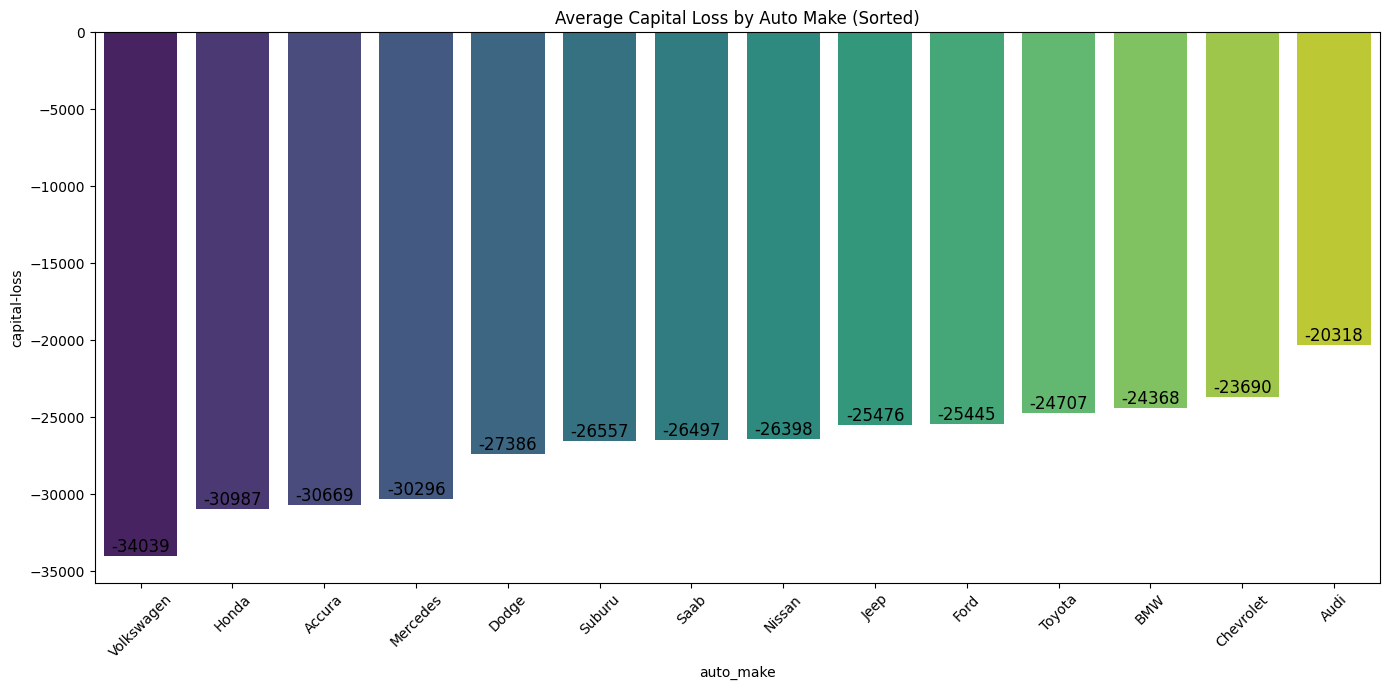

In [57]:
# Capital loss and capital gain


# Calculate the mean capital gains and losses for each auto make
mean_capital_by_make = insurance_claimsdf.groupby('auto_make')[['capital-gains', 'capital-loss']].mean().reset_index()

# Sorting data by 'capital-gains' for plotting
mean_capital_by_make_sorted_gain = mean_capital_by_make.sort_values('capital-gains', ascending=True)



# Plotting the mean capital gain for each auto make with sorted values
plt.figure(figsize=(14, 7))
ax = sns.barplot(x='auto_make', y='capital-gains', data=mean_capital_by_make_sorted_gain, palette='viridis')
plt.title('Average Capital Gain by Auto Make (Sorted)')
plt.xticks(rotation=45)
# Adding labels to each bar
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, ha='center', va='bottom')
plt.tight_layout()
plt.show()

# Sorting data by 'capital-loss' for plotting
mean_capital_by_make_sorted_loss = mean_capital_by_make.sort_values('capital-loss', ascending=True)

# Plotting the mean capital loss for each auto make with sorted values
plt.figure(figsize=(14, 7))
ax = sns.barplot(x='auto_make', y='capital-loss', data=mean_capital_by_make_sorted_loss, palette='viridis')
plt.title('Average Capital Loss by Auto Make (Sorted)')
plt.xticks(rotation=45)
# Adding labels to each bar
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, ha='center', va='bottom')
plt.tight_layout()
plt.show()


C:\Users\chimi\AppData\Local\Temp\ipykernel_4288\1265306982.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='auto_make', y=column, data=insurance_claimsdf, palette='viridis')


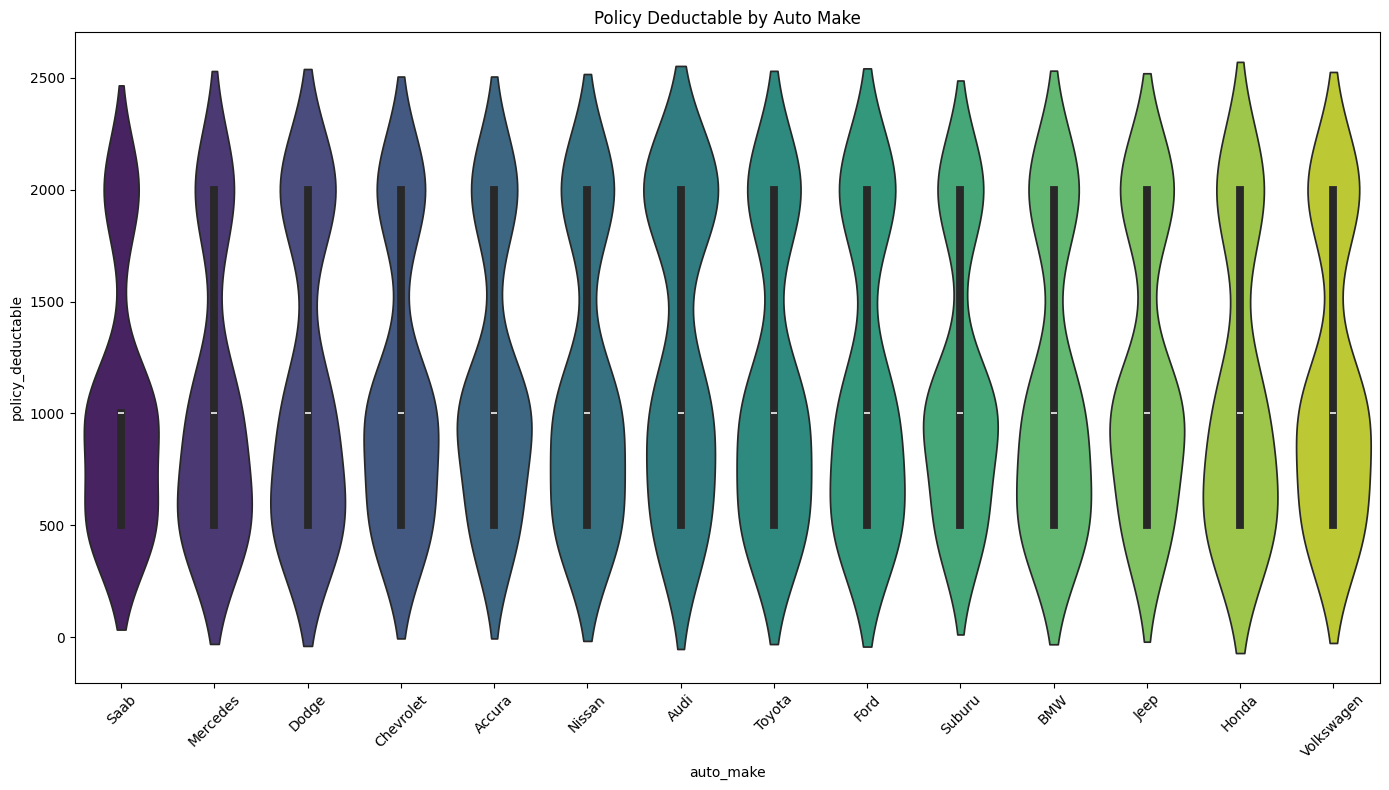

C:\Users\chimi\AppData\Local\Temp\ipykernel_4288\1265306982.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='auto_make', y=column, data=insurance_claimsdf, palette='viridis')


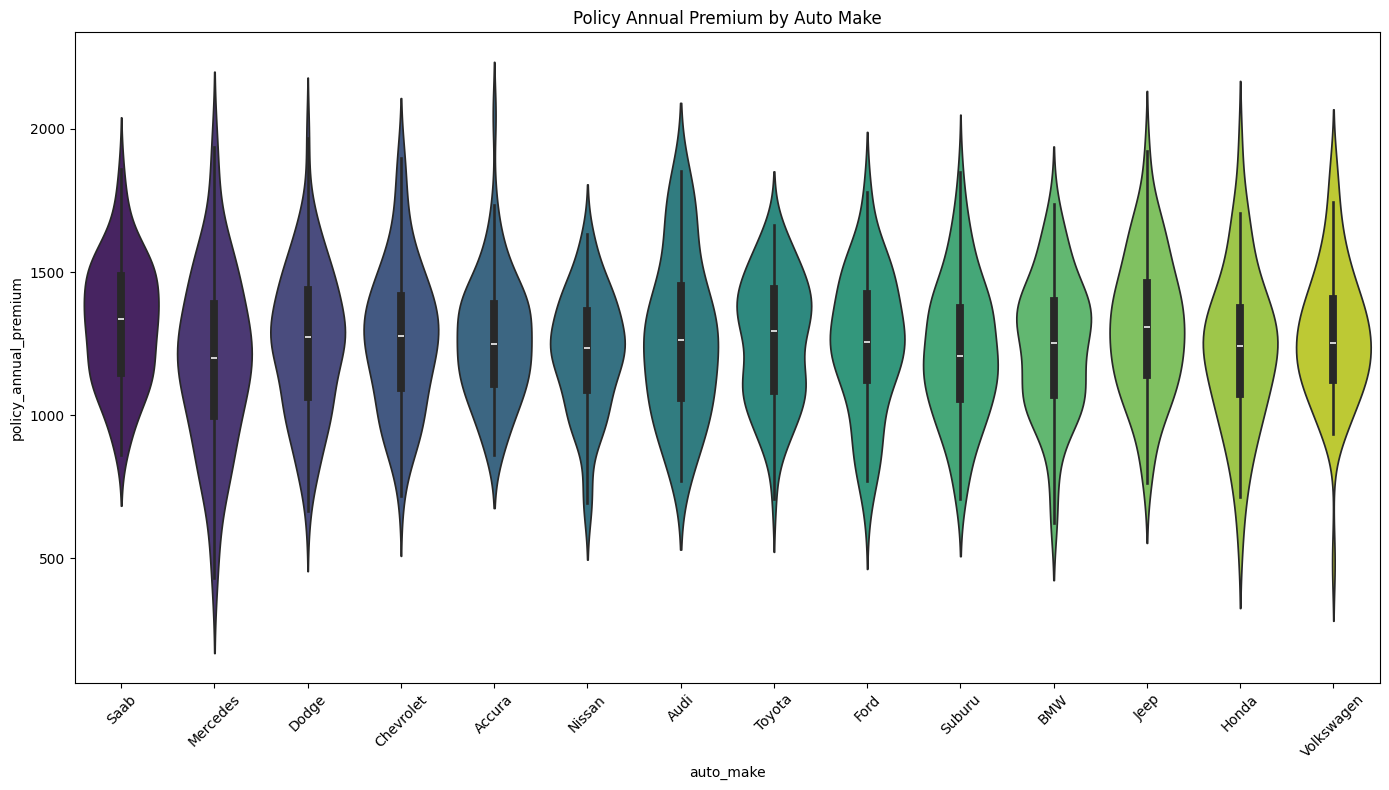

C:\Users\chimi\AppData\Local\Temp\ipykernel_4288\1265306982.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='auto_make', y=column, data=insurance_claimsdf, palette='viridis')


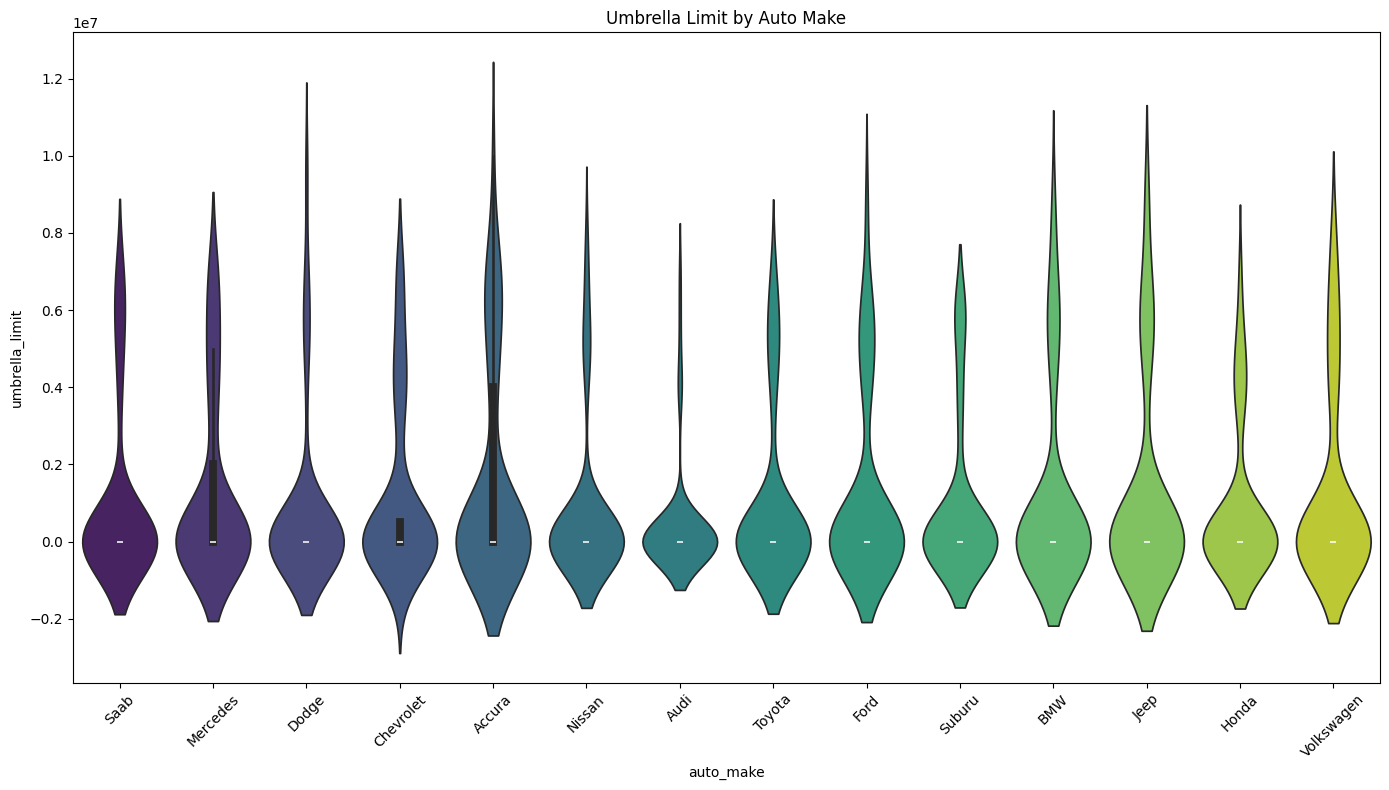

In [58]:
# Plot between  policies and car brand 

financial_claims_details = ['total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim']

# Iterate through the financial policy columns to create box plots for each against 'auto_make'
for column in financial_policy_columns:
    plt.figure(figsize=(14, 8))
    sns.violinplot(x='auto_make', y=column, data=insurance_claimsdf, palette='viridis')
    plt.title(f'{column.replace("_", " ").title()} by Auto Make')
    plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
    plt.tight_layout()  # Adjust the layout to avoid clipping of tick labels
    plt.show()

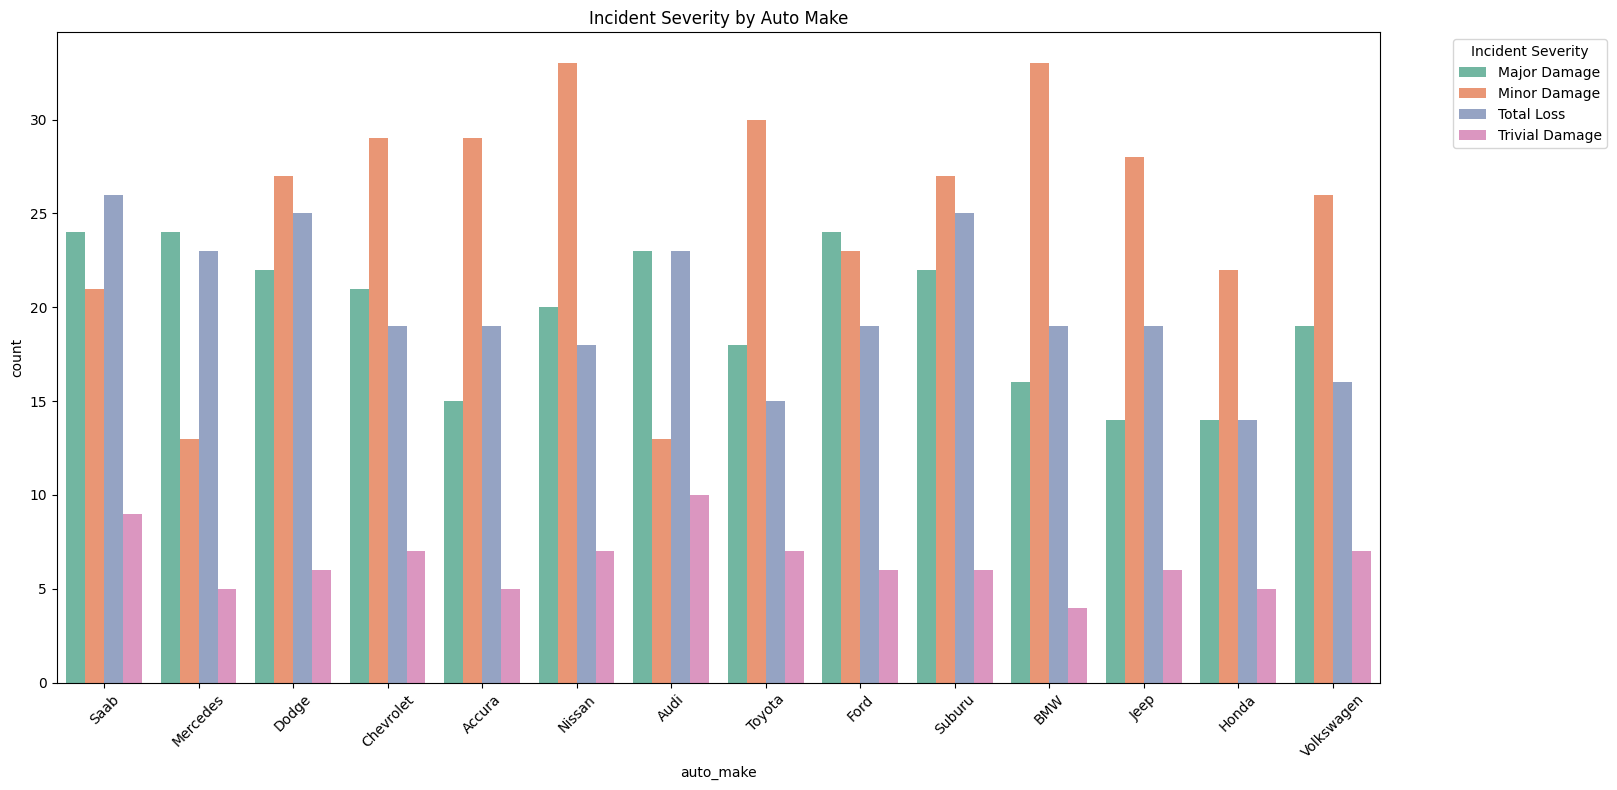

In [59]:
# Plot between incident severity separated by automake

plt.figure(figsize=(14, 8))
sns.countplot(x='auto_make', hue='incident_severity', data=insurance_claimsdf, palette='Set2')
plt.title('Incident Severity by Auto Make')
plt.xticks(rotation=45)  # This makes the auto make names readable
plt.tight_layout()  # Adjust layout to make room for the legend and x-axis labels
plt.legend(title='Incident Severity', bbox_to_anchor=(1.05, 1), loc='upper left')  # Place the legend outside
plt.show()

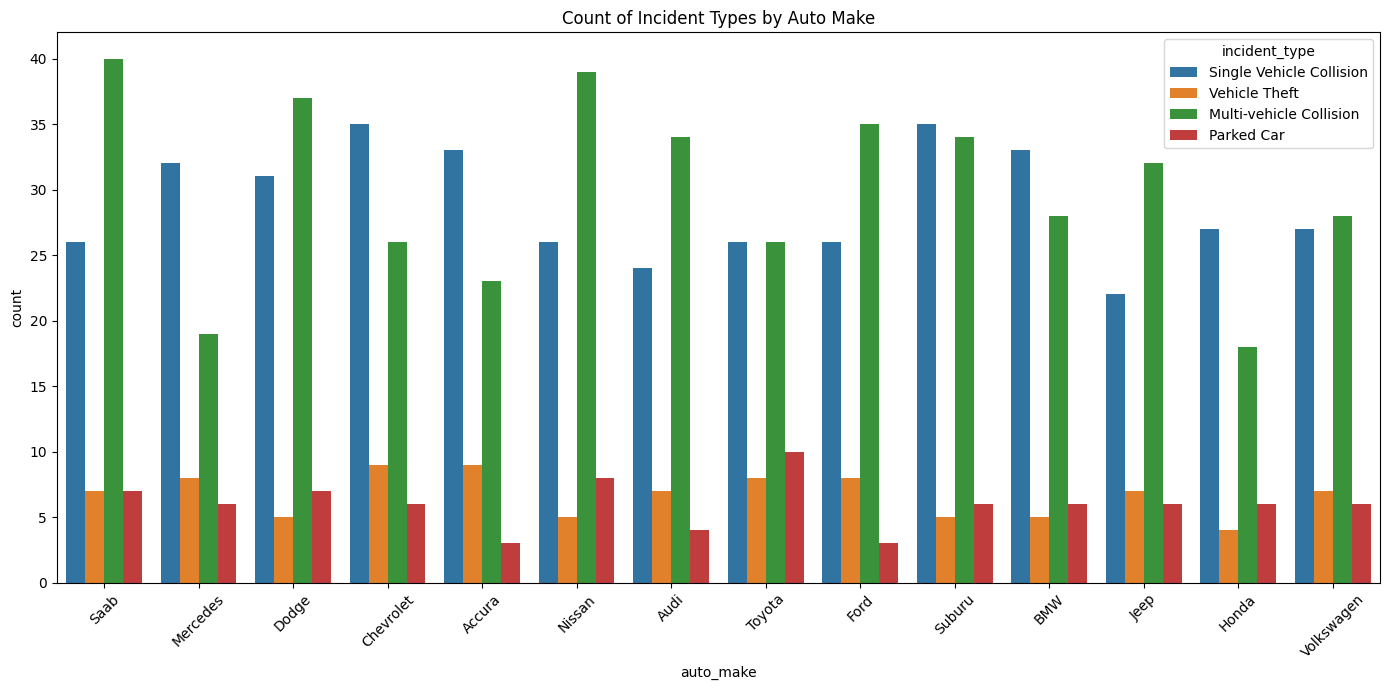

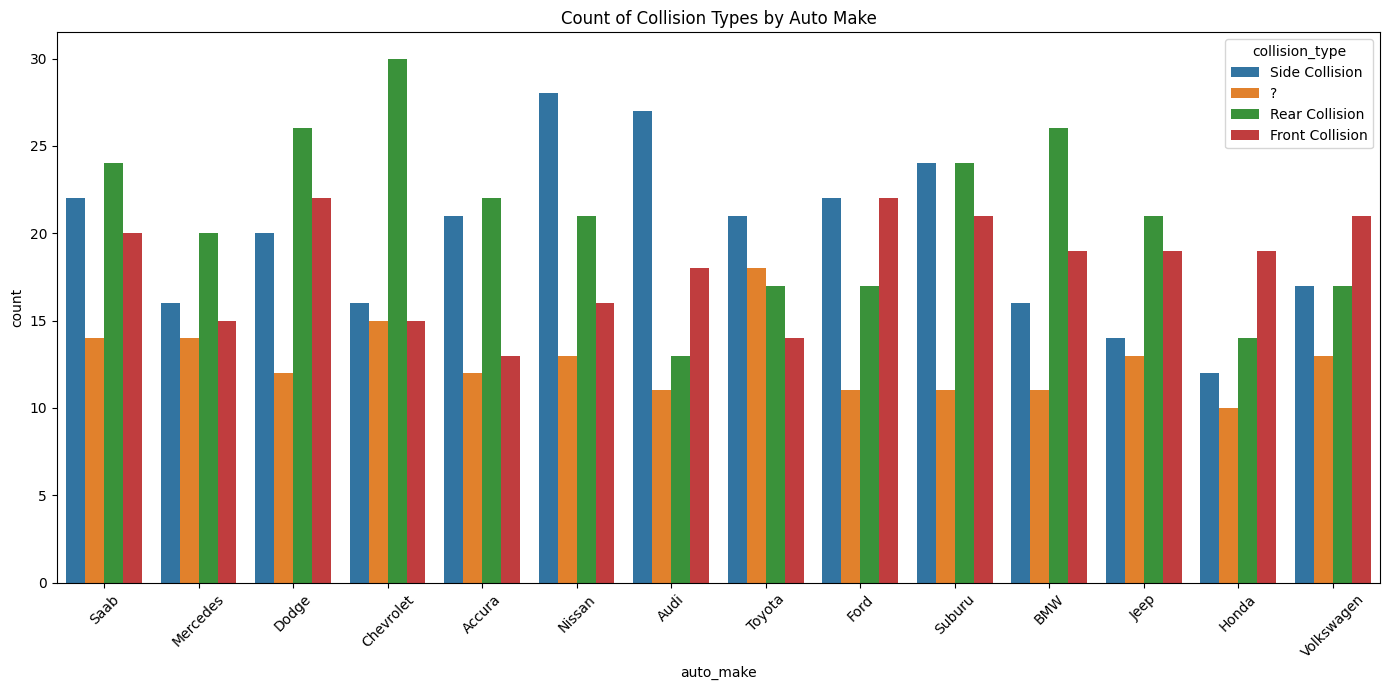

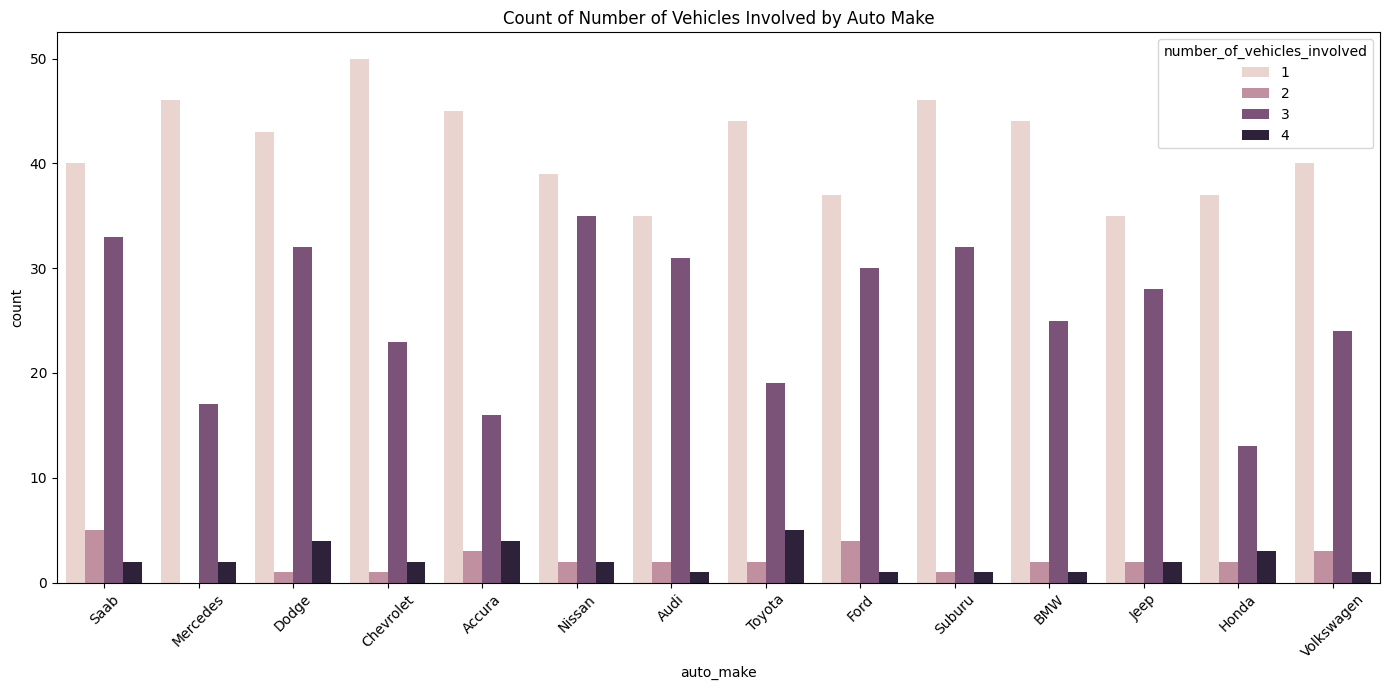

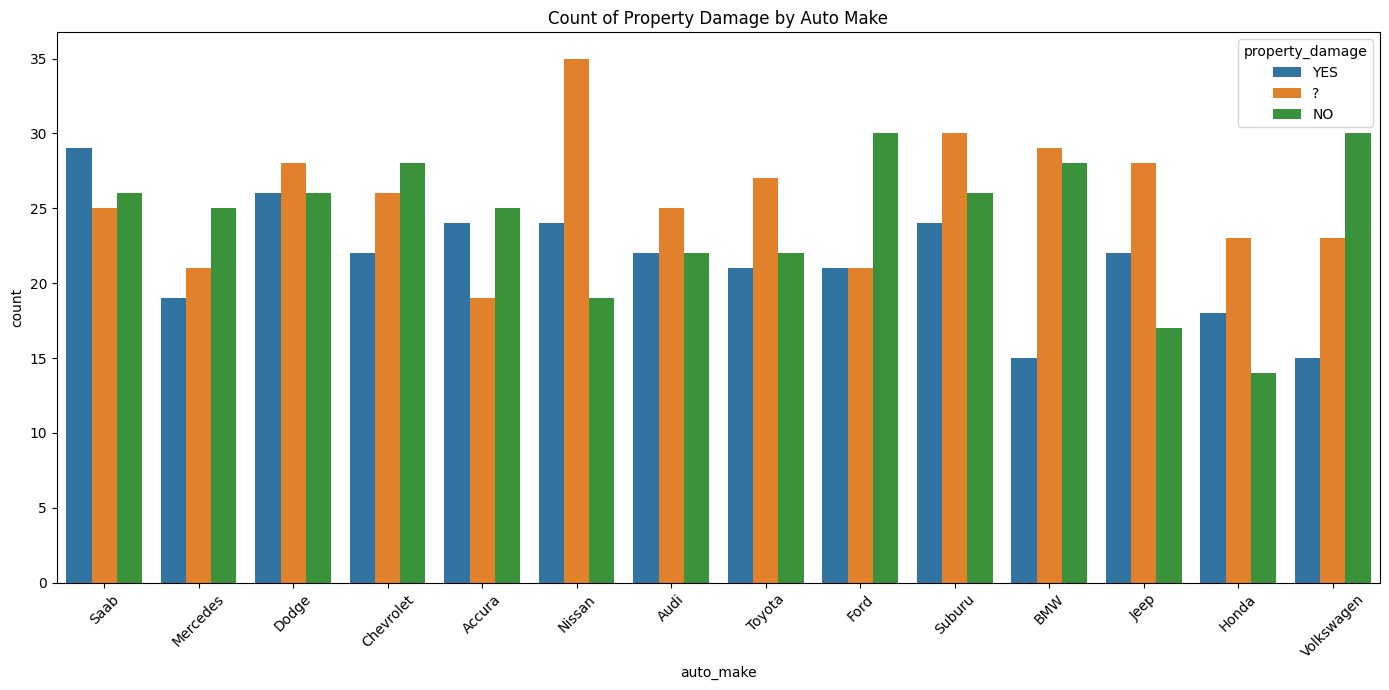

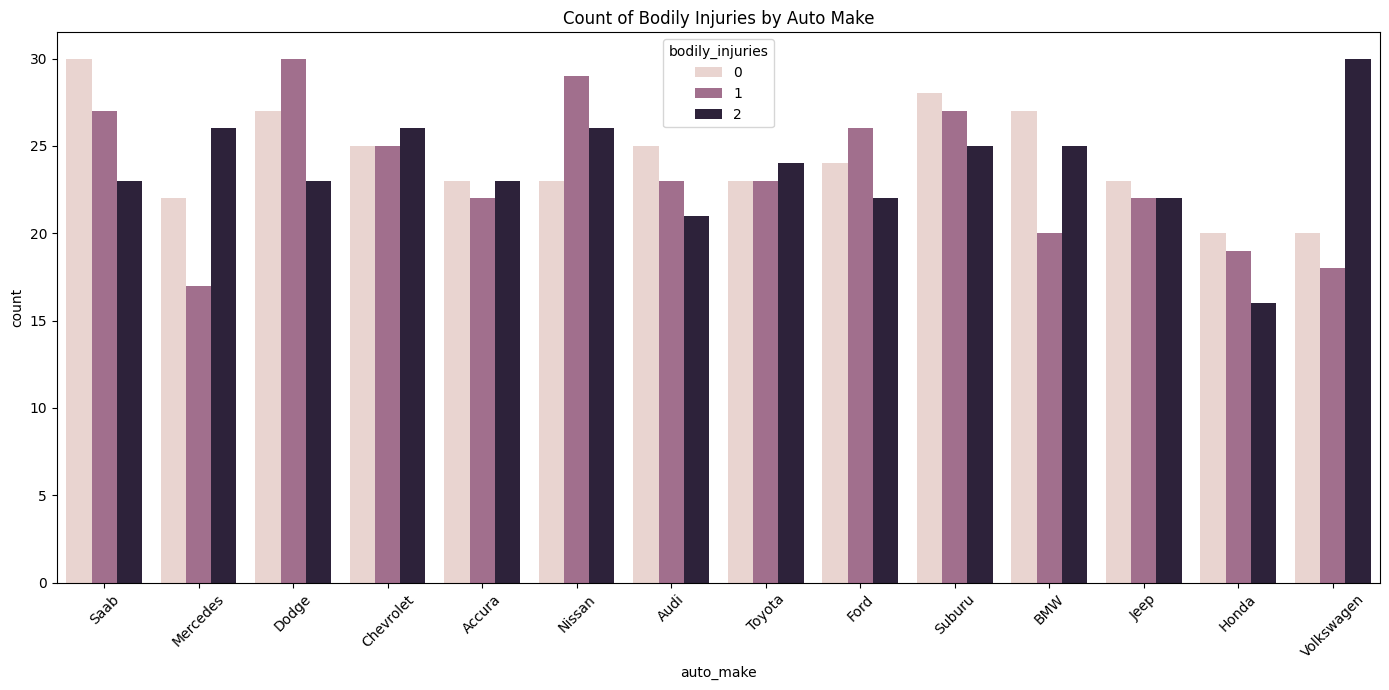

In [60]:
# Auto-make and Incident Type

# Set the current color palette without displaying it
sns.set_palette(sns.color_palette())

# Generate the count plot for 'incident_type' by 'auto_make'
plt.figure(figsize=(14, 7))
sns.countplot(x='auto_make', hue='incident_type', data=insurance_claimsdf)
plt.title('Count of Incident Types by Auto Make')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Generate the count plot for 'collision_type' by 'auto_make' using the filtered data
plt.figure(figsize=(14, 7))
sns.countplot(x='auto_make', hue='collision_type', data=insurance_claimsdf)
plt.title('Count of Collision Types by Auto Make')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Generate the count plot for 'number_of_vehicles_involved' by 'auto_make'
plt.figure(figsize=(14, 7))
sns.countplot(x='auto_make', hue='number_of_vehicles_involved', data=insurance_claimsdf)
plt.title('Count of Number of Vehicles Involved by Auto Make')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Generate the count plot for 'property_damage' by 'auto_make'
plt.figure(figsize=(14, 7))
sns.countplot(x='auto_make', hue='property_damage', data=insurance_claimsdf)
plt.title('Count of Property Damage by Auto Make')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Generate the count plot for 'bodily_injuries' by 'auto_make'
plt.figure(figsize=(14, 7))
sns.countplot(x='auto_make', hue='bodily_injuries', data=insurance_claimsdf)
plt.title('Count of Bodily Injuries by Auto Make')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



### Observation:
- Total Claim Amount: The distribution of total claim amounts varies greatly throughout car brands; some have a higher median claim value and others have a wider distributed range of claims. 
- Injury Claim: This metric also shows variance, with a higher probability of injury claims associated with specific auto brands. 
- Property Claim: Similar to injury claims, the distribution and peaks of property claims vary by make of automobile. The cost of restoring these cars or the regularity of incidents involving property damage could be the reason for this variance.
- Vehicle Claim: The breakdown of vehicle claims includes the cost of repairs in addition to the overall cost of the vehicles. The claim values of some luxury car brands are notably higher than others makers.
- Severity by Auto Make: The plot shows that some automakers are regularly linked to more specific, serious incidents.
- Incident Type:  The incident type shows that there is a difference between various car manufacturer and the types of incidents that are most common for particular brands.
- Collision Type: Brands associated with higher collision rate will be frequently involved in collision.
- Number of Vehicles Involved: The number of vehicles each car is involved in varies. The more luxurious vehicle have less number of vehicles involved compare to the common ones.
- Property Damage: Out of all the brands, Nissan has the highest property damage.
- Bodily injuries: The more coomon brands have a higher number of bodily injuries.

### EDA Part3: Fraud Claims vs Non-Fraud Claims

C:\Users\chimi\AppData\Local\Temp\ipykernel_4288\3299406929.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x='fraud_reported', y='months_as_customer', data=avg_months_by_fraud, palette='viridis')


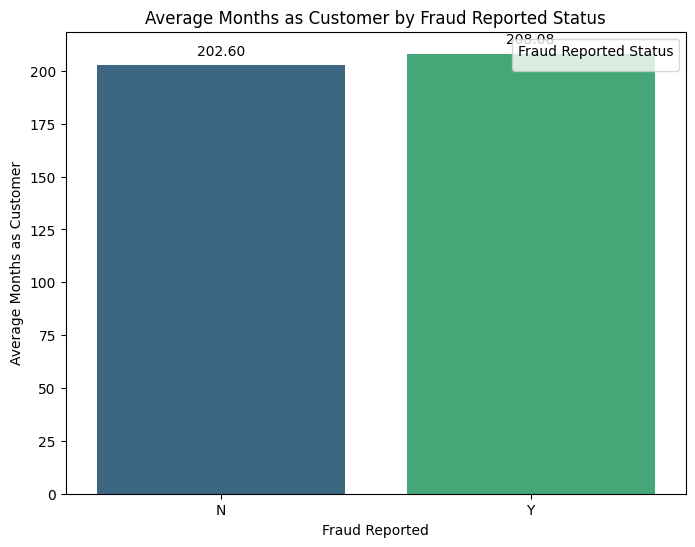

In [61]:
### What is the average duration in months as a customer separated by fraud and non-fraud claims?

avg_months_by_fraud = insurance_claimsdf.groupby('fraud_reported')['months_as_customer'].mean().reset_index()

# Enhancing the bar plot with clearer labels and a legend
plt.figure(figsize=(8, 6))
barplot = sns.barplot(x='fraud_reported', y='months_as_customer', data=avg_months_by_fraud, palette='viridis')
plt.title('Average Months as Customer by Fraud Reported Status')
plt.xlabel('Fraud Reported')
plt.ylabel('Average Months as Customer')

# Adding value labels on top of each bar
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.2f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha = 'center', va = 'center', 
                     xytext = (0, 10), 
                     textcoords = 'offset points')

# Adding a legend for clarity
fraud_reported_legend = {'N': 'No Fraud Reported', 'Y': 'Fraud Reported'}
handles, labels = barplot.get_legend_handles_labels()
updated_labels = [fraud_reported_legend[label] for label in labels]
barplot.legend(handles, updated_labels, title='Fraud Reported Status')

plt.show()


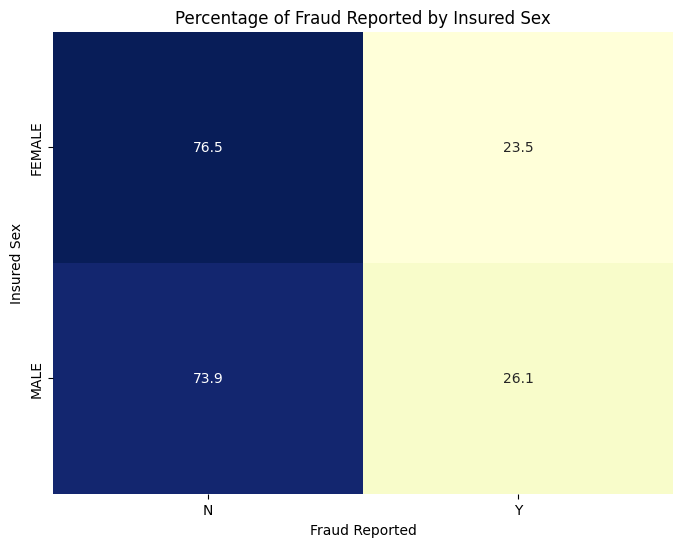

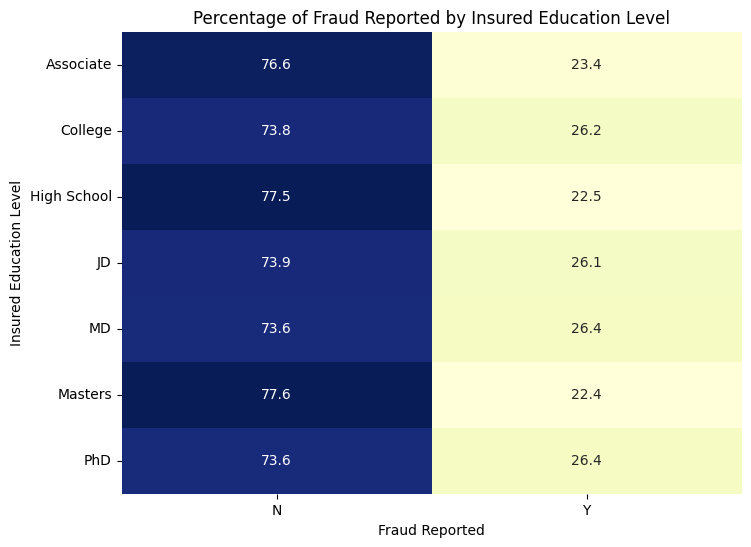

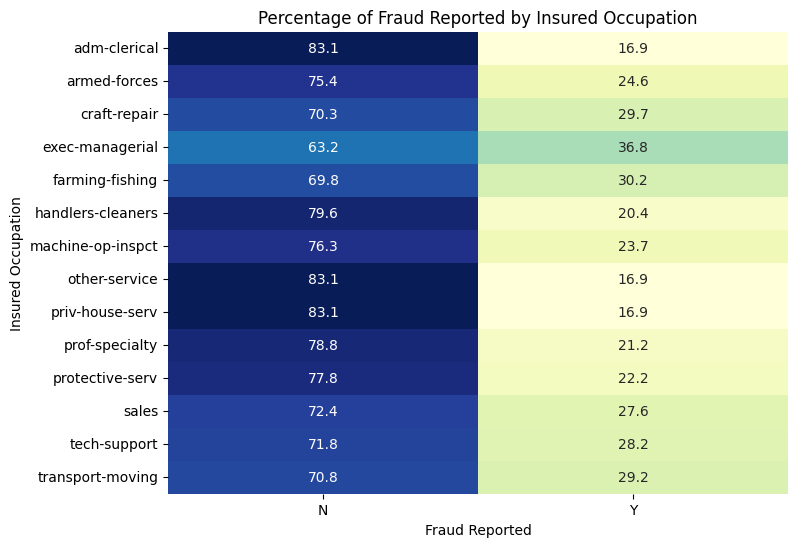

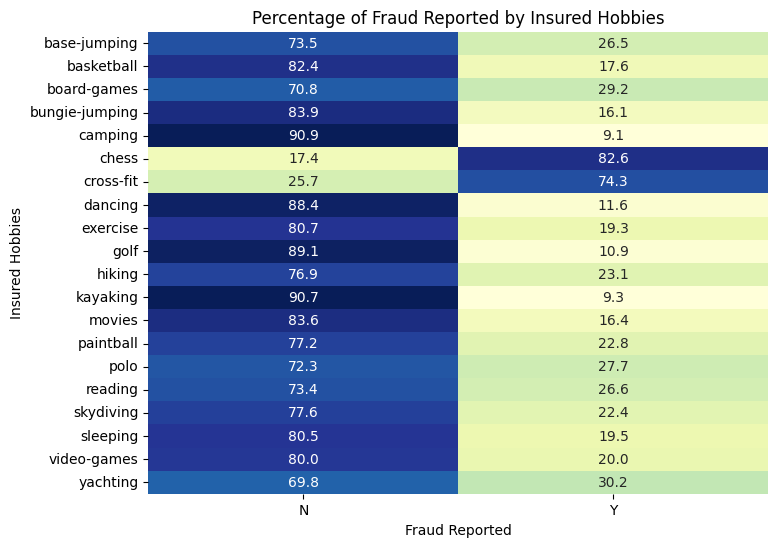

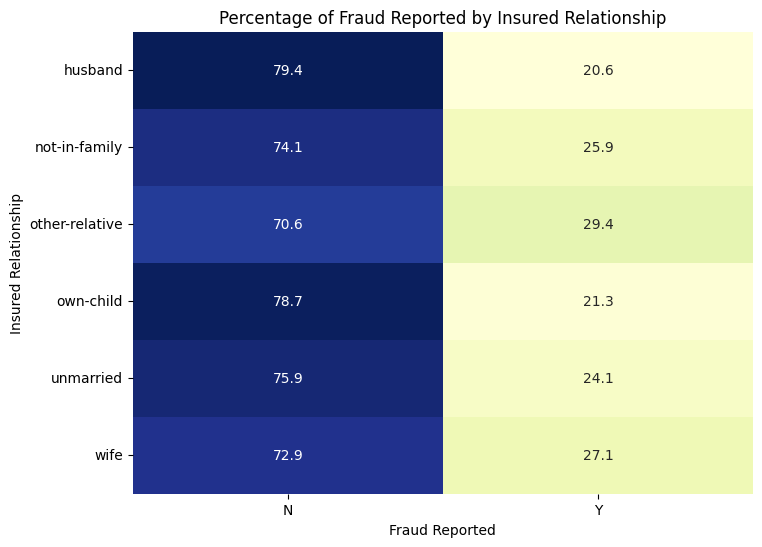

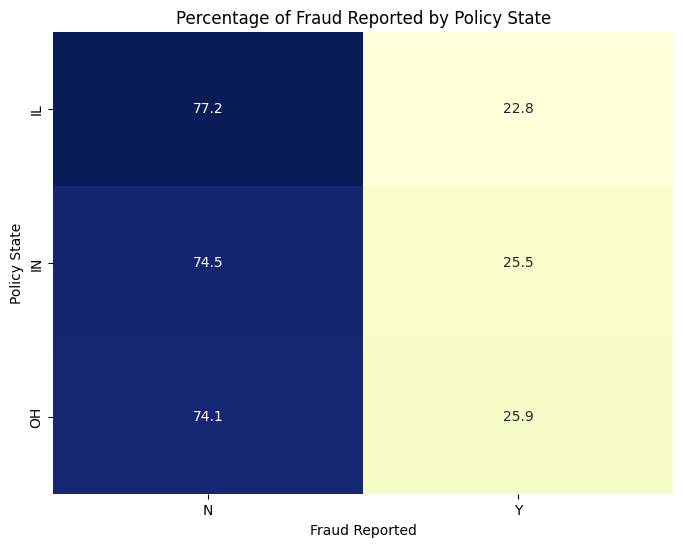

In [62]:
# Fraud Claims and Demographic Analysis


# Function to create cross tab and heatmap for a demographic variable vs fraud_reported
def plot_crosstab_heatmap(variable):
    # Creating a cross tabulation
    crosstab_result = pd.crosstab(index=insurance_claimsdf[variable], 
                                  columns=insurance_claimsdf['fraud_reported'],
                                  margins=True, margins_name='Total')

    # Normalizing the cross tab to show proportions
    crosstab_normalized = crosstab_result.div(crosstab_result['Total'], axis=0) * 100

    # Plotting heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(crosstab_normalized.iloc[:-1, :-1], annot=True, fmt=".1f", cmap="YlGnBu", cbar=False)
    plt.title(f'Percentage of Fraud Reported by {variable.replace("_", " ").title()}')
    plt.ylabel(variable.replace("_", " ").title())
    plt.xlabel('Fraud Reported')
    plt.show()

# Looping through demographic variables and creating cross tab heatmap for each
demographic_variables = ['insured_sex', 'insured_education_level', 'insured_occupation', 'insured_hobbies', 'insured_relationship', 'policy_state']
for variable in demographic_variables:
    plot_crosstab_heatmap(variable)

#### Observations:
- Insured Sex: It seems gender ids not an imperative anomaly indicator for fradulent claims, giving us a more uniform insight that we do not need to analyze gender specific fraud detection.

- Insured Education Level: There are minor difference in fraud across education level, but nothing to major. There is a small hint indicator for anomalies in fraud detectio models, education can play somewhat of unusual roles.

- Insured Occupation: There is  difference in the number of fraud committed by certain occupations compare to others. Perhaps, there is an area to explore if certain occupation are prone to have more fradulent claims. However, you have to consider data ethics and privacy.

- Insured Hobbies: There is somewhat corrleation between certain hobbies and higher fraud claims giving us insight that hobbies could be use as a predictor for risky tendencies.

- Insured Relationship: There is a slight indication family dynamics does impact the nature of fraud reported.

- Policy State: There some geographical variation which indicate, geography could be somewhat predictor of anomaly detection which could be influence by environment. Perhaps, there can be a slight adjustment in regions with higher fradulent cases to better identify anomalies.

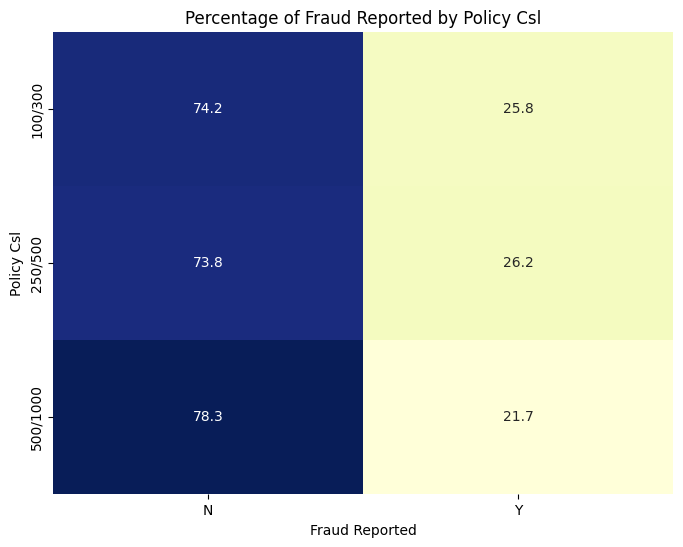

In [63]:
# Looking at policy csl levels and fraud claims
plot_crosstab_heatmap('policy_csl')

C:\Users\chimi\AppData\Local\Temp\ipykernel_4288\170232683.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='fraud_reported', y=column, data=insurance_claimsdf, palette='viridis')


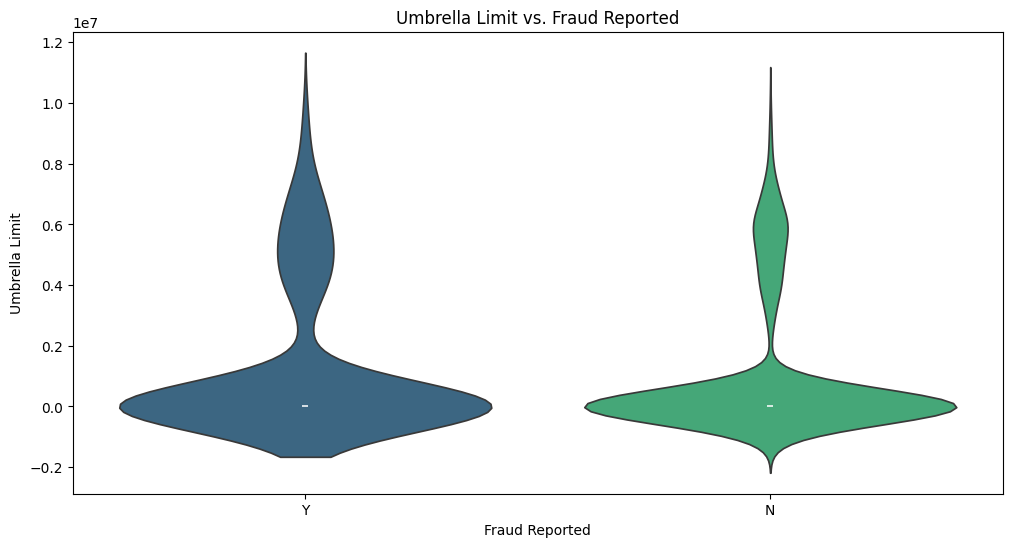

C:\Users\chimi\AppData\Local\Temp\ipykernel_4288\170232683.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='fraud_reported', y=column, data=insurance_claimsdf, palette='viridis')


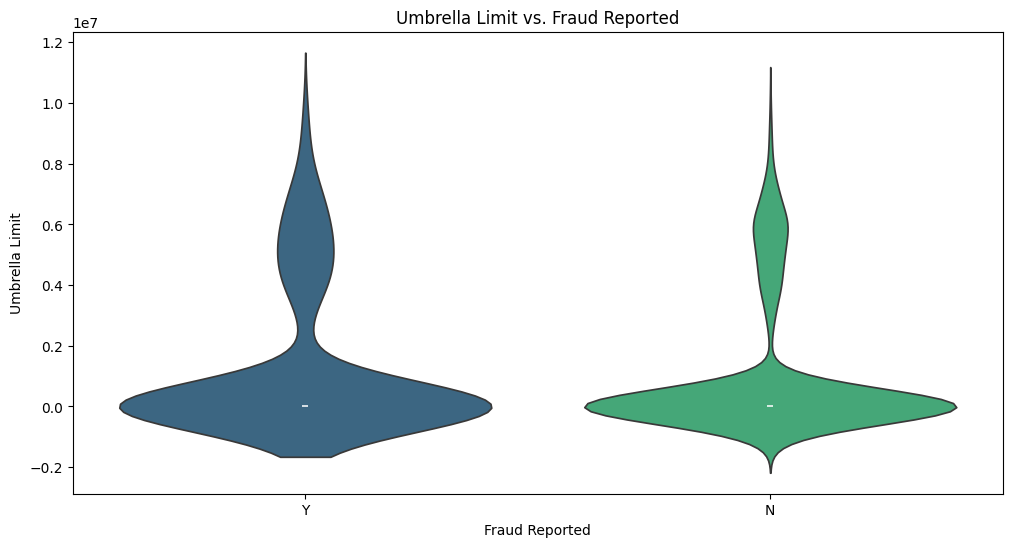

C:\Users\chimi\AppData\Local\Temp\ipykernel_4288\170232683.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='fraud_reported', y=column, data=insurance_claimsdf, palette='viridis')


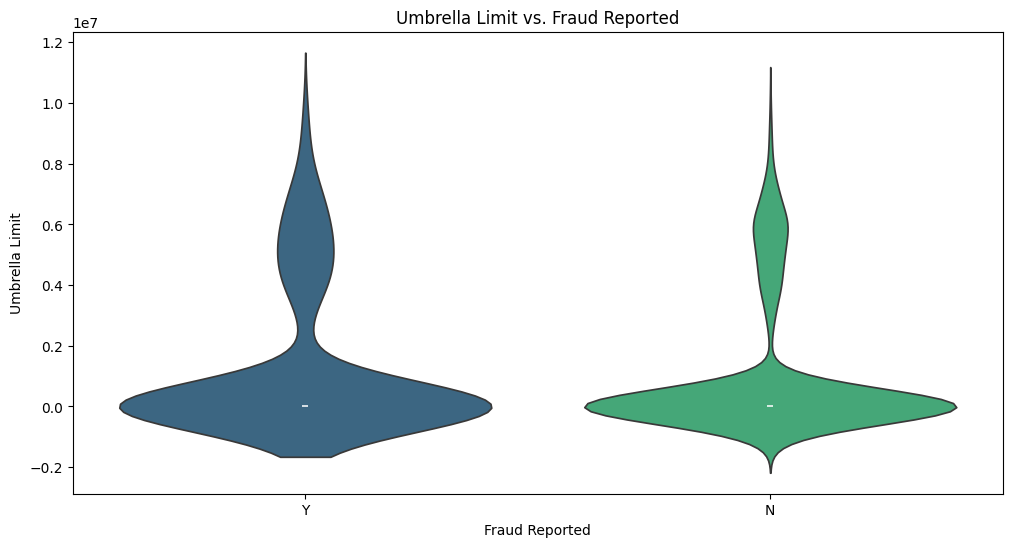

In [64]:
# Reported fraud claims and financial claim policies

for fp in financial_policy_columns:
    plt.figure(figsize=(12,6))
    sns.violinplot(x='fraud_reported', y=column, data=insurance_claimsdf, palette='viridis')
    plt.title(f'{column.replace("_", " ").title()} vs. Fraud Reported')
    plt.xlabel('Fraud Reported')
    plt.ylabel(column.replace("_", " ").title())
    plt.show()

#### Observation: 
- Most of the policies and claim yield no distinct patterns.

C:\Users\chimi\AppData\Local\Temp\ipykernel_4288\1998175691.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='fraud_reported', y='capital-gains', data=avg_capital_by_fraud, palette='viridis')
C:\Users\chimi\AppData\Local\Temp\ipykernel_4288\1998175691.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='fraud_reported', y='capital-loss', data=avg_capital_by_fraud, palette='viridis')


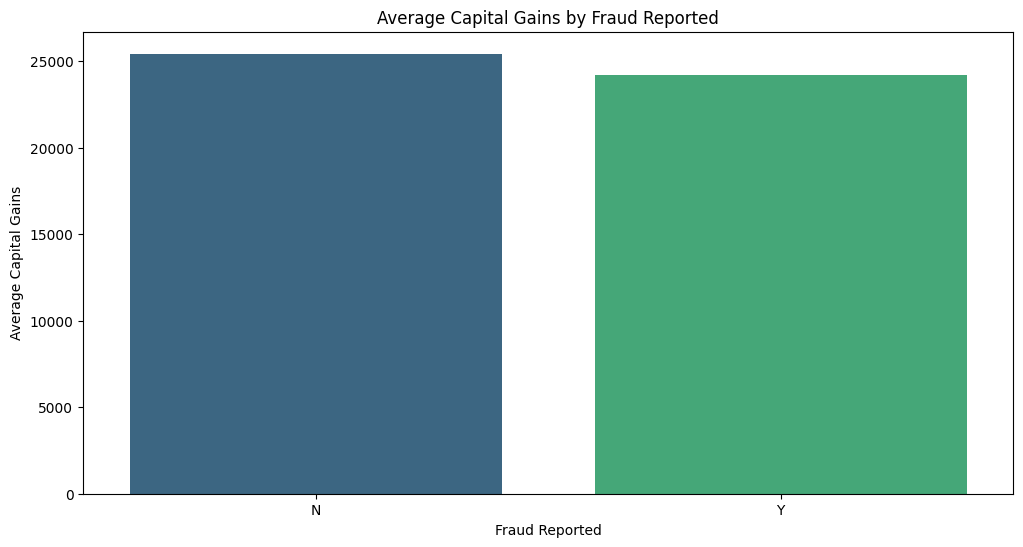

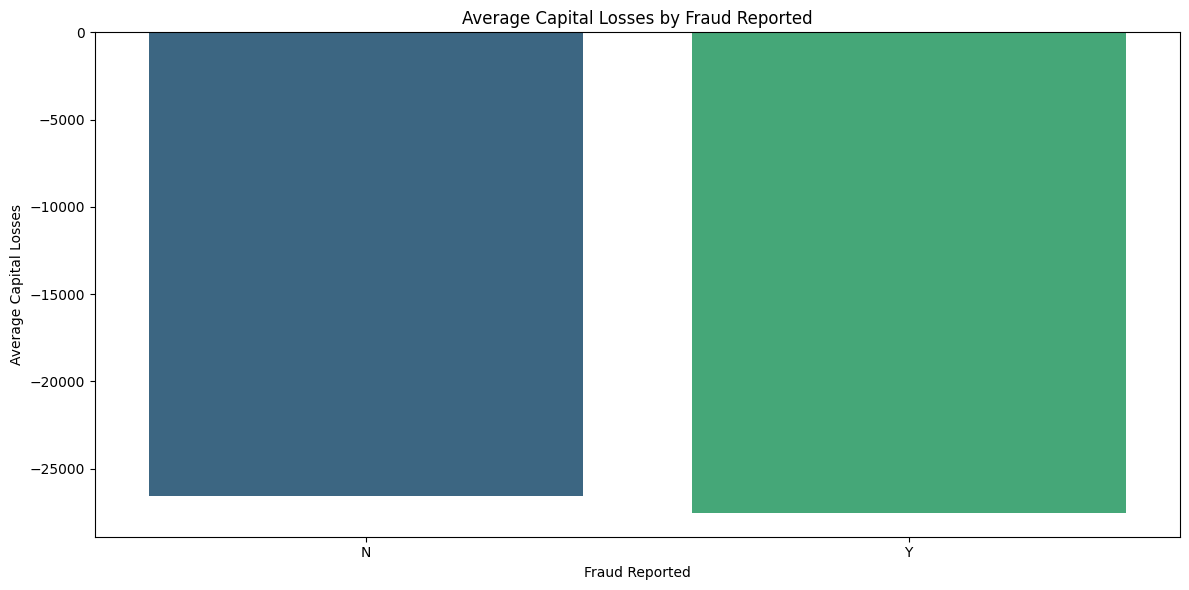

In [65]:


# Calculate the average capital gains and losses for fraud reported vs not reported
avg_capital_by_fraud = insurance_claimsdf.groupby('fraud_reported')[['capital-gains', 'capital-loss']].mean().reset_index()

# Plot for average capital gains
plt.figure(figsize=(12,6))
sns.barplot(x='fraud_reported', y='capital-gains', data=avg_capital_by_fraud, palette='viridis')
plt.title('Average Capital Gains by Fraud Reported')
plt.xlabel('Fraud Reported')
plt.ylabel('Average Capital Gains')


# Plot for average capital losses
plt.figure(figsize=(12,6))
sns.barplot(x='fraud_reported', y='capital-loss', data=avg_capital_by_fraud, palette='viridis')
plt.title('Average Capital Losses by Fraud Reported')
plt.xlabel('Fraud Reported')
plt.ylabel('Average Capital Losses')

plt.tight_layout()
plt.show()

C:\Users\chimi\AppData\Local\Temp\ipykernel_4288\3277716290.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='fraud_reported', y=fcp , data=insurance_claimsdf, palette='viridis')


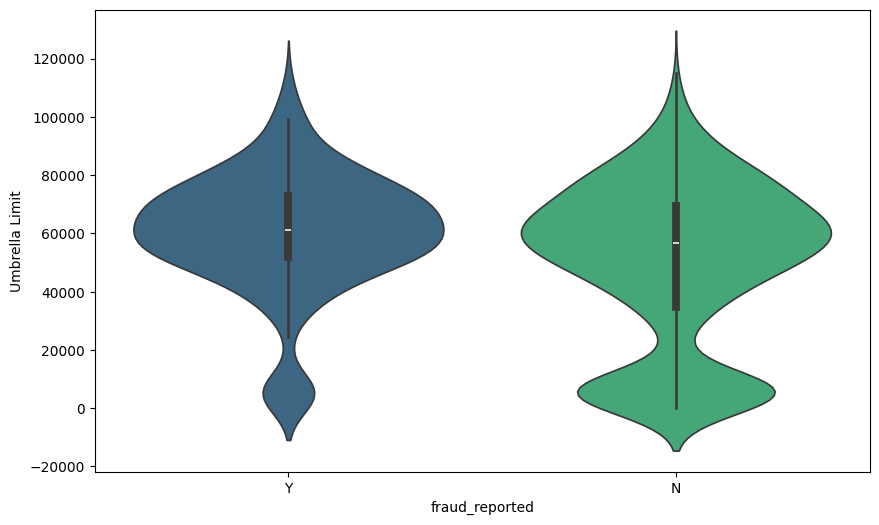

C:\Users\chimi\AppData\Local\Temp\ipykernel_4288\3277716290.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='fraud_reported', y=fcp , data=insurance_claimsdf, palette='viridis')


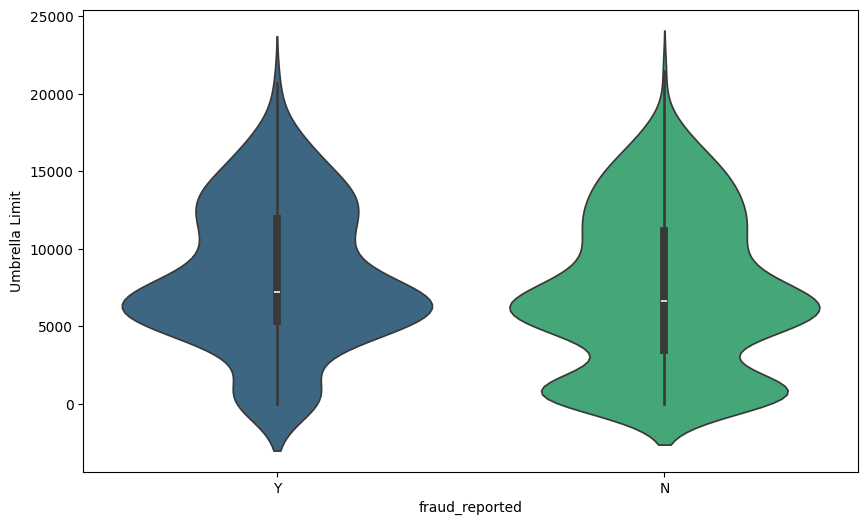

C:\Users\chimi\AppData\Local\Temp\ipykernel_4288\3277716290.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='fraud_reported', y=fcp , data=insurance_claimsdf, palette='viridis')


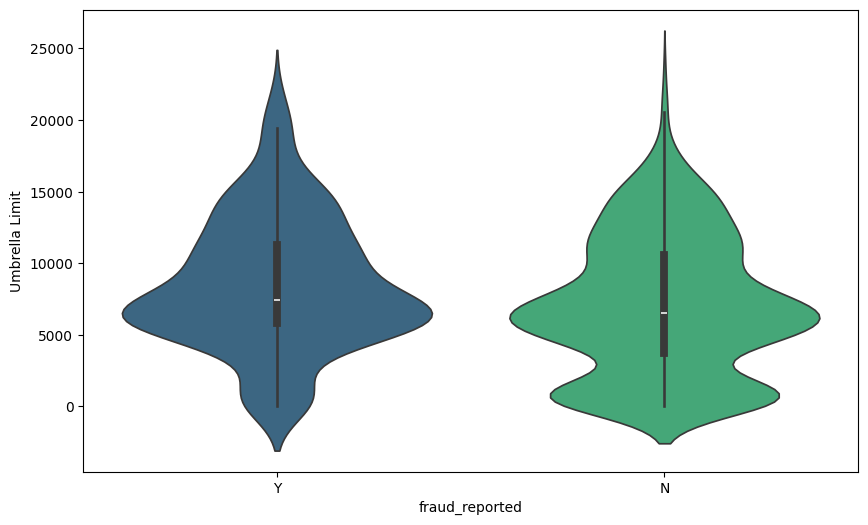

C:\Users\chimi\AppData\Local\Temp\ipykernel_4288\3277716290.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='fraud_reported', y=fcp , data=insurance_claimsdf, palette='viridis')


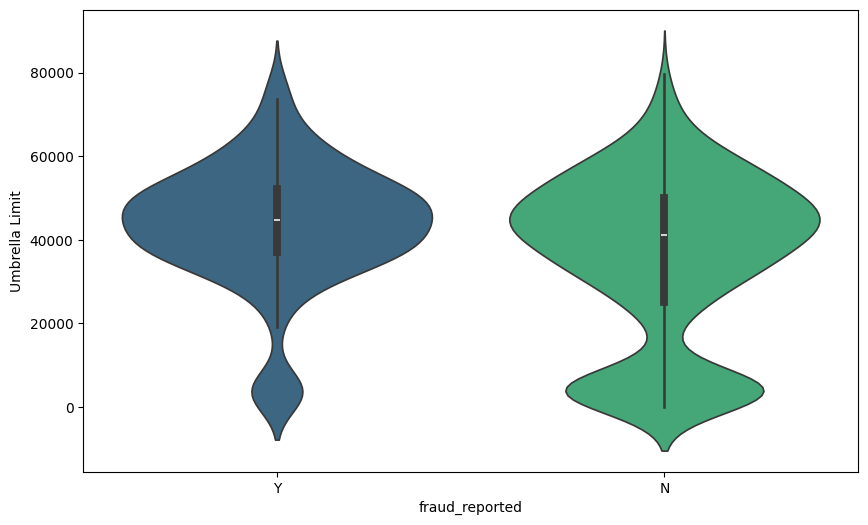

In [66]:
# Financial claims and fraud reported vs not reported


# Plotting each violin plot
for fcp in financial_claims_details:
    plt.figure(figsize=(10, 6))
    sns.violinplot(x='fraud_reported', y=fcp , data=insurance_claimsdf, palette='viridis')
    plt.ylabel(column.replace("_", " ").title())
    plt.show()

#### Observations:
- The lack of distinct pattern indicates that perhaps these predictors might not be great slight indicator of fradulence behavior.


In [67]:
# Nature of the incidents

variables_to_plot = ['incident_type', 'collision_type', 'incident_severity', 
                     'authorities_contacted', 'incident_city', 'incident_location', 
                     'incident_hour_of_the_day', 'number_of_vehicles_involved', 
                     'property_damage', 'bodily_injuries', 'witnesses', 'police_report_available']

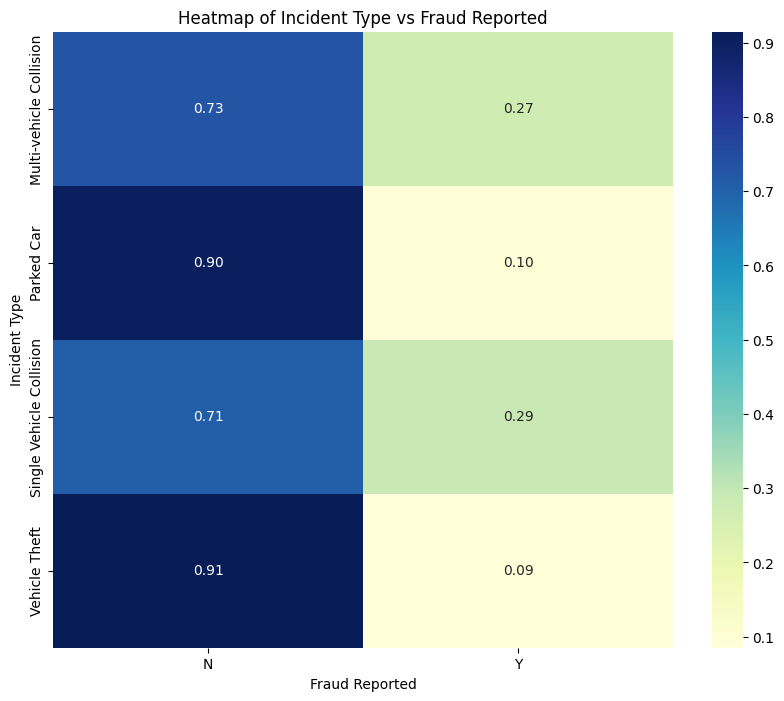

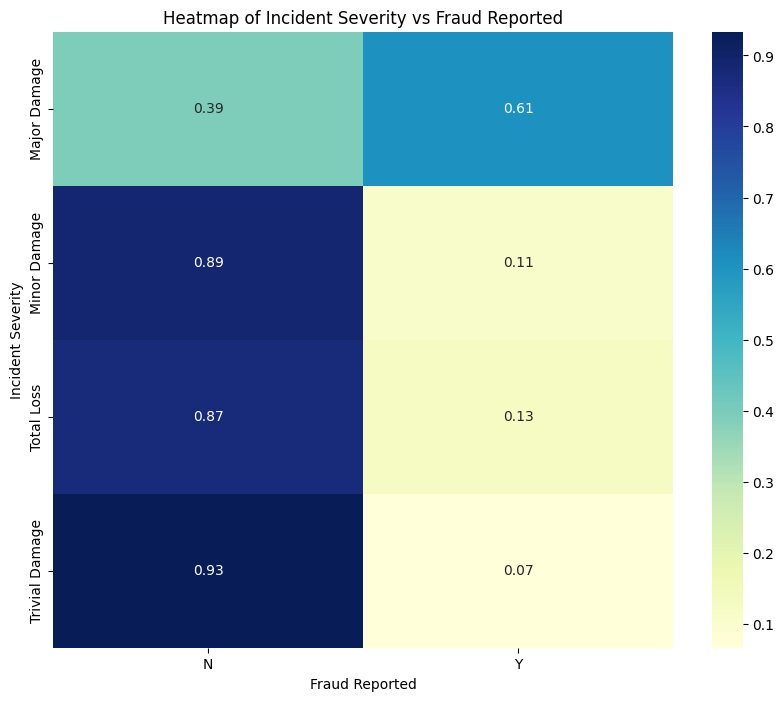

KeyError: 'authorities_contacted'

In [68]:

# List of categorical variables related to incidents
incident_related_categorical_vars = [
    'incident_type', 'collision_type', 'incident_severity', 
    'authorities_contacted', 'incident_state', 'incident_city', 
    'incident_location', 'police_report_available', 'property_damage'
]

# Create a heatmap for each categorical variable against fraud_reported
for var in incident_related_categorical_vars:
    # Create a cross-tabulation table between the categorical variable and fraud_reported
    crosstab = pd.crosstab(insurance_claimsdf[var], insurance_claimsdf['fraud_reported'])
    
    # Normalize the cross-tabulation to get the proportion of fraud reported within each category
    crosstab_normalized = crosstab.div(crosstab.sum(axis=1), axis=0)
    
    # Generate heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(crosstab_normalized, annot=True, fmt=".2f", cmap="YlGnBu")
    plt.title(f'Heatmap of {var.replace("_", " ").title()} vs Fraud Reported')
    plt.ylabel(var.replace("_", " ").title())
    plt.xlabel('Fraud Reported')
    plt.show()


#### Observations:
- Incident Type: Based on the heatmap's findings, certain event types appear to be more frequently linked to fraud. This emphasizes the necessity of using particular investigation procedures in these particular situations.
- Collision Type: Differences in fraud reports across various collision types may point to trends in staged collisions or overstated claims, particularly in collision types where fraud rates are greater.

- Incident Severity: Incidents with a higher severity have a higher propensity to be reported as fraudulent, presumably because fraudulent activities are drawn to larger potential claim amounts.


- Authorities Contacted: The plot shows some notable varition in fraudulence reporting indicting that certain authorities might be involved.


- State of the Incident: The fraud reports also display a distinct geographic pattern with certain states report higher rates of fraud than others. This could be due to geographical difference..
- Incident City: Citie and state match on this geographic analysis.

- Incident Location: Hospots for fradulent activities might be more fradulent activities.

- Police Report Available: Policy reports correlates with different fraud reporting rates, indicating there offical documentation process carried out to validate claim.

- Property Damage: Status of property plays a role in fraud reporting with specific type of damage having an association with fradulence claims.

Location of Incident: Places with higher rate of fraud reporting are hotspots for fradulent activities. We might want to look at the location that are the hotspos.

- Police Report Accessible: The  is correlation between varying rates of fraud reporting and the existence of police record avaliable which lets us track any fradulent claims.


In [ ]:
# 

# List of numerical variables related to incidents
incident_related_numerical_vars = [
    'incident_hour_of_the_day', 'number_of_vehicles_involved', 
    'bodily_injuries', 'witnesses'
]

# Create a violin plot for each numerical variable against 'fraud_reported'
for var in incident_related_numerical_vars:
    plt.figure(figsize=(10, 6))
    sns.violinplot(x='fraud_reported', y=var, data=insurance_claimsdf, palette='viridis')
    plt.title(f'{var.replace("_", " ").title()} vs. Fraud Reported')
    plt.xlabel('Fraud Reported')
    plt.ylabel(var.replace("_", " ").title())
    plt.show()

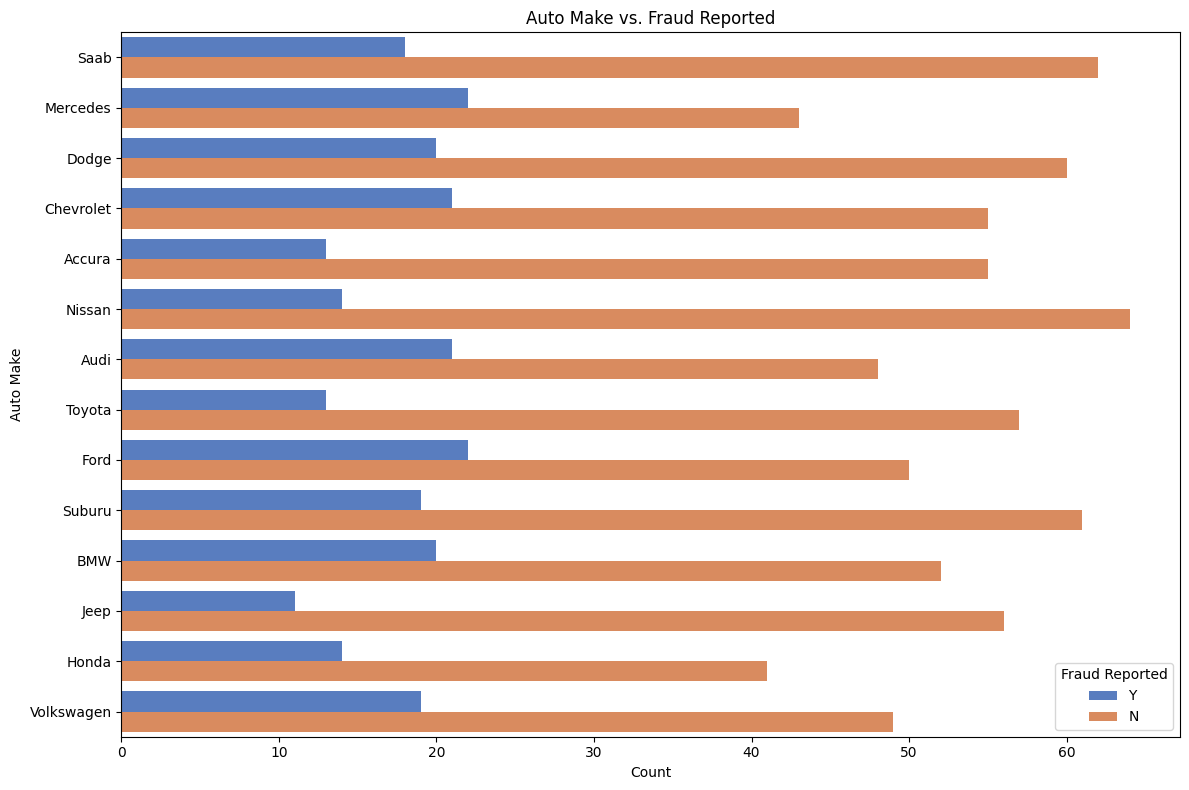

In [69]:
# Auto-make and 


plt.figure(figsize=(12, 8))
sns.countplot(y='auto_make', hue='fraud_reported', data=insurance_claimsdf, palette='muted')
plt.title('Auto Make vs. Fraud Reported')
plt.xlabel('Count')
plt.ylabel('Auto Make')
plt.legend(title='Fraud Reported', loc='best')
plt.tight_layout()
plt.show()

In [70]:


claim_anova_results = {}

for claim_variable in financial_policy_columns:
    claim_anova_results[claim_variable] = stats.f_oneway(
        *[insurance_claimsdf[insurance_claimsdf['fraud_reported'] == level][claim_variable]
          for level in insurance_claimsdf['fraud_reported'].unique()])

claim_anova_results

{'policy_deductable': F_onewayResult(statistic=0.2191627980088691, pvalue=0.6397807865912086),
 'policy_annual_premium': F_onewayResult(statistic=0.20928371803711382, pvalue=0.6474289700890913),
 'umbrella_limit': F_onewayResult(statistic=3.4414522935103147, pvalue=0.06387450991603708)}

#### Observations:
- 

In [71]:
# # ANOVA - Testing to see if there significant difference between the  financial claims mean of fraud reported levels


claim_anova_results = {}

for claim_variable in financial_claims_details:
    claim_anova_results[claim_variable] = stats.f_oneway(
        *[insurance_claimsdf[insurance_claimsdf['fraud_reported'] == level][claim_variable]
          for level in insurance_claimsdf['fraud_reported'].unique()])

claim_anova_results

{'total_claim_amount': F_onewayResult(statistic=27.46377586008245, pvalue=1.9529359591874762e-07),
 'injury_claim': F_onewayResult(statistic=8.328775637773735, pvalue=0.003986261595217829),
 'property_claim': F_onewayResult(statistic=19.327729223446823, pvalue=1.2189408383657647e-05),
 'vehicle_claim': F_onewayResult(statistic=29.718214365786444, pvalue=6.297261296293579e-08)}

#### Observations:

In [72]:
# # ANOVA - Testing to see if there significant difference between the capital means of fraud reported levels

capital_columns = ['capital-gains','capital-loss']

for capital in capital_columns:
    claim_anova_results[claim_variable] = stats.f_oneway(
        *[insurance_claimsdf[insurance_claimsdf['fraud_reported'] == level][claim_variable]
          for level in insurance_claimsdf['fraud_reported'].unique()])

claim_anova_results

{'total_claim_amount': F_onewayResult(statistic=27.46377586008245, pvalue=1.9529359591874762e-07),
 'injury_claim': F_onewayResult(statistic=8.328775637773735, pvalue=0.003986261595217829),
 'property_claim': F_onewayResult(statistic=19.327729223446823, pvalue=1.2189408383657647e-05),
 'vehicle_claim': F_onewayResult(statistic=29.718214365786444, pvalue=6.297261296293579e-08)}

### Chi-Square

In [73]:

# Create contingency tables
contingency_tables = {
    'incident_type': pd.crosstab(insurance_claimsdf['fraud_reported'], insurance_claimsdf['incident_type']),
    'collision_type': pd.crosstab(insurance_claimsdf['fraud_reported'], insurance_claimsdf['collision_type']),
    'incident_severity': pd.crosstab(insurance_claimsdf['fraud_reported'], insurance_claimsdf['incident_severity']),
    'property_damage': pd.crosstab(insurance_claimsdf['fraud_reported'], insurance_claimsdf['property_damage']),
    'auto_model': pd.crosstab(insurance_claimsdf['fraud_reported'], insurance_claimsdf['auto_model']),
}

# Conduct Chi-square tests
chi2_results = {var: chi2_contingency(table) for var, table in contingency_tables.items()}

# Prepare data for visualization
chi2_stats = pd.DataFrame({
    'Variable': chi2_results.keys(),
    'Chi-square Statistic': [result[0] for result in chi2_results.values()],
    'p-value': [result[1] for result in chi2_results.values()]
})



# Sort data by the Chi-square Statistic
chi2_stats_sorted = chi2_stats.sort_values('Chi-square Statistic', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Chi-square Statistic', y='Variable', data=chi2_stats_sorted, hue='p-value', dodge=False)
plt.title('Chi-square Statistics for Fraud Reported vs Categorical Variables')
plt.xlabel('Chi-square Statistic')
plt.ylabel('Variable')
plt.legend(title='p-value')
plt.show()

#### Feature Engineering 

In [75]:
# Calculate Age of Policy at the Incident Time (in days)
insurance_claimsdf['policy_age_at_incident'] = (insurance_claimsdf['incident_date'] - insurance_claimsdf['policy_bind_date']).dt.days


In [76]:
insurance_claimsdf.head(5)

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                 328   48         521585       2014-10-17           OH   
1                 228   42         342868       2006-06-27           IN   
2                 134   29         687698       2000-09-06           OH   
3                 256   41         227811       1990-05-25           IL   
4                 228   44         367455       2014-06-06           IL   

  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0    250/500               1000                1406.91               0   
1    250/500               2000                1197.22         5000000   
2    100/300               2000                1413.14         5000000   
3    250/500               2000                1415.74         6000000   
4   500/1000               1000                1583.91         6000000   

  insured_zip  ... auto_model auto_year fraud_reported age_group Policy_Year  \
0      466132  ...        92x      2004              Y     46-55        2014   
1      468176  ...       E400      2007              Y     36-45        2006   
2      430632  ...        RAM      2007              N     26-35        2000   
3      608117  ...      Tahoe      2014              Y     36-45        1990   
4      610706  ...        RSX      2009              N     36-45        2014   

   Policy_Month  incident_year_month incident_day_of_week    part_of_day  \
0            10              2015-01               Sunday  Early Morning   
1             6              2015-01            Wednesday        Morning   
2             9              2015-02               Sunday        Morning   
3             5              2015-01             Saturday  Early Morning   
4             6              2015-02              Tuesday        Evening   

  policy_age_at_incident  
0                    100  
1                   3130  
2                   5282  
3                   8996  
4                    256  

[5 rows x 45 columns]

In [77]:
from sklearn.preprocessing import LabelEncoder


In [78]:
# Encode binary categorical variables

binary_columns = ['insured_sex','police_report_available','property_damage','fraud_reported']


# Encode binary categorical variable

label_encoders = {}

for col in binary_columns:
    le = LabelEncoder()
    insurance_claimsdf[col] = le.fit_transform(insurance_claimsdf[col].apply(lambda x: 'Unknown' if x == '?' else x))
    label_encoders[col] = le
    
# Display the changes and check the encoded columns
insurance_claimsdf[['policy_bind_date', 'incident_date', 'insured_sex', 'police_report_available', 'property_damage', 'fraud_reported']].head(), insurance_claimsdf.dtypes


(  policy_bind_date incident_date  insured_sex  police_report_available  \
 0       2014-10-17    2015-01-25            1                        2   
 1       2006-06-27    2015-01-21            1                        1   
 2       2000-09-06    2015-02-22            0                        0   
 3       1990-05-25    2015-01-10            0                        0   
 4       2014-06-06    2015-02-17            1                        0   
 
    property_damage  fraud_reported  
 0                2               1  
 1                1               1  
 2                0               0  
 3                1               1  
 4                0               0  ,
 months_as_customer                      int64
 age                                     int64
 policy_number                           int64
 policy_bind_date               datetime64[ns]
 policy_state                           object
 policy_csl                             object
 policy_deductable                   

In [79]:
# Extract temporal features 
insurance_claimsdf['policy_bind_year'] = insurance_claimsdf['policy_bind_date'].dt.year
insurance_claimsdf['policy_bind_weekday'] = insurance_claimsdf['policy_bind_date'].dt.month
insurance_claimsdf['policy_bind_weekday'] = insurance_claimsdf['policy_bind_date'].dt.weekday
insurance_claimsdf['incident_year'] = insurance_claimsdf['incident_date'].dt.year
insurance_claimsdf['incident_month'] = insurance_claimsdf['incident_date'].dt.month
insurance_claimsdf['incident_weekday'] = insurance_claimsdf['incident_date'].dt.weekday

In [80]:
# Encode other variables

multi_label_categoricals = [
    'policy_state', 'policy_csl', 'insured_education_level', 'insured_occupation', 
    'insured_hobbies', 'insured_relationship', 'incident_type', 'collision_type', 
    'incident_severity', 'authorities_contacted', 'incident_state', 'incident_city', 
    'auto_make'
]

# Initialize dictionary to store label encoders
label_encoders = {}

# Encode other variables
for col in multi_label_categoricals:
    le = LabelEncoder()
    insurance_claimsdf[col] = le.fit_transform(insurance_claimsdf[col])
    label_encoders[col] = le

# Creating Claims Severity Indicator
# Make sure to use 'insurance_claimsdf' consistently if this is the correct DataFrame
insurance_claimsdf['claims_severity'] = insurance_claimsdf['total_claim_amount'] + \
                                        insurance_claimsdf['bodily_injuries']*1000 + \
                                        insurance_claimsdf['property_damage']*100

# Binning incident hour into time of day categories
bins = [0, 6, 12, 18, 24]
labels = ['Night', 'Morning', 'Afternoon', 'Evening']
insurance_claimsdf['incident_time_of_day'] = pd.cut(insurance_claimsdf['incident_hour_of_the_day'], bins=bins, labels=labels, right=False)

# Encoding the new time of day category
insurance_claimsdf['incident_time_of_day'] = LabelEncoder().fit_transform(insurance_claimsdf['incident_time_of_day'])

# Reviewing the dataset with new features
insurance_claimsdf.head(5)


KeyError: 'authorities_contacted'

In [81]:
# Drop some of the not needed columns
columns_to_drop = ['policy_number','policy_bind_date','insured_zip','incident_date','auto_model','incident_location']
insurance_claimsdf.drop(columns_to_drop, axis=1, inplace=True)

#### Accomplishing First Objective using Clustering:

- The purpose of this project is to determine which policyholders, based on their policy interaction history, policy details and claim history are likely to have a favorable experience.The goal is be able to make a model that can actively proactively provide individualized services.

In [281]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

C:\Users\chimi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\chimi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\chimi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\chimi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

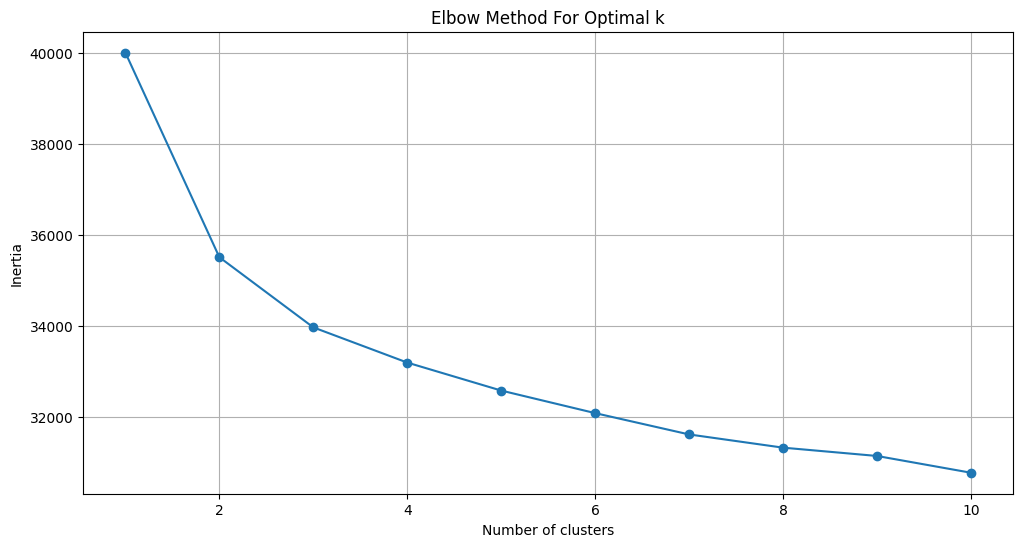

In [282]:
# Standardizing the data

def clustering(df):
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(df)
    
    # Determine the optimal number of clusters using the elbow method
    inertia = []  # Corrected the variable name here
    
    k_range = range(1, 11)
    
    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(scaled_data)
        inertia.append(kmeans.inertia_)  # Corrected the attribute access here with an underscore
    
    # Plot the figure
    plt.figure(figsize=(12, 6))
    plt.plot(k_range, inertia, marker='o')
    plt.title('Elbow Method For Optimal k')
    plt.xlabel('Number of clusters')
    plt.ylabel('Inertia')
    plt.grid(True)
    plt.show()


clustering(insurance_claimsdf)


#### Observation:
- Looking at the elbow method, it looks like the optimal number of k-clusters is 2 or 3.

### DBSCAN

In [283]:
from sklearn.cluster import DBSCAN

In [284]:
# Scale the dataset
# make a copy of the dataset
insurance_claimsdf1 = insurance_claimsdf.copy()
scaler = StandardScaler()
scaled_data = scaler.fit_transform(insurance_claimsdf1)

In [285]:
# Applying DBSCAN with initially chosen parameters
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(scaled_data)

# Number of clusters formed and noise points
n_clusters_dbscan = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
noise_points = list(dbscan_labels).count(-1)

n_clusters_dbscan, noise_points

(0, 1000)

In [286]:
# Trying different values of eps while keeping min_samples the same
eps_values = [0.5, 1.0, 1.5, 2.0]  # Increasing eps values
dbscan_results = {}

for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=5)
    labels = dbscan.fit_predict(scaled_data)
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    noise = list(labels).count(-1)
    dbscan_results[eps] = {'clusters': n_clusters, 'noise_points': noise}

dbscan_results

{0.5: {'clusters': 0, 'noise_points': 1000},
 1.0: {'clusters': 0, 'noise_points': 1000},
 1.5: {'clusters': 0, 'noise_points': 1000},
 2.0: {'clusters': 0, 'noise_points': 1000}}

#### Observations:
These results suggest that, given the current data attributes and parameter range, raising the parameter up to 2.0 still results in all points being classified as noise, suggesting that DBSCAN is not producing clusters in this instance. This may occur in datasets when the data point density is either too scattered or too uniform for DBSCAN's default settings to detect clusters accurately. Considering Hierarchical Clustering could be beneficial in light of these results.

In [287]:
from scipy.cluster.hierarchy import dendrogram, linkage

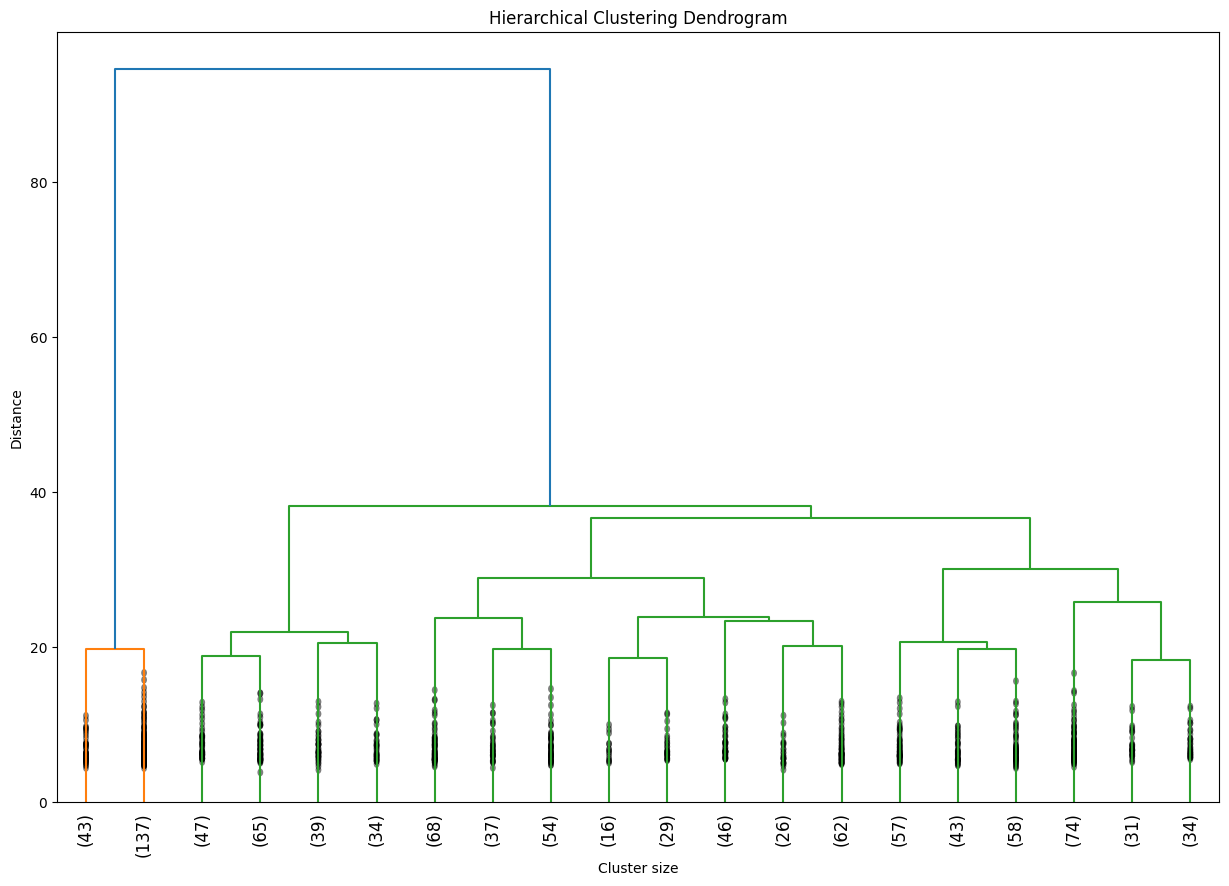

In [288]:
# Applying Hierarchical Clustering
linked = linkage(scaled_data, method='ward')

# Plotting the dendrogram
plt.figure(figsize=(15, 10))
dendrogram(linked,
           truncate_mode='lastp',  # show only the last p merged clusters
           p=20,  # show only the last 20 merged clusters
           leaf_rotation=90.,
           leaf_font_size=12.,
           show_contracted=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Cluster size')
plt.ylabel('Distance')
plt.show()

### Observations:
- The dendogram displays displays when there is a large jump in distance between the points there are less similar to each other. While, they are close together, they are more similar to each other. 

##### Picking the best the model:
- K-Means
- DBSCAN - Due to presence too many noises, DBSCAN will not be used to model our dataset.
- Hierarichal Cluster- 

#### Modeling Technique K-Means

In [290]:
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

# Add the cluster back into the original df
insurance_claimsdf['cluster'] = clusters

C:\Users\chimi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [291]:
# Preview the cluster dataset
insurance_claimsdf.head(5)

months_as_customer  age  policy_state  policy_csl  policy_deductable  \
0                 328   48             2           1               1000   
1                 228   42             1           1               2000   
2                 134   29             2           0               2000   
3                 256   41             0           1               2000   
4                 228   44             0           2               1000   

   policy_annual_premium  umbrella_limit  insured_sex  \
0                1406.91               0            1   
1                1197.22         5000000            1   
2                1413.14         5000000            0   
3                1415.74         6000000            0   
4                1583.91         6000000            1   

   insured_education_level  insured_occupation  ...  fraud_reported  \
0                        4                   2  ...               1   
1                        4                   6  ...               1   
2                        6                  11  ...               0   
3                        6                   1  ...               1   
4                        0                  11  ...               0   

   policy_age_at_incident  policy_bind_year  policy_bind_weekday  \
0                     100              2014                    4   
1                    3130              2006                    1   
2                    5282              2000                    2   
3                    8996              1990                    4   
4                     256              2014                    4   

   incident_year  incident_month  incident_weekday  claims_severity  \
0           2015               1                 6            72810   
1           2015               1                 2             5170   
2           2015               2                 6            36650   
3           2015               1                 5            64500   
4           2015               2                 1             6500   

   incident_time_of_day  cluster  
0                     3        0  
1                     2        1  
2                     2        0  
3                     3        0  
4                     1        1  

[5 rows x 42 columns]

In [293]:
# Looking at the centroids of the the clusters
centroids = kmeans.cluster_centers_
print(centroids)

[[ 2.23521082e-02  2.13866506e-02  5.27648244e-03 -3.81250301e-02
   8.06361325e-03  1.43122749e-04 -2.21033136e-02 -4.44355571e-03
   2.31213817e-02  3.40217545e-03 -1.15599329e-02 -8.35587077e-03
   1.74862142e-02 -1.04592229e-02 -1.81796482e-01  3.42954505e-01
  -1.94601366e-01 -2.84845902e-01 -3.66658073e-02  1.64578774e-03
   1.26201268e-01  1.83366709e-01  1.28438934e-02  6.76943316e-03
   6.70788459e-04  2.36977968e-02  3.96778244e-01  3.03680066e-01
   3.07415133e-01  3.97649677e-01 -1.29257084e-02 -1.57032913e-02
   8.36796165e-02 -1.88884766e-02  1.88463398e-02  2.27710577e-02
   0.00000000e+00 -4.06440485e-03  2.21191620e-02  3.96185586e-01
  -1.34521383e-01]
 [-9.91267406e-02 -9.48451459e-02 -2.34000526e-02  1.69076220e-01
  -3.57603718e-02 -6.34718277e-04  9.80233907e-02  1.97062036e-02
  -1.02538301e-01 -1.50879085e-02  5.12657894e-02  3.70564704e-02
  -7.75475586e-02  4.63843796e-02  8.06227876e-01 -1.52092867e+00
   8.63014756e-01  1.26322965e+00  1.62604885e-01 -7.2987

In [74]:
# Calculate means values for each cluster

num_cols = insurance_claimsdf.select_dtypes(include=[np.number] )

# Apply the mean function to numeric columns
cluster_means =  num_cols.groupby('cluster').mean()

print(cluster_means)


KeyError: 'cluster'

In [ ]:
# Using the months_as_customer average to classify whether a customer had positive experience or negative experience

# Justification: We will be using months_as_customer to classify whether a customer had a positive interaction or negative interaction with this insurance company.
# B/c the longevity of a customer translates to positive interaction. The longer a customer is with the company, the more satisfied they will likely be based on the loyalty factor. 

In [307]:
# Using customer's average tenure to label customer's experience
map_values = {0 :'Positive', 1:'Negative'}

insurance_claimsdf['customer_interaction'] = insurance_claimsdf['cluster'].map(map_values)


In [308]:
# How many positive or negative interaction?
insurance_claimsdf['customer_interaction'].value_counts()

customer_interaction
Positive    816
Negative    184
Name: count, dtype: int64

C:\Users\chimi\AppData\Local\Temp\ipykernel_21980\1187179159.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='customer_interaction', data=insurance_claimsdf, palette='viridis')


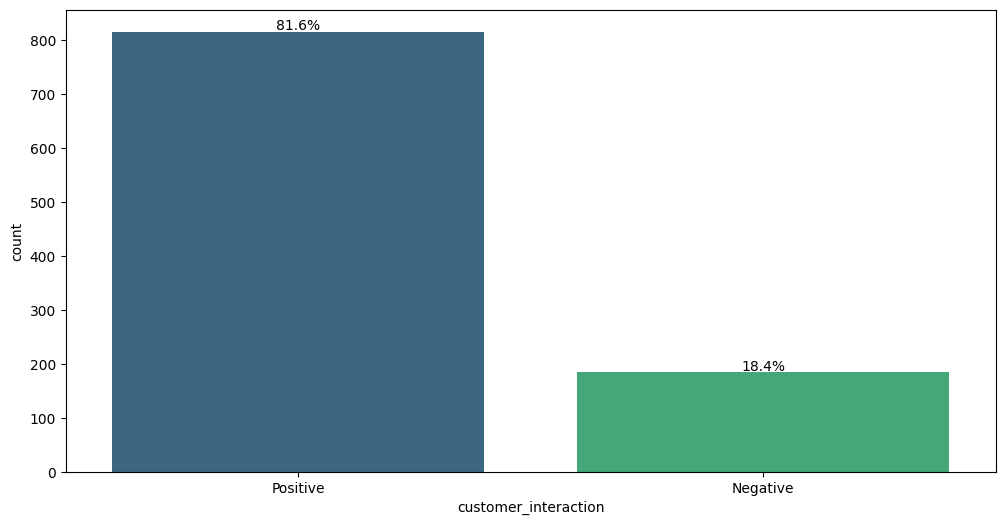

In [311]:
# Visualization

# Create the plot
plt.figure(figsize=(12,6))
ax = sns.countplot(x='customer_interaction', data=insurance_claimsdf, palette='viridis')

# Calculate the total number of entries in the data (for percentage calculation)
total = len(insurance_claimsdf['customer_interaction'])

# Get the current plot's bars and their locations
for p in ax.patches:
    height = p.get_height()  # Get the height of each bar (which is the count of each category)
    percentage = '{:.1f}%'.format(100 * height/total)  # Calculate the percentage of each bar
    ax.text(p.get_x() + p.get_width()/2., height + 3, percentage, ha="center")  # Place the text at the top of the bar

plt.show()

In [67]:
# Out of the 18% disatisfied customer, how many of them are labeled as negative?
# Exploring fraud and  negative experience

negative_subset_data = insurance_claimsdf[insurance_claimsdf['customer_interaction'] == 'Negative']

# Calculate % of fraud within this subset
percent_fraud = negative_subset_data['fraud_reported'].value_counts() / len(negative_subset_data) * 100

#
map_values = {0:'Non-Fraud', 1:'Fraud'}

# Map the series used to the provided valies
percent_fraud.index = percent_fraud.index.map(map_values)


# Convert the series to a DataFrame
percent_fraud = percent_fraud.reset_index()
percent_fraud.columns = ['Fraud_Status', 'Percentage']

# Display the dataframe
percent_fraud

KeyError: 'customer_interaction'

### Objective 2: 

In [125]:

# Drop date variables and high cardinality variables
columns_to_drop = ['policy_bind_date', 'incident_date', 'policy_number', 'insured_zip', 'incident_location', 'auto_model']
data_reduced = insurance_claimsdf.drop(columns=columns_to_drop, errors='ignore')  # 'errors=ignore' to handle any missing columns

# Display the reduced dataset and the unique value counts for remaining categorical variables to decide on further encoding
data_reduced.head(), data_reduced.nunique()


(   months_as_customer  age policy_state policy_csl  policy_deductable  \
 0                 328   48           OH    250/500               1000   
 1                 228   42           IN    250/500               2000   
 2                 134   29           OH    100/300               2000   
 3                 256   41           IL    250/500               2000   
 4                 228   44           IL   500/1000               1000   
 
    policy_annual_premium  umbrella_limit insured_sex insured_education_level  \
 0                1406.91               0        MALE                      MD   
 1                1197.22         5000000        MALE                      MD   
 2                1413.14         5000000      FEMALE                     PhD   
 3                1415.74         6000000      FEMALE                     PhD   
 4                1583.91         6000000        MALE               Associate   
 
   insured_occupation  ... bodily_injuries witnesses  police_repor

In [126]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer


In [127]:

# Initializing label encoder for 'insured_education_level'
label_encoder = LabelEncoder()
insurance_claimsdf['insured_education_level'] = label_encoder.fit_transform(data_reduced['insured_education_level'])

In [128]:


label_encode_vars = ['policy_state', 'policy_csl', 'insured_occupation', 'insured_hobbies', 
                     'insured_relationship', 'incident_type', 'collision_type', 'incident_severity',
                     'authorities_contacted', 'incident_state', 'incident_city', 'auto_make']

# Initialize label encoder
label_encoder = LabelEncoder()

# Apply label encoding to these variables
for var in label_encode_vars:
    insurance_claimsdf[var] = label_encoder.fit_transform(insurance_claimsdf[var])

# Function to convert label encoded integers to a single binary integer
def convert_to_single_binary(df, column):
    # Calculate the maximum binary width
    max_val = df[column].max()
    max_bits = max_val.bit_length()  # Gets the minimum number of bits to represent the max value

    # Convert label encoded integers to binary integer
    df[column] = df[column].apply(lambda x: int(bin(x)[2:].zfill(max_bits), 2))

# Apply binary conversion to the label encoded variables
for var in label_encode_vars:
    convert_to_single_binary(insurance_claimsdf, var)

# Display the DataFrame and check the updated number of unique values
insurance_claimsdf.head(), insurance_claimsdf.nunique()


AttributeError: 'numpy.int32' object has no attribute 'bit_length'

In [96]:
insurance_claimsdf.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported'],
      dtype='object')